## Đọc 2 dataset

In [ ]:
import pandas as pd

url1 = "https://raw.githubusercontent.com/lequangminh2623/Global-AI-Job-Market-Analysis-Salary-Prediction/main/ai_job_dataset.csv"
url2 = "https://raw.githubusercontent.com/lequangminh2623/Global-AI-Job-Market-Analysis-Salary-Prediction/main/ai_job_market_insights.csv"

df1 = pd.read_csv(url1)
df2 = pd.read_csv(url2)

print("ai_job_market_insights.csv:")
display(df1.head())

print("ai_job_dataset.csv:")
display(df2.head())

ai_job_market_insights.csv:


,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


ai_job_dataset.csv:


,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.263069,Yes,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.953758,No,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.922171,Yes,Decline


In [ ]:
# In ra các đặc trưng
print(df1.columns)
print(df2.columns)

Index(['job_id', 'job_title', 'salary_usd', 'salary_currency',
       'experience_level', 'employment_type', 'company_location',
       'company_size', 'employee_residence', 'remote_ratio', 'required_skills',
       'education_required', 'years_experience', 'industry', 'posting_date',
       'application_deadline', 'job_description_length', 'benefits_score',
       'company_name'],
      dtype='object')
Index(['Job_Title', 'Industry', 'Company_Size', 'Location',
       'AI_Adoption_Level', 'Automation_Risk', 'Required_Skills', 'Salary_USD',
       'Remote_Friendly', 'Job_Growth_Projection'],
      dtype='object')


# Chuẩn hóa df2

In [ ]:
# chuẩn hóa tên
df2 = df2.rename(columns={
    'Job_Title': 'job_title',
    'Industry': 'industry',
    'Company_Size': 'company_size',
    'Location': 'company_location',
    'Required_Skills': 'required_skills',
    'Salary_USD': 'salary_usd',
    'Remote_Friendly': 'remote_ratio'
})

In [ ]:
# Chuẩn hóa dữ liệu định tính

# "Small" → "S", "Medium" → "M", "Large" → "L"
df2['company_size'] = df2['company_size'].map({
    'Small': 'S',
    'Medium': 'M',
    'Large': 'L'
})

# "Yes" → remote_ratio = 100, "No" → 0
df2['remote_ratio'] = df2['remote_ratio'].map({
    'Yes': 100,
    'No': 0
})

# Display the updated columns to verify
display(df2[['company_size', 'remote_ratio']].head())

,company_size,remote_ratio
0,S,100
1,L,0
2,L,100
3,S,0
4,S,100


## Bổ sung cột còn thiếu trong dataset phụ (df2) bằng NA

In [ ]:
for col in df1.columns:
    if col not in df2.columns:
        df2[col] = pd.NA

df2

,job_title,industry,company_size,company_location,AI_Adoption_Level,Automation_Risk,required_skills,salary_usd,remote_ratio,Job_Growth_Projection,...,experience_level,employment_type,employee_residence,education_required,years_experience,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,Cybersecurity Analyst,Entertainment,S,Dubai,Medium,High,UX/UI Design,111392.165243,100,Growth,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,Marketing Specialist,Technology,L,Singapore,Medium,High,Marketing,93792.562466,0,Decline,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,AI Researcher,Technology,L,Singapore,Medium,High,UX/UI Design,107170.263069,100,Growth,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,Sales Manager,Retail,S,Berlin,Low,High,Project Management,93027.953758,0,Growth,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,Cybersecurity Analyst,Entertainment,S,Tokyo,Low,Low,JavaScript,87752.922171,100,Decline,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Data Scientist,Telecommunications,M,Berlin,Low,Medium,Machine Learning,105821.394046,100,Stable,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
496,Cybersecurity Analyst,Telecommunications,S,London,Low,High,UX/UI Design,119794.992146,0,Decline,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
497,Cybersecurity Analyst,Energy,L,Dubai,High,Low,UX/UI Design,79644.933099,100,Stable,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
498,Operations Manager,Healthcare,L,Paris,High,Low,Python,77642.150625,100,Stable,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


# Căn chỉnh thứ tự cột và kết hợp dữ liệu

In [ ]:
# Kết hợp 2 bảng
combined_df = pd.concat([df1, df2], ignore_index=True)

combined_df

/tmp/ipython-input-6-4088193139.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df = pd.concat([df1, df2], ignore_index=True)


,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,...,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name,AI_Adoption_Level,Automation_Risk,Job_Growth_Projection
0,AI00001,AI Research Scientist,90376.000000,USD,SE,CT,China,M,China,50,...,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics,NaN,NaN,NaN
1,AI00002,AI Software Engineer,61895.000000,USD,EN,CT,Canada,M,Ireland,100,...,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc,NaN,NaN,NaN
2,AI00003,AI Specialist,152626.000000,USD,MI,FL,Switzerland,L,South Korea,0,...,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech,NaN,NaN,NaN
3,AI00004,NLP Engineer,80215.000000,USD,SE,FL,India,M,India,50,...,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems,NaN,NaN,NaN
4,AI00005,AI Consultant,54624.000000,EUR,EN,PT,France,S,Singapore,100,...,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15495,NaN,Data Scientist,105821.394046,NaN,NaN,NaN,Berlin,M,NaN,100,...,<NA>,Telecommunications,NaN,NaN,<NA>,NaN,NaN,Low,Medium,Stable
15496,NaN,Cybersecurity Analyst,119794.992146,NaN,NaN,NaN,London,S,NaN,0,...,<NA>,Telecommunications,NaN,NaN,<NA>,NaN,NaN,Low,High,Decline
15497,NaN,Cybersecurity Analyst,79644.933099,NaN,NaN,NaN,Dubai,L,NaN,100,...,<NA>,Energy,NaN,NaN,<NA>,NaN,NaN,High,Low,Stable
15498,NaN,Operations Manager,77642.150625,NaN,NaN,NaN,Paris,L,NaN,100,...,<NA>,Healthcare,NaN,NaN,<NA>,NaN,NaN,High,Low,Stable


# Điền vào giá trị còn thiếu

> Add blockquote



## 5 cột job_id, salary_currency, experience_level, employment_type, employee_residence

In [ ]:
# Điền missing value của cột job_id bằng cách tự động tăng index
nan_indices = combined_df['job_id'].tail(500).index
start_index = nan_indices[0] if not nan_indices.empty else len(combined_df)

# Tìm index lớn nhất hiện tại
numeric_job_ids = combined_df['job_id'].str.extract(r'AI(\d+)').dropna().astype(int)

# Check index này có rỗng không trước khi tìm max
if not numeric_job_ids.empty:
    current_job_id_number = numeric_job_ids.max().item() # Extract the scalar value
else:
    current_job_id_number = 0


for i in nan_indices:
    current_job_id_number += 1
    combined_df.loc[i, 'job_id'] = f"AI{current_job_id_number:05d}"

print("Updated combined_df with filled job_id:")

# Hiện 505 dòng cuối để kiểm tra đã được điền khuyết chưa
display(combined_df.tail(505))

Updated combined_df with filled job_id:


,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,...,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name,AI_Adoption_Level,Automation_Risk,Job_Growth_Projection
14995,AI14996,Robotics Engineer,38604.000000,USD,EN,FL,Finland,S,Finland,50,...,1,Energy,2025-02-06,2025-03-25,1635,7.9,Advanced Robotics,NaN,NaN,NaN
14996,AI14997,Machine Learning Researcher,57811.000000,GBP,EN,CT,United Kingdom,M,United Kingdom,0,...,0,Government,2024-10-16,2024-10-30,1624,8.2,Smart Analytics,NaN,NaN,NaN
14997,AI14998,NLP Engineer,189490.000000,USD,EX,CT,South Korea,L,South Korea,50,...,17,Manufacturing,2024-03-19,2024-05-02,1336,7.4,AI Innovations,NaN,NaN,NaN
14998,AI14999,Head of AI,79461.000000,EUR,EN,FT,Netherlands,M,Netherlands,0,...,1,Real Estate,2024-03-22,2024-04-23,1935,5.6,Smart Analytics,NaN,NaN,NaN
14999,AI15000,Computer Vision Engineer,56481.000000,USD,MI,PT,Austria,S,Austria,50,...,2,Technology,2024-07-18,2024-08-10,2492,7.6,AI Innovations,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15495,AI15496,Data Scientist,105821.394046,NaN,NaN,NaN,Berlin,M,NaN,100,...,<NA>,Telecommunications,NaN,NaN,<NA>,NaN,NaN,Low,Medium,Stable
15496,AI15497,Cybersecurity Analyst,119794.992146,NaN,NaN,NaN,London,S,NaN,0,...,<NA>,Telecommunications,NaN,NaN,<NA>,NaN,NaN,Low,High,Decline
15497,AI15498,Cybersecurity Analyst,79644.933099,NaN,NaN,NaN,Dubai,L,NaN,100,...,<NA>,Energy,NaN,NaN,<NA>,NaN,NaN,High,Low,Stable
15498,AI15499,Operations Manager,77642.150625,NaN,NaN,NaN,Paris,L,NaN,100,...,<NA>,Healthcare,NaN,NaN,<NA>,NaN,NaN,High,Low,Stable


In [ ]:
# Điền missing values trong cột salary_currency với USD (đây là đơn vị tiền tệ cho dataset thứ 2)
combined_df['salary_currency'].fillna('USD', inplace=True)
print("Updated combined_df with filled salary_currency:")

# Hiện 505 dòng cuối để kiểm tra đã được điền khuyết chưa
display(combined_df.tail(505))

Updated combined_df with filled salary_currency:


/tmp/ipython-input-8-147483880.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_df['salary_currency'].fillna('USD', inplace=True)


,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,...,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name,AI_Adoption_Level,Automation_Risk,Job_Growth_Projection
14995,AI14996,Robotics Engineer,38604.000000,USD,EN,FL,Finland,S,Finland,50,...,1,Energy,2025-02-06,2025-03-25,1635,7.9,Advanced Robotics,NaN,NaN,NaN
14996,AI14997,Machine Learning Researcher,57811.000000,GBP,EN,CT,United Kingdom,M,United Kingdom,0,...,0,Government,2024-10-16,2024-10-30,1624,8.2,Smart Analytics,NaN,NaN,NaN
14997,AI14998,NLP Engineer,189490.000000,USD,EX,CT,South Korea,L,South Korea,50,...,17,Manufacturing,2024-03-19,2024-05-02,1336,7.4,AI Innovations,NaN,NaN,NaN
14998,AI14999,Head of AI,79461.000000,EUR,EN,FT,Netherlands,M,Netherlands,0,...,1,Real Estate,2024-03-22,2024-04-23,1935,5.6,Smart Analytics,NaN,NaN,NaN
14999,AI15000,Computer Vision Engineer,56481.000000,USD,MI,PT,Austria,S,Austria,50,...,2,Technology,2024-07-18,2024-08-10,2492,7.6,AI Innovations,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15495,AI15496,Data Scientist,105821.394046,USD,NaN,NaN,Berlin,M,NaN,100,...,<NA>,Telecommunications,NaN,NaN,<NA>,NaN,NaN,Low,Medium,Stable
15496,AI15497,Cybersecurity Analyst,119794.992146,USD,NaN,NaN,London,S,NaN,0,...,<NA>,Telecommunications,NaN,NaN,<NA>,NaN,NaN,Low,High,Decline
15497,AI15498,Cybersecurity Analyst,79644.933099,USD,NaN,NaN,Dubai,L,NaN,100,...,<NA>,Energy,NaN,NaN,<NA>,NaN,NaN,High,Low,Stable
15498,AI15499,Operations Manager,77642.150625,USD,NaN,NaN,Paris,L,NaN,100,...,<NA>,Healthcare,NaN,NaN,<NA>,NaN,NaN,High,Low,Stable


In [ ]:
# dùng Mode để điền khuyết cho cột experience_level
combined_df['experience_level'].fillna(combined_df['experience_level'].mode()[0], inplace=True)

/tmp/ipython-input-9-693128197.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_df['experience_level'].fillna(combined_df['experience_level'].mode()[0], inplace=True)


In [ ]:
# dùng Mode để điền khuyết cho cột employment_type
combined_df['employment_type'].fillna(combined_df['employment_type'].mode()[0], inplace=True)

/tmp/ipython-input-10-2324802287.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_df['employment_type'].fillna(combined_df['employment_type'].mode()[0], inplace=True)


In [ ]:
# Chuyển tên thành phố thành tên nước cho cột company_location
city_to_country = {
    'San Francisco': 'United States',
    'Sydney': 'Australia',
    'Dubai': 'United Arab Emirates',
    'Tokyo': 'Japan',
    'New York': 'United States',
    'Berlin': 'Germany',
    'London': 'United Kingdom',
    'Paris': 'France',
    'Toronto': 'Canada'
}

combined_df['company_location'] = combined_df['company_location'].replace(city_to_country)

# Hiện thị các cập nhật
print("Updated statistics for company_location:")
display(combined_df['company_location'].value_counts())

Updated statistics for company_location:


,count
company_location,
Germany,862
United States,835
Singapore,818
France,815
Canada,810
Japan,784
Australia,784
Denmark,778
United Kingdom,775


In [ ]:
# Điền khuyết giá trị employee_residence bằng giá trị của company_location tương ứng (Nhân viên thường làm việc tại nơi sinh sống)

combined_df['employee_residence'].fillna(combined_df['company_location'], inplace=True)

display(combined_df.tail(505))
print("\nUpdated combined_df with filled employee_residence:")

/tmp/ipython-input-12-3844445547.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_df['employee_residence'].fillna(combined_df['company_location'], inplace=True)


,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,...,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name,AI_Adoption_Level,Automation_Risk,Job_Growth_Projection
14995,AI14996,Robotics Engineer,38604.000000,USD,EN,FL,Finland,S,Finland,50,...,1,Energy,2025-02-06,2025-03-25,1635,7.9,Advanced Robotics,NaN,NaN,NaN
14996,AI14997,Machine Learning Researcher,57811.000000,GBP,EN,CT,United Kingdom,M,United Kingdom,0,...,0,Government,2024-10-16,2024-10-30,1624,8.2,Smart Analytics,NaN,NaN,NaN
14997,AI14998,NLP Engineer,189490.000000,USD,EX,CT,South Korea,L,South Korea,50,...,17,Manufacturing,2024-03-19,2024-05-02,1336,7.4,AI Innovations,NaN,NaN,NaN
14998,AI14999,Head of AI,79461.000000,EUR,EN,FT,Netherlands,M,Netherlands,0,...,1,Real Estate,2024-03-22,2024-04-23,1935,5.6,Smart Analytics,NaN,NaN,NaN
14999,AI15000,Computer Vision Engineer,56481.000000,USD,MI,PT,Austria,S,Austria,50,...,2,Technology,2024-07-18,2024-08-10,2492,7.6,AI Innovations,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15495,AI15496,Data Scientist,105821.394046,USD,MI,FT,Germany,M,Germany,100,...,<NA>,Telecommunications,NaN,NaN,<NA>,NaN,NaN,Low,Medium,Stable
15496,AI15497,Cybersecurity Analyst,119794.992146,USD,MI,FT,United Kingdom,S,United Kingdom,0,...,<NA>,Telecommunications,NaN,NaN,<NA>,NaN,NaN,Low,High,Decline
15497,AI15498,Cybersecurity Analyst,79644.933099,USD,MI,FT,United Arab Emirates,L,United Arab Emirates,100,...,<NA>,Energy,NaN,NaN,<NA>,NaN,NaN,High,Low,Stable
15498,AI15499,Operations Manager,77642.150625,USD,MI,FT,France,L,France,100,...,<NA>,Healthcare,NaN,NaN,<NA>,NaN,NaN,High,Low,Stable



Updated combined_df with filled employee_residence:


## 5 cột (loại 3 cột không có dữ liệu AI_Adoption_Level	Automation_Risk	Job_Growth_Projection)



Cột Benefit_score

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Kiểm tra cột benefits_score
print("Thông tin mô tả cột benefits_score:")
print(combined_df['benefits_score'].describe())

print("\nSố lượng giá trị thiếu trong cột benefits_score:")
print(combined_df['benefits_score'].isnull().sum())

Thông tin mô tả cột benefits_score:
count    15000.000000
mean         7.504273
std          1.450870
min          5.000000
25%          6.200000
50%          7.500000
75%          8.800000
max         10.000000
Name: benefits_score, dtype: float64

Số lượng giá trị thiếu trong cột benefits_score:
500


Outliers in 'benefits_score' column:


,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,...,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name,AI_Adoption_Level,Automation_Risk,Job_Growth_Projection


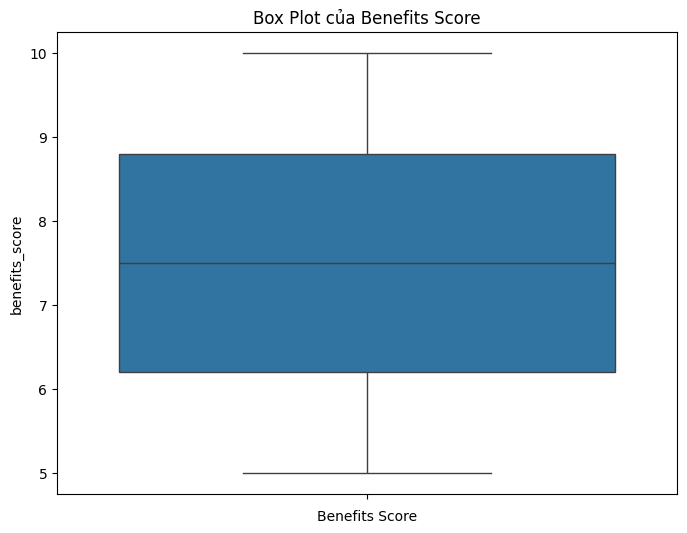

In [ ]:
# tính toán để xác định ngoại lai
Q1 = combined_df['benefits_score'].quantile(0.25) # tính phân vị thứ 1
Q3 = combined_df['benefits_score'].quantile(0.75) # tính phân vị thứ 3
IQR = Q3 - Q1 # tính khoảng tứ phân vị

# Xác định giới hạn trên và giới hạn dưới
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Xác định ngoại lai
outliers = combined_df[(combined_df['benefits_score'] < lower_bound) | (combined_df['benefits_score'] > upper_bound)]

print("Outliers in 'benefits_score' column:")
display(outliers)

# Vẽ biểu đồ Box Plot để phát hiện ngoại lai
plt.figure(figsize=(8, 6))
sns.boxplot(y=combined_df['benefits_score'].dropna()) # Sử dụng dropna() để loại bỏ NaN khi vẽ
plt.title('Box Plot của Benefits Score')
plt.xlabel('Benefits Score')
plt.show()

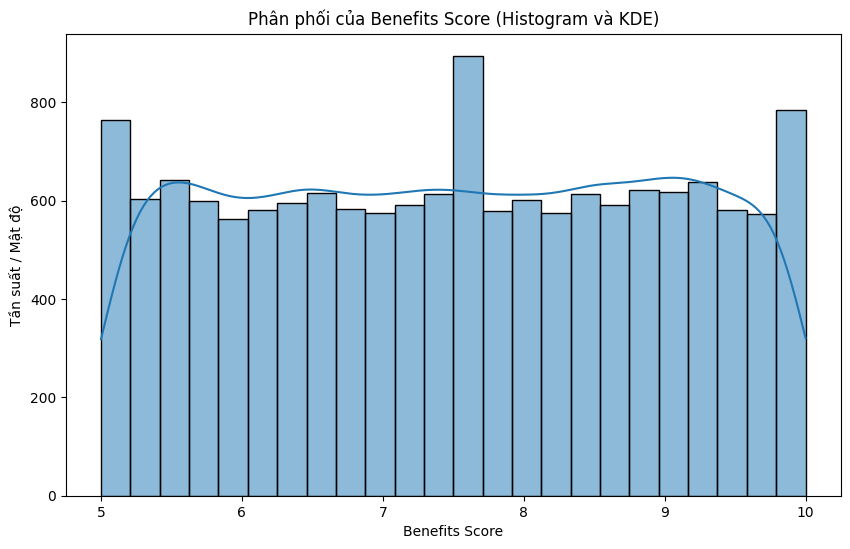

In [ ]:
# Vẽ biểu đồ Histogram và KDE Plot để xem phân bố dữ liệu
plt.figure(figsize=(10, 6))
sns.histplot(combined_df['benefits_score'].dropna(), kde=True) # Sử dụng dropna() để loại bỏ NaN khi vẽ
plt.title('Phân phối của Benefits Score (Histogram và KDE)')
plt.xlabel('Benefits Score')
plt.ylabel('Tần suất / Mật độ')
plt.show()

In [ ]:
# Vì dữ liệu trải đều từ 5 tới 10 và tập trung nhìêu ở giữa nên sẽ lấy median để điền các giá trị còn thiếu trong cột benefit_score
median_value = combined_df['benefits_score'].median()
combined_df['benefits_score'].fillna(median_value, inplace=True)

/tmp/ipython-input-16-4142625374.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_df['benefits_score'].fillna(median_value, inplace=True)


In [ ]:
combined_df.tail()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,...,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name,AI_Adoption_Level,Automation_Risk,Job_Growth_Projection
15495,AI15496,Data Scientist,105821.394046,USD,MI,FT,Germany,M,Germany,100,...,<NA>,Telecommunications,NaN,NaN,<NA>,7.5,NaN,Low,Medium,Stable
15496,AI15497,Cybersecurity Analyst,119794.992146,USD,MI,FT,United Kingdom,S,United Kingdom,0,...,<NA>,Telecommunications,NaN,NaN,<NA>,7.5,NaN,Low,High,Decline
15497,AI15498,Cybersecurity Analyst,79644.933099,USD,MI,FT,United Arab Emirates,L,United Arab Emirates,100,...,<NA>,Energy,NaN,NaN,<NA>,7.5,NaN,High,Low,Stable
15498,AI15499,Operations Manager,77642.150625,USD,MI,FT,France,L,France,100,...,<NA>,Healthcare,NaN,NaN,<NA>,7.5,NaN,High,Low,Stable
15499,AI15500,HR Manager,68764.378921,USD,MI,FT,Germany,M,Germany,100,...,<NA>,Entertainment,NaN,NaN,<NA>,7.5,NaN,Medium,High,Decline


Job_description_length

In [ ]:
# 1. Kiểm tra cột job_description_length
print("Thông tin mô tả cột job_description_length:")
print(combined_df['job_description_length'].describe())

print("\nSố lượng giá trị thiếu trong cột job_description_length:")
print(combined_df['job_description_length'].isnull().sum())

Thông tin mô tả cột job_description_length:
count     15000
unique     2000
top        1519
freq         19
Name: job_description_length, dtype: int64

Số lượng giá trị thiếu trong cột job_description_length:
500


Outliers in 'job_description_length' column:


,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,...,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name,AI_Adoption_Level,Automation_Risk,Job_Growth_Projection


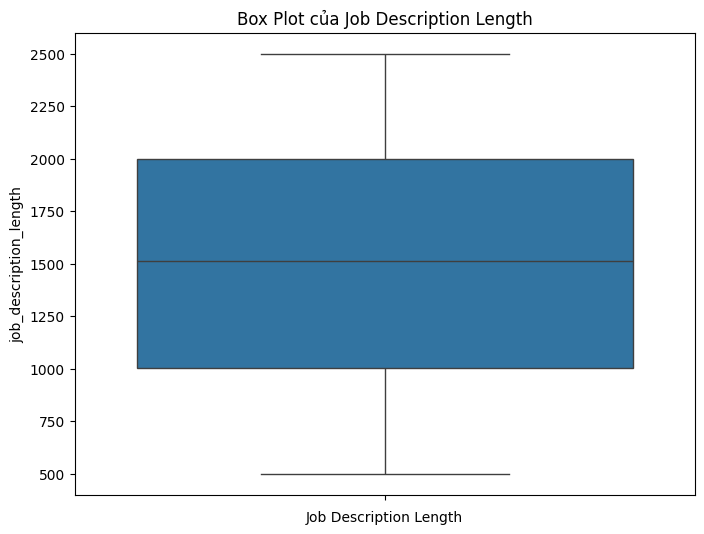

In [ ]:
# tính toán để xác định ngoại lai
Q1 = combined_df['job_description_length'].quantile(0.25) # tính phân vị thứ 1
Q3 = combined_df['job_description_length'].quantile(0.75) # tính phân vị thứ 3
IQR = Q3 - Q1 # tính khoảng tứ phân vị

# Xác định giới hạn trên và giới hạn dưới
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Xác định ngoại lai
outliers = combined_df[(combined_df['job_description_length'] < lower_bound) | (combined_df['job_description_length'] > upper_bound)]

print("Outliers in 'job_description_length' column:")
display(outliers)

# Vẽ biểu đồ Box Plot để phát hiện ngoại lai
plt.figure(figsize=(8, 6))
sns.boxplot(y=combined_df['job_description_length'].dropna()) # Sử dụng dropna() để loại bỏ NaN khi vẽ
plt.title('Box Plot của Job Description Length')
plt.xlabel('Job Description Length')
plt.show()

In [ ]:
# Sử dụng mean để điền vào các giá trị thiếu của cột job_description_length
mean_job_description_length = combined_df['job_description_length'].dropna().mean()
combined_df['job_description_length'].fillna(mean_job_description_length, inplace=True)

/tmp/ipython-input-20-688139988.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_df['job_description_length'].fillna(mean_job_description_length, inplace=True)
/tmp/ipython-input-20-688139988.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  combined_df['job_description_length'].fillna(mean_job_de

In [ ]:
combined_df.tail()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,...,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name,AI_Adoption_Level,Automation_Risk,Job_Growth_Projection
15495,AI15496,Data Scientist,105821.394046,USD,MI,FT,Germany,M,Germany,100,...,<NA>,Telecommunications,NaN,NaN,1503.314733,7.5,NaN,Low,Medium,Stable
15496,AI15497,Cybersecurity Analyst,119794.992146,USD,MI,FT,United Kingdom,S,United Kingdom,0,...,<NA>,Telecommunications,NaN,NaN,1503.314733,7.5,NaN,Low,High,Decline
15497,AI15498,Cybersecurity Analyst,79644.933099,USD,MI,FT,United Arab Emirates,L,United Arab Emirates,100,...,<NA>,Energy,NaN,NaN,1503.314733,7.5,NaN,High,Low,Stable
15498,AI15499,Operations Manager,77642.150625,USD,MI,FT,France,L,France,100,...,<NA>,Healthcare,NaN,NaN,1503.314733,7.5,NaN,High,Low,Stable
15499,AI15500,HR Manager,68764.378921,USD,MI,FT,Germany,M,Germany,100,...,<NA>,Entertainment,NaN,NaN,1503.314733,7.5,NaN,Medium,High,Decline


Company Name

In [ ]:
combined_df['company_name'].describe()

,company_name
count,15000
unique,16
top,TechCorp Inc
freq,980


In [ ]:
# Group by company_name and get unique company_location values for each company
company_locations = combined_df.groupby('company_name')['company_location'].unique().dropna()

# Display the result
print("Chi nhánh của từng công ty:")
display(company_locations)

Chi nhánh của từng công ty:


,company_location
company_name,
AI Innovations,"[France, Netherlands, Norway, China, Singapore..."
Advanced Robotics,"[France, Sweden, Netherlands, Israel, United S..."
Algorithmic Solutions,"[Singapore, France, Netherlands, Australia, De..."
Autonomous Tech,"[Switzerland, Finland, Israel, Austria, India,..."
Cloud AI Solutions,"[France, Austria, Norway, Denmark, Australia, ..."
Cognitive Computing,"[United States, Ireland, Switzerland, France, ..."
DataVision Ltd,"[United Kingdom, Israel, United States, Norway..."
DeepTech Ventures,"[Netherlands, United States, Singapore, Canada..."
Digital Transformation LLC,"[Denmark, Sweden, France, Finland, Netherlands..."


In [ ]:
# Gom nhóm company_location và tìm kiếm mode cho mỗi địa điểm là tên công ty xuất hiện nhiều
company_name_by_location_mode = combined_df.groupby('company_location')['company_name'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

print("Most frequent company_name for each company_location:")
display(company_name_by_location_mode)

Most frequent company_name for each company_location:


,company_name
company_location,
Australia,Cloud AI Solutions
Austria,Digital Transformation LLC
Canada,Predictive Systems
China,Smart Analytics
Denmark,TechCorp Inc
Finland,Digital Transformation LLC
France,Advanced Robotics
Germany,Quantum Computing Inc
India,Advanced Robotics


In [ ]:
# Fill missing company_name values based on company_location
combined_df['company_name'] = combined_df.apply(
    lambda row: company_name_by_location_mode.get(row['company_location'], row['company_name']) if pd.isna(row['company_name']) else row['company_name'],
    axis=1
)

print("\nDataFrame after filling missing company_name based on company_location:")
display(combined_df.tail())


DataFrame after filling missing company_name based on company_location:


,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,...,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name,AI_Adoption_Level,Automation_Risk,Job_Growth_Projection
15495,AI15496,Data Scientist,105821.394046,USD,MI,FT,Germany,M,Germany,100,...,<NA>,Telecommunications,NaN,NaN,1503.314733,7.5,Quantum Computing Inc,Low,Medium,Stable
15496,AI15497,Cybersecurity Analyst,119794.992146,USD,MI,FT,United Kingdom,S,United Kingdom,0,...,<NA>,Telecommunications,NaN,NaN,1503.314733,7.5,AI Innovations,Low,High,Decline
15497,AI15498,Cybersecurity Analyst,79644.933099,USD,MI,FT,United Arab Emirates,L,United Arab Emirates,100,...,<NA>,Energy,NaN,NaN,1503.314733,7.5,None,High,Low,Stable
15498,AI15499,Operations Manager,77642.150625,USD,MI,FT,France,L,France,100,...,<NA>,Healthcare,NaN,NaN,1503.314733,7.5,Advanced Robotics,High,Low,Stable
15499,AI15500,HR Manager,68764.378921,USD,MI,FT,Germany,M,Germany,100,...,<NA>,Entertainment,NaN,NaN,1503.314733,7.5,Quantum Computing Inc,Medium,High,Decline


In [ ]:
# kiểm tra số cột bị null
missing_company_names = combined_df['company_name'].isnull().sum()

print(f"Số lượng giá trị thiếu trong cột 'company_name': {missing_company_names}")

Số lượng giá trị thiếu trong cột 'company_name': 51


In [ ]:
# sử dụng mode điền vào các cột còn thiếu
combined_df['company_name'].fillna(combined_df['company_name'].mode()[0], inplace=True)

/tmp/ipython-input-27-2996105513.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_df['company_name'].fillna(combined_df['company_name'].mode()[0], inplace=True)


In [ ]:
combined_df.tail()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,...,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name,AI_Adoption_Level,Automation_Risk,Job_Growth_Projection
15495,AI15496,Data Scientist,105821.394046,USD,MI,FT,Germany,M,Germany,100,...,<NA>,Telecommunications,NaN,NaN,1503.314733,7.5,Quantum Computing Inc,Low,Medium,Stable
15496,AI15497,Cybersecurity Analyst,119794.992146,USD,MI,FT,United Kingdom,S,United Kingdom,0,...,<NA>,Telecommunications,NaN,NaN,1503.314733,7.5,AI Innovations,Low,High,Decline
15497,AI15498,Cybersecurity Analyst,79644.933099,USD,MI,FT,United Arab Emirates,L,United Arab Emirates,100,...,<NA>,Energy,NaN,NaN,1503.314733,7.5,Predictive Systems,High,Low,Stable
15498,AI15499,Operations Manager,77642.150625,USD,MI,FT,France,L,France,100,...,<NA>,Healthcare,NaN,NaN,1503.314733,7.5,Advanced Robotics,High,Low,Stable
15499,AI15500,HR Manager,68764.378921,USD,MI,FT,Germany,M,Germany,100,...,<NA>,Entertainment,NaN,NaN,1503.314733,7.5,Quantum Computing Inc,Medium,High,Decline


Posting_date vs	Application_deadline

In [ ]:
# Gom nhóm theo company_name và tìm mode posting dates
posting_date_by_company = combined_df.groupby('company_name')['posting_date'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

# Display the result
print("Earliest and latest posting date by Company Name:")
display(posting_date_by_company)

Earliest and latest posting date by Company Name:


,posting_date
company_name,
AI Innovations,2024-04-24
Advanced Robotics,2025-02-27
Algorithmic Solutions,2024-09-20
Autonomous Tech,2024-08-25
Cloud AI Solutions,2025-01-23
Cognitive Computing,2024-10-07
DataVision Ltd,2024-07-07
DeepTech Ventures,2024-01-16
Digital Transformation LLC,2024-09-11


In [ ]:
# sử dụng mode để điền vào các cột null theo company_name
combined_df['posting_date'] = combined_df.apply(
    lambda row: posting_date_by_company.get(row['company_name'], row['posting_date']) if pd.isna(row['posting_date']) else row['posting_date'],
    axis=1
)

print("\nDataFrame after filling missing posting_date based on company_name:")
display(combined_df.tail())


DataFrame after filling missing posting_date based on company_name:


,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,...,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name,AI_Adoption_Level,Automation_Risk,Job_Growth_Projection
15495,AI15496,Data Scientist,105821.394046,USD,MI,FT,Germany,M,Germany,100,...,<NA>,Telecommunications,2024-04-13,NaN,1503.314733,7.5,Quantum Computing Inc,Low,Medium,Stable
15496,AI15497,Cybersecurity Analyst,119794.992146,USD,MI,FT,United Kingdom,S,United Kingdom,0,...,<NA>,Telecommunications,2024-04-24,NaN,1503.314733,7.5,AI Innovations,Low,High,Decline
15497,AI15498,Cybersecurity Analyst,79644.933099,USD,MI,FT,United Arab Emirates,L,United Arab Emirates,100,...,<NA>,Energy,2024-12-30,NaN,1503.314733,7.5,Predictive Systems,High,Low,Stable
15498,AI15499,Operations Manager,77642.150625,USD,MI,FT,France,L,France,100,...,<NA>,Healthcare,2025-02-27,NaN,1503.314733,7.5,Advanced Robotics,High,Low,Stable
15499,AI15500,HR Manager,68764.378921,USD,MI,FT,Germany,M,Germany,100,...,<NA>,Entertainment,2024-04-13,NaN,1503.314733,7.5,Quantum Computing Inc,Medium,High,Decline


In [ ]:
# Chuyển đổi cột 'application_deadline' sang định dạng datetime, bỏ qua lỗi chuyển đổi
combined_df['application_deadline'] = pd.to_datetime(combined_df['application_deadline'], errors='coerce')

# Group by company_name and find the max posting dates
application_deadline_mode_by_company = combined_df.groupby('company_name')['application_deadline'].agg(lambda x: x.max() if not x.empty else None)

# Display the result
print("Most frequent application deadline by Application Deadline:")
display(application_deadline_mode_by_company)

Most frequent application deadline by Application Deadline:


,application_deadline
company_name,
AI Innovations,2025-07-02
Advanced Robotics,2025-07-06
Algorithmic Solutions,2025-07-05
Autonomous Tech,2025-07-08
Cloud AI Solutions,2025-06-28
Cognitive Computing,2025-07-04
DataVision Ltd,2025-07-04
DeepTech Ventures,2025-07-08
Digital Transformation LLC,2025-07-09


In [ ]:
# sử dụng mode để điền vào các cột null theo company_name
combined_df['application_deadline'] = combined_df.apply(
    lambda row: application_deadline_mode_by_company.get(row['company_name'], row['application_deadline']) if pd.isna(row['application_deadline']) else row['application_deadline'],
    axis=1
)

print("\nDataFrame after filling missing application_deadline based on company_name:")
display(combined_df.tail())


DataFrame after filling missing application_deadline based on company_name:


,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,...,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name,AI_Adoption_Level,Automation_Risk,Job_Growth_Projection
15495,AI15496,Data Scientist,105821.394046,USD,MI,FT,Germany,M,Germany,100,...,<NA>,Telecommunications,2024-04-13,2025-07-10,1503.314733,7.5,Quantum Computing Inc,Low,Medium,Stable
15496,AI15497,Cybersecurity Analyst,119794.992146,USD,MI,FT,United Kingdom,S,United Kingdom,0,...,<NA>,Telecommunications,2024-04-24,2025-07-02,1503.314733,7.5,AI Innovations,Low,High,Decline
15497,AI15498,Cybersecurity Analyst,79644.933099,USD,MI,FT,United Arab Emirates,L,United Arab Emirates,100,...,<NA>,Energy,2024-12-30,2025-07-05,1503.314733,7.5,Predictive Systems,High,Low,Stable
15498,AI15499,Operations Manager,77642.150625,USD,MI,FT,France,L,France,100,...,<NA>,Healthcare,2025-02-27,2025-07-06,1503.314733,7.5,Advanced Robotics,High,Low,Stable
15499,AI15500,HR Manager,68764.378921,USD,MI,FT,Germany,M,Germany,100,...,<NA>,Entertainment,2024-04-13,2025-07-10,1503.314733,7.5,Quantum Computing Inc,Medium,High,Decline


Education Required

In [ ]:
# 1. Kiểm tra cột education_required
print("Thông tin mô tả cột education_required:")
print(combined_df['education_required'].describe())

print("\nSố lượng giá trị thiếu trong cột education_required:")
print(combined_df['education_required'].isnull().sum())

Thông tin mô tả cột education_required:
count        15000
unique           4
top       Bachelor
freq          3789
Name: education_required, dtype: object

Số lượng giá trị thiếu trong cột education_required:
500


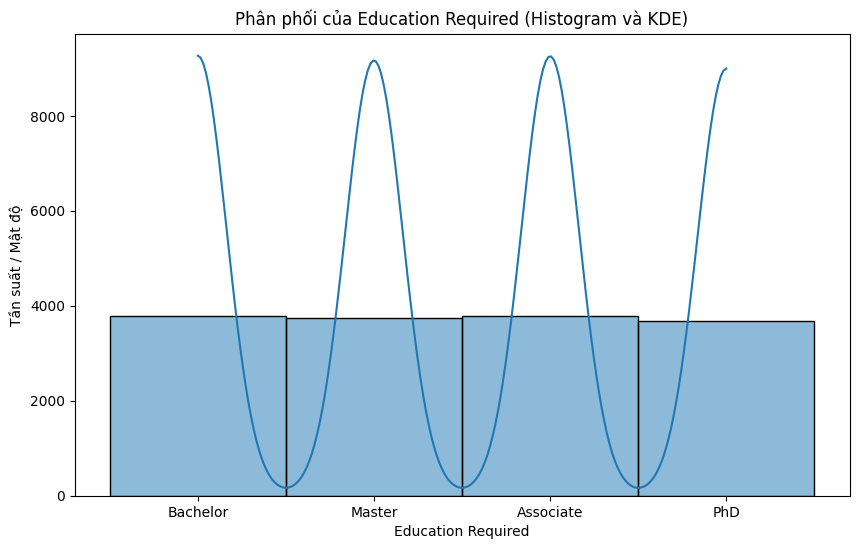

In [ ]:
# 2 Vẽ biểu đồ Histogram và KDE Plot để xem phân bố dữ liệu
plt.figure(figsize=(10, 6))
sns.histplot(combined_df['education_required'].dropna(), kde=True) # Sử dụng dropna() để loại bỏ NaN khi vẽ
plt.title('Phân phối của Education Required (Histogram và KDE)')
plt.xlabel('Education Required')
plt.ylabel('Tần suất / Mật độ')
plt.show()

In [ ]:
# sử dụng mode để giữ lại định tính cho dữ liệu
combined_df['education_required'].fillna(combined_df['education_required'].mode()[0], inplace=True)

/tmp/ipython-input-35-2162839594.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_df['education_required'].fillna(combined_df['education_required'].mode()[0], inplace=True)


In [ ]:
display(combined_df.tail())

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,...,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name,AI_Adoption_Level,Automation_Risk,Job_Growth_Projection
15495,AI15496,Data Scientist,105821.394046,USD,MI,FT,Germany,M,Germany,100,...,<NA>,Telecommunications,2024-04-13,2025-07-10,1503.314733,7.5,Quantum Computing Inc,Low,Medium,Stable
15496,AI15497,Cybersecurity Analyst,119794.992146,USD,MI,FT,United Kingdom,S,United Kingdom,0,...,<NA>,Telecommunications,2024-04-24,2025-07-02,1503.314733,7.5,AI Innovations,Low,High,Decline
15497,AI15498,Cybersecurity Analyst,79644.933099,USD,MI,FT,United Arab Emirates,L,United Arab Emirates,100,...,<NA>,Energy,2024-12-30,2025-07-05,1503.314733,7.5,Predictive Systems,High,Low,Stable
15498,AI15499,Operations Manager,77642.150625,USD,MI,FT,France,L,France,100,...,<NA>,Healthcare,2025-02-27,2025-07-06,1503.314733,7.5,Advanced Robotics,High,Low,Stable
15499,AI15500,HR Manager,68764.378921,USD,MI,FT,Germany,M,Germany,100,...,<NA>,Entertainment,2024-04-13,2025-07-10,1503.314733,7.5,Quantum Computing Inc,Medium,High,Decline


Years Experience

In [ ]:
# 1. Kiểm tra cột education_required
print("Thông tin mô tả cột years_experience:")
print(combined_df['years_experience'].describe())

print("\nSố lượng giá trị thiếu trong cột years_experience:")
print(combined_df['years_experience'].isnull().sum())

Thông tin mô tả cột years_experience:
count     15000
unique       20
top           0
freq       1890
Name: years_experience, dtype: int64

Số lượng giá trị thiếu trong cột years_experience:
500


Outliers in 'years_experience' column:


,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,...,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name,AI_Adoption_Level,Automation_Risk,Job_Growth_Projection


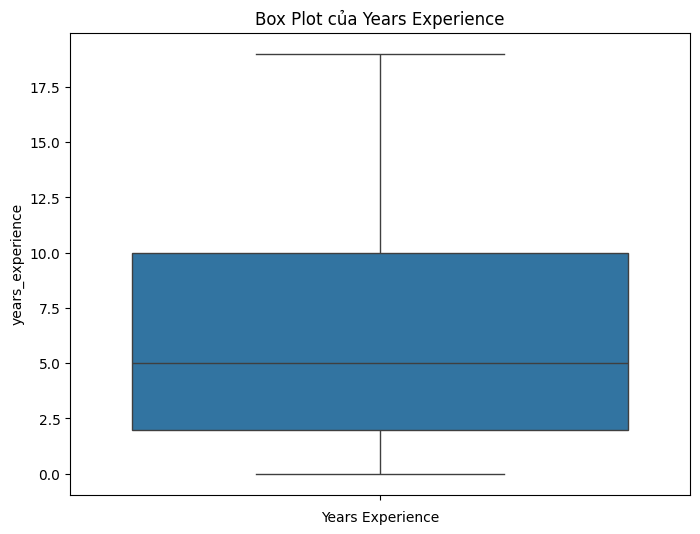

In [ ]:
# tính toán để xác định ngoại lai
Q1 = combined_df['years_experience'].quantile(0.25) # tính phân vị thứ 1
Q3 = combined_df['years_experience'].quantile(0.75) # tính phân vị thứ 3
IQR = Q3 - Q1 # tính khoảng tứ phân vị

# Xác định giới hạn trên và giới hạn dưới
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Xác định ngoại lai
outliers = combined_df[(combined_df['years_experience'] < lower_bound) | (combined_df['years_experience'] > upper_bound)]

print("Outliers in 'years_experience' column:")
display(outliers)

# Vẽ biểu đồ Box Plot để phát hiện ngoại lai
plt.figure(figsize=(8, 6))
sns.boxplot(y=combined_df['years_experience'].dropna()) # Sử dụng dropna() để loại bỏ NaN khi vẽ
plt.title('Box Plot của Years Experience')
plt.xlabel('Years Experience')
plt.show()

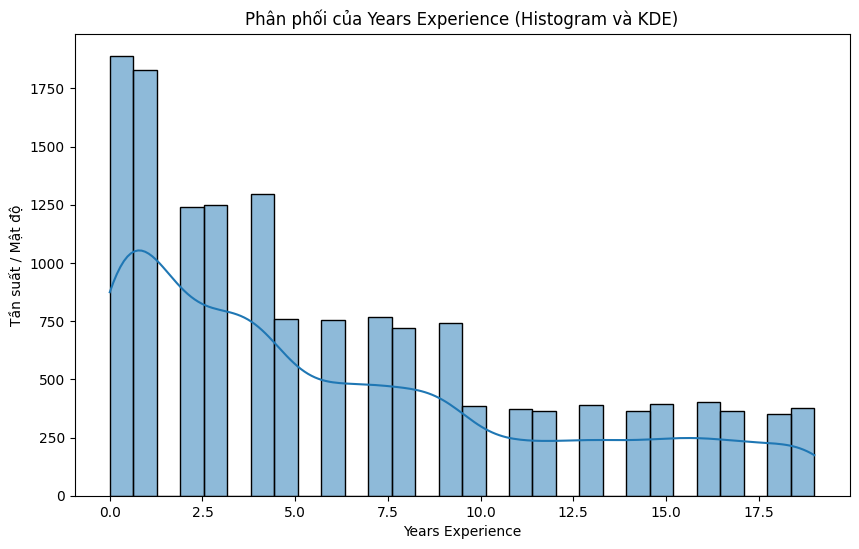

In [ ]:
# 2 Vẽ biểu đồ Histogram và KDE Plot để xem phân bố dữ liệu
plt.figure(figsize=(10, 6))
sns.histplot(combined_df['years_experience'].dropna(), kde=True) # Sử dụng dropna() để loại bỏ NaN khi vẽ
plt.title('Phân phối của Years Experience (Histogram và KDE)')
plt.xlabel('Years Experience')
plt.ylabel('Tần suất / Mật độ')
plt.show()

In [ ]:
# Sử dụng Median để điền vào các giá trị thiếu của cột years_experience vì nhìn vào biểu đồ thấy được độ lẹch nên dùng median sẽ  ít bị ảnh hưởng bởi các giá trị cực đoan hoặc sự lệch của dữ liệu.
median_years_experience = combined_df['years_experience'].dropna().median()
combined_df['years_experience'].fillna(median_years_experience, inplace=True)

/tmp/ipython-input-40-3576765354.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_df['years_experience'].fillna(median_years_experience, inplace=True)
/tmp/ipython-input-40-3576765354.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  combined_df['years_experience'].fillna(median_years_experience, 

In [ ]:
display(combined_df.tail())

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,...,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name,AI_Adoption_Level,Automation_Risk,Job_Growth_Projection
15495,AI15496,Data Scientist,105821.394046,USD,MI,FT,Germany,M,Germany,100,...,5.0,Telecommunications,2024-04-13,2025-07-10,1503.314733,7.5,Quantum Computing Inc,Low,Medium,Stable
15496,AI15497,Cybersecurity Analyst,119794.992146,USD,MI,FT,United Kingdom,S,United Kingdom,0,...,5.0,Telecommunications,2024-04-24,2025-07-02,1503.314733,7.5,AI Innovations,Low,High,Decline
15497,AI15498,Cybersecurity Analyst,79644.933099,USD,MI,FT,United Arab Emirates,L,United Arab Emirates,100,...,5.0,Energy,2024-12-30,2025-07-05,1503.314733,7.5,Predictive Systems,High,Low,Stable
15498,AI15499,Operations Manager,77642.150625,USD,MI,FT,France,L,France,100,...,5.0,Healthcare,2025-02-27,2025-07-06,1503.314733,7.5,Advanced Robotics,High,Low,Stable
15499,AI15500,HR Manager,68764.378921,USD,MI,FT,Germany,M,Germany,100,...,5.0,Entertainment,2024-04-13,2025-07-10,1503.314733,7.5,Quantum Computing Inc,Medium,High,Decline


Salary_Usd

In [ ]:
# kiểm tra đặc trưng làm nhãn salary_usd
combined_df['salary_usd'].describe()

,salary_usd
count,15500.000000
mean,114570.688548
std,59547.800518
min,31969.526346
25%,70709.500000
50%,98975.000000
75%,144441.250000
max,399095.000000


Outliers in 'salary_usd' column:


,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,...,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name,AI_Adoption_Level,Automation_Risk,Job_Growth_Projection
48,AI00049,AI Specialist,288815.0,USD,EX,PT,Switzerland,S,Switzerland,0,...,12.0,Manufacturing,2024-08-08,2024-09-23,1930.0,7.2,Cognitive Computing,NaN,NaN,NaN
67,AI00068,Machine Learning Engineer,316182.0,USD,EX,PT,Denmark,M,Canada,0,...,12.0,Finance,2025-02-09,2025-02-23,2452.0,7.0,Digital Transformation LLC,NaN,NaN,NaN
79,AI00080,AI Research Scientist,284486.0,USD,EX,CT,United States,M,United States,0,...,12.0,Consulting,2025-02-13,2025-03-10,2231.0,7.0,TechCorp Inc,NaN,NaN,NaN
98,AI00099,Machine Learning Researcher,290199.0,USD,EX,CT,Switzerland,L,Denmark,50,...,12.0,Retail,2025-01-12,2025-03-07,1137.0,5.6,Smart Analytics,NaN,NaN,NaN
134,AI00135,AI Product Manager,258637.0,GBP,EX,PT,United Kingdom,M,United Kingdom,50,...,11.0,Education,2025-01-16,2025-02-15,813.0,9.1,Cognitive Computing,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14916,AI14917,Principal Data Scientist,307237.0,USD,EX,CT,United States,L,United States,0,...,14.0,Energy,2025-04-09,2025-05-23,1773.0,8.8,DataVision Ltd,NaN,NaN,NaN
14917,AI14918,ML Ops Engineer,273053.0,USD,EX,FT,Norway,L,Norway,50,...,11.0,Healthcare,2024-03-12,2024-04-07,500.0,6.0,Cognitive Computing,NaN,NaN,NaN
14956,AI14957,Machine Learning Engineer,292760.0,USD,EX,PT,Denmark,L,Germany,50,...,19.0,Retail,2024-08-30,2024-10-23,728.0,8.7,Future Systems,NaN,NaN,NaN
14977,AI14978,Research Scientist,325968.0,USD,EX,CT,Norway,M,Israel,100,...,10.0,Technology,2024-07-17,2024-09-13,1514.0,9.8,Quantum Computing Inc,NaN,NaN,NaN


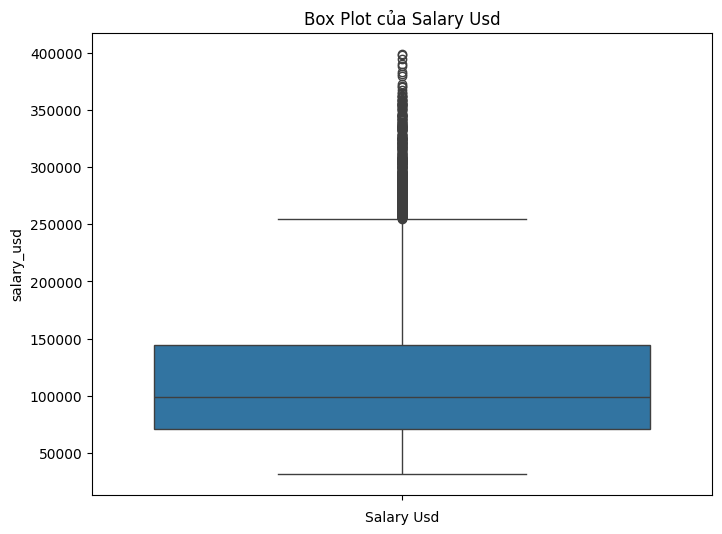

In [ ]:
# kiểm tra ngoại lai
# tính toán để xác định ngoại lai
Q1 = combined_df['salary_usd'].quantile(0.25) # tính phân vị thứ 1
Q3 = combined_df['salary_usd'].quantile(0.75) # tính phân vị thứ 3
IQR = Q3 - Q1 # tính khoảng tứ phân vị

# Xác định giới hạn trên và giới hạn dưới
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Xác định ngoại lai
outliers = combined_df[(combined_df['salary_usd'] < lower_bound) | (combined_df['salary_usd'] > upper_bound)]

print("Outliers in 'salary_usd' column:")
display(outliers)

# Vẽ biểu đồ Box Plot để phát hiện ngoại lai
plt.figure(figsize=(8, 6))
sns.boxplot(y=combined_df['salary_usd'].dropna()) # Sử dụng dropna() để loại bỏ NaN khi vẽ
plt.title('Box Plot của Salary Usd')
plt.xlabel('Salary Usd')
plt.show()

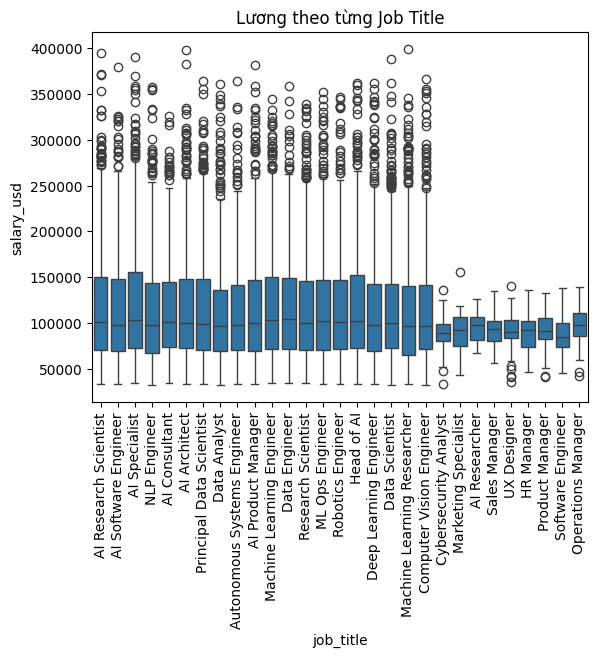

In [ ]:
# kiểm tra ngoại lai outliner của salary Usd có gây nhiễu không hay tự lại ở 1 nhóm hợp lệ
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="job_title", y="salary_usd", data=combined_df)
plt.xticks(rotation=90)
plt.title("Lương theo từng Job Title")
plt.show()

In [ ]:
# loại bỏ 3 đặc trưng AI_Adoption_Level	Automation_Risk	Job_Growth_Projection, do 3 đặc trưng này chỉ có trong dataset phụ, việc điền khuyết 96.7% số dòng sẽ gây nhiễu

combined_df = combined_df.drop(columns=['AI_Adoption_Level', 'Automation_Risk', 'Job_Growth_Projection'])
display(combined_df.head())
display(combined_df.tail())


,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376.0,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9.0,Automotive,2024-10-18,2024-11-07,1076.0,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895.0,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1.0,Media,2024-11-20,2025-01-11,1268.0,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626.0,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2.0,Education,2025-03-18,2025-04-07,1974.0,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215.0,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7.0,Consulting,2024-12-23,2025-02-24,1345.0,8.6,Future Systems
4,AI00005,AI Consultant,54624.0,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0.0,Media,2025-04-15,2025-06-23,1989.0,6.6,Advanced Robotics


,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
15495,AI15496,Data Scientist,105821.394046,USD,MI,FT,Germany,M,Germany,100,Machine Learning,Bachelor,5.0,Telecommunications,2024-04-13,2025-07-10,1503.314733,7.5,Quantum Computing Inc
15496,AI15497,Cybersecurity Analyst,119794.992146,USD,MI,FT,United Kingdom,S,United Kingdom,0,UX/UI Design,Bachelor,5.0,Telecommunications,2024-04-24,2025-07-02,1503.314733,7.5,AI Innovations
15497,AI15498,Cybersecurity Analyst,79644.933099,USD,MI,FT,United Arab Emirates,L,United Arab Emirates,100,UX/UI Design,Bachelor,5.0,Energy,2024-12-30,2025-07-05,1503.314733,7.5,Predictive Systems
15498,AI15499,Operations Manager,77642.150625,USD,MI,FT,France,L,France,100,Python,Bachelor,5.0,Healthcare,2025-02-27,2025-07-06,1503.314733,7.5,Advanced Robotics
15499,AI15500,HR Manager,68764.378921,USD,MI,FT,Germany,M,Germany,100,Project Management,Bachelor,5.0,Entertainment,2024-04-13,2025-07-10,1503.314733,7.5,Quantum Computing Inc


In [ ]:
# - Communication
# - Cybersecurity
# - JavaScript
# - Marketing
# - Project Management
# - Sales
# - UX/UI Design
# loại bỏ các kỹ năng trên, nếu không có thì để thành none

import pandas as pd
# List of skills to remove
skills_to_remove = [
    'Communication',
    'Cybersecurity',
    'JavaScript',
    'Marketing',
    'Project Management',
    'Sales',
    'UX/UI Design'
]

def remove_specified_skills(skills_str):
    if pd.isna(skills_str):
        return None
    # Split the string into individual skills, handle potential different separators
    skills = [s.strip() for s in skills_str.replace(',', ';').split(';') if s.strip()]
    # Remove the specified skills (case-insensitive)
    filtered_skills = [skill for skill in skills if skill.lower() not in [s.lower() for s in skills_to_remove]]
    # If after removing, no skills remain, return None, otherwise join them back
    return '; '.join(filtered_skills) if filtered_skills else None

# Apply the function to the 'required_skills' column
combined_df['required_skills'] = combined_df['required_skills'].apply(remove_specified_skills)

# Display the head and tail to check the changes
print("\nUpdated combined_df with removed skills:")
display(combined_df.head())
display(combined_df.tail())


Updated combined_df with removed skills:


,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376.0,USD,SE,CT,China,M,China,50,Tableau; PyTorch; Kubernetes; Linux; NLP,Bachelor,9.0,Automotive,2024-10-18,2024-11-07,1076.0,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895.0,USD,EN,CT,Canada,M,Ireland,100,Deep Learning; AWS; Mathematics; Python; Docker,Master,1.0,Media,2024-11-20,2025-01-11,1268.0,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626.0,USD,MI,FL,Switzerland,L,South Korea,0,Kubernetes; Deep Learning; Java; Hadoop; NLP,Associate,2.0,Education,2025-03-18,2025-04-07,1974.0,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215.0,USD,SE,FL,India,M,India,50,Scala; SQL; Linux; Python,PhD,7.0,Consulting,2024-12-23,2025-02-24,1345.0,8.6,Future Systems
4,AI00005,AI Consultant,54624.0,EUR,EN,PT,France,S,Singapore,100,MLOps; Java; Tableau; Python,Master,0.0,Media,2025-04-15,2025-06-23,1989.0,6.6,Advanced Robotics


,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
15495,AI15496,Data Scientist,105821.394046,USD,MI,FT,Germany,M,Germany,100,Machine Learning,Bachelor,5.0,Telecommunications,2024-04-13,2025-07-10,1503.314733,7.5,Quantum Computing Inc
15496,AI15497,Cybersecurity Analyst,119794.992146,USD,MI,FT,United Kingdom,S,United Kingdom,0,None,Bachelor,5.0,Telecommunications,2024-04-24,2025-07-02,1503.314733,7.5,AI Innovations
15497,AI15498,Cybersecurity Analyst,79644.933099,USD,MI,FT,United Arab Emirates,L,United Arab Emirates,100,None,Bachelor,5.0,Energy,2024-12-30,2025-07-05,1503.314733,7.5,Predictive Systems
15498,AI15499,Operations Manager,77642.150625,USD,MI,FT,France,L,France,100,Python,Bachelor,5.0,Healthcare,2025-02-27,2025-07-06,1503.314733,7.5,Advanced Robotics
15499,AI15500,HR Manager,68764.378921,USD,MI,FT,Germany,M,Germany,100,None,Bachelor,5.0,Entertainment,2024-04-13,2025-07-10,1503.314733,7.5,Quantum Computing Inc


In [ ]:
# đếm số lượng các kỹ năng trong require skills

import pandas as pd
# Create a list to store all unique skills
all_skills = []

# Iterate through each row in the 'required_skills' column
for skills_str in combined_df['required_skills'].dropna(): # Use dropna() to skip None values
    # Split the string into individual skills and add them to the list
    skills = [s.strip() for s in skills_str.replace(',', ';').split(';') if s.strip()]
    all_skills.extend(skills)

# Count the frequency of each skill
skill_counts = pd.Series(all_skills).value_counts()

# Print the total number of unique skills
print(f"Tổng số lượng các kỹ năng trong cột 'required_skills': {len(skill_counts)}")

# Display the count of each unique skill
print("\nSố lượng đếm của mỗi kỹ năng:")
skill_counts

Tổng số lượng các kỹ năng trong cột 'required_skills': 26

Số lượng đếm của mỗi kỹ năng:


,count
Python,4510
SQL,3407
TensorFlow,3022
Kubernetes,3009
Scala,2794
PyTorch,2777
Linux,2705
Git,2631
Java,2578
GCP,2442


In [ ]:
# gom nhóm machine learning và data analysis thành other trong required skills

import pandas as pd
# Function to group specific skills into 'Other'
def group_skills(skills_str):
    if pd.isna(skills_str):
        return None
    skills = [s.strip() for s in skills_str.replace(',', ';').split(';') if s.strip()]
    grouped_skills = []
    for skill in skills:
        if skill.lower() in ['machine learning', 'data analysis']:
            grouped_skills.append('Other')
        else:
            grouped_skills.append(skill)
    # Ensure uniqueness after grouping
    return '; '.join(sorted(list(set(grouped_skills)))) if grouped_skills else None

# Apply the function to the 'required_skills' column
combined_df['required_skills'] = combined_df['required_skills'].apply(group_skills)

# Display the head and tail to check the changes
print("\nUpdated combined_df after grouping skills:")
display(combined_df.head())
display(combined_df.tail())

# Recalculate skill counts to see the effect of grouping
all_skills_after_grouping = []

for skills_str in combined_df['required_skills'].dropna():
    skills = [s.strip() for s in skills_str.replace(',', ';').split(';') if s.strip()]
    all_skills_after_grouping.extend(skills)

skill_counts_after_grouping = pd.Series(all_skills_after_grouping).value_counts()

print(f"\nTổng số lượng các kỹ năng sau khi gom nhóm: {len(skill_counts_after_grouping)}")
print("\nSố lượng đếm của mỗi kỹ năng sau khi gom nhóm:")
display(skill_counts_after_grouping)



Updated combined_df after grouping skills:


,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376.0,USD,SE,CT,China,M,China,50,Kubernetes; Linux; NLP; PyTorch; Tableau,Bachelor,9.0,Automotive,2024-10-18,2024-11-07,1076.0,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895.0,USD,EN,CT,Canada,M,Ireland,100,AWS; Deep Learning; Docker; Mathematics; Python,Master,1.0,Media,2024-11-20,2025-01-11,1268.0,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626.0,USD,MI,FL,Switzerland,L,South Korea,0,Deep Learning; Hadoop; Java; Kubernetes; NLP,Associate,2.0,Education,2025-03-18,2025-04-07,1974.0,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215.0,USD,SE,FL,India,M,India,50,Linux; Python; SQL; Scala,PhD,7.0,Consulting,2024-12-23,2025-02-24,1345.0,8.6,Future Systems
4,AI00005,AI Consultant,54624.0,EUR,EN,PT,France,S,Singapore,100,Java; MLOps; Python; Tableau,Master,0.0,Media,2025-04-15,2025-06-23,1989.0,6.6,Advanced Robotics


,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
15495,AI15496,Data Scientist,105821.394046,USD,MI,FT,Germany,M,Germany,100,Other,Bachelor,5.0,Telecommunications,2024-04-13,2025-07-10,1503.314733,7.5,Quantum Computing Inc
15496,AI15497,Cybersecurity Analyst,119794.992146,USD,MI,FT,United Kingdom,S,United Kingdom,0,None,Bachelor,5.0,Telecommunications,2024-04-24,2025-07-02,1503.314733,7.5,AI Innovations
15497,AI15498,Cybersecurity Analyst,79644.933099,USD,MI,FT,United Arab Emirates,L,United Arab Emirates,100,None,Bachelor,5.0,Energy,2024-12-30,2025-07-05,1503.314733,7.5,Predictive Systems
15498,AI15499,Operations Manager,77642.150625,USD,MI,FT,France,L,France,100,Python,Bachelor,5.0,Healthcare,2025-02-27,2025-07-06,1503.314733,7.5,Advanced Robotics
15499,AI15500,HR Manager,68764.378921,USD,MI,FT,Germany,M,Germany,100,None,Bachelor,5.0,Entertainment,2024-04-13,2025-07-10,1503.314733,7.5,Quantum Computing Inc



Tổng số lượng các kỹ năng sau khi gom nhóm: 25

Số lượng đếm của mỗi kỹ năng sau khi gom nhóm:


,count
Python,4510
SQL,3407
TensorFlow,3022
Kubernetes,3009
Scala,2794
PyTorch,2777
Linux,2705
Git,2631
Java,2578
GCP,2442


In [ ]:
# thống kê các cột có require_skill là None
num_missing = combined_df['required_skills'].isna().sum()
print(f"Số dòng có required_skills là None hoặc NaN: {num_missing}")

Số dòng có required_skills là None hoặc NaN: 339


In [ ]:
missing_skills_df = combined_df[combined_df['required_skills'].isna()]
print(missing_skills_df)

        job_id              job_title     salary_usd salary_currency  \
15000  AI15001  Cybersecurity Analyst  111392.165243             USD   
15001  AI15002   Marketing Specialist   93792.562466             USD   
15002  AI15003          AI Researcher  107170.263069             USD   
15003  AI15004          Sales Manager   93027.953758             USD   
15004  AI15005  Cybersecurity Analyst   87752.922171             USD   
...        ...                    ...            ...             ...   
15493  AI15494  Cybersecurity Analyst   79936.875359             USD   
15494  AI15495          Sales Manager   97622.960933             USD   
15496  AI15497  Cybersecurity Analyst  119794.992146             USD   
15497  AI15498  Cybersecurity Analyst   79644.933099             USD   
15499  AI15500             HR Manager   68764.378921             USD   

      experience_level employment_type      company_location company_size  \
15000               MI              FT  United Arab Emirat

# Loại bỏ các dòng trùng lắp

In [ ]:
combined_df.drop_duplicates(inplace=True)

print("\nDataFrame after removing duplicate rows:")
display(combined_df.head())
display(combined_df.tail())
print("\nShape after removing duplicates:", combined_df.shape)


DataFrame after removing duplicate rows:


,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376.0,USD,SE,CT,China,M,China,50,Kubernetes; Linux; NLP; PyTorch; Tableau,Bachelor,9.0,Automotive,2024-10-18,2024-11-07,1076.0,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895.0,USD,EN,CT,Canada,M,Ireland,100,AWS; Deep Learning; Docker; Mathematics; Python,Master,1.0,Media,2024-11-20,2025-01-11,1268.0,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626.0,USD,MI,FL,Switzerland,L,South Korea,0,Deep Learning; Hadoop; Java; Kubernetes; NLP,Associate,2.0,Education,2025-03-18,2025-04-07,1974.0,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215.0,USD,SE,FL,India,M,India,50,Linux; Python; SQL; Scala,PhD,7.0,Consulting,2024-12-23,2025-02-24,1345.0,8.6,Future Systems
4,AI00005,AI Consultant,54624.0,EUR,EN,PT,France,S,Singapore,100,Java; MLOps; Python; Tableau,Master,0.0,Media,2025-04-15,2025-06-23,1989.0,6.6,Advanced Robotics


,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
15495,AI15496,Data Scientist,105821.394046,USD,MI,FT,Germany,M,Germany,100,Other,Bachelor,5.0,Telecommunications,2024-04-13,2025-07-10,1503.314733,7.5,Quantum Computing Inc
15496,AI15497,Cybersecurity Analyst,119794.992146,USD,MI,FT,United Kingdom,S,United Kingdom,0,None,Bachelor,5.0,Telecommunications,2024-04-24,2025-07-02,1503.314733,7.5,AI Innovations
15497,AI15498,Cybersecurity Analyst,79644.933099,USD,MI,FT,United Arab Emirates,L,United Arab Emirates,100,None,Bachelor,5.0,Energy,2024-12-30,2025-07-05,1503.314733,7.5,Predictive Systems
15498,AI15499,Operations Manager,77642.150625,USD,MI,FT,France,L,France,100,Python,Bachelor,5.0,Healthcare,2025-02-27,2025-07-06,1503.314733,7.5,Advanced Robotics
15499,AI15500,HR Manager,68764.378921,USD,MI,FT,Germany,M,Germany,100,None,Bachelor,5.0,Entertainment,2024-04-13,2025-07-10,1503.314733,7.5,Quantum Computing Inc



Shape after removing duplicates: (15500, 19)


In [ ]:
# thống kê các dòng bị trùng lắp
duplicate_rows = combined_df[combined_df.duplicated()]

print("Số lượng dòng trùng lắp:", len(duplicate_rows))

print("\nCác dòng bị trùng lắp:")
display(duplicate_rows)

Số lượng dòng trùng lắp: 0

Các dòng bị trùng lắp:


,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name


# Chuẩn hóa

In [ ]:
from sklearn.preprocessing import StandardScaler

df_combined_copy = combined_df
df_scaled = df_combined_copy.copy()
cols_to_scale = ['salary_usd', 'remote_ratio',
                 'years_experience', 'job_description_length', 'benefits_score']
scaler = StandardScaler()
df_scaled[cols_to_scale] = scaler.fit_transform(df_scaled[cols_to_scale].fillna(0))
df_scaled.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,-0.406320,USD,SE,CT,China,M,China,0.011997,Kubernetes; Linux; NLP; PyTorch; Tableau,Bachelor,0.510491,Automotive,2024-10-18,2024-11-07,-0.753988,-1.123951,Smart Analytics
1,AI00002,AI Software Engineer,-0.884624,USD,EN,CT,Canada,M,Ireland,1.227359,AWS; Deep Learning; Docker; Mathematics; Python,Master,-0.954739,Media,2024-11-20,2025-01-11,-0.415208,-1.614412,TechCorp Inc
2,AI00003,AI Specialist,0.639092,USD,MI,FL,Switzerland,L,South Korea,-1.203366,Deep Learning; Hadoop; Java; Kubernetes; NLP,Associate,-0.771585,Education,2025-03-18,2025-04-07,0.830514,1.328353,Autonomous Tech
3,AI00004,NLP Engineer,-0.576962,USD,SE,FL,India,M,India,0.011997,Linux; Python; SQL; Scala,PhD,0.144183,Consulting,2024-12-23,2025-02-24,-0.279343,0.767827,Future Systems
4,AI00005,AI Consultant,-1.006731,EUR,EN,PT,France,S,Singapore,1.227359,Java; MLOps; Python; Tableau,Master,-1.137892,Media,2025-04-15,2025-06-23,0.856981,-0.633490,Advanced Robotics


In [ ]:
cols_text = ['job_title', 'industry', 'experience_level', 'employment_type', 'company_location', 'employee_residence', 'company_name']

for col in cols_text:
    df_scaled[col] = df_scaled[col].astype(str).str.strip().str.lower()

df_scaled.head()


,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,ai research scientist,-0.406320,USD,se,ct,china,M,china,0.011997,Kubernetes; Linux; NLP; PyTorch; Tableau,Bachelor,0.510491,automotive,2024-10-18,2024-11-07,-0.753988,-1.123951,smart analytics
1,AI00002,ai software engineer,-0.884624,USD,en,ct,canada,M,ireland,1.227359,AWS; Deep Learning; Docker; Mathematics; Python,Master,-0.954739,media,2024-11-20,2025-01-11,-0.415208,-1.614412,techcorp inc
2,AI00003,ai specialist,0.639092,USD,mi,fl,switzerland,L,south korea,-1.203366,Deep Learning; Hadoop; Java; Kubernetes; NLP,Associate,-0.771585,education,2025-03-18,2025-04-07,0.830514,1.328353,autonomous tech
3,AI00004,nlp engineer,-0.576962,USD,se,fl,india,M,india,0.011997,Linux; Python; SQL; Scala,PhD,0.144183,consulting,2024-12-23,2025-02-24,-0.279343,0.767827,future systems
4,AI00005,ai consultant,-1.006731,EUR,en,pt,france,S,singapore,1.227359,Java; MLOps; Python; Tableau,Master,-1.137892,media,2025-04-15,2025-06-23,0.856981,-0.633490,advanced robotics


# Trực quan hóa

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
df_combined_tqh = combined_df.copy()
df_combined_tqh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15500 entries, 0 to 15499
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   job_id                  15500 non-null  object        
 1   job_title               15500 non-null  object        
 2   salary_usd              15500 non-null  float64       
 3   salary_currency         15500 non-null  object        
 4   experience_level        15500 non-null  object        
 5   employment_type         15500 non-null  object        
 6   company_location        15500 non-null  object        
 7   company_size            15500 non-null  object        
 8   employee_residence      15500 non-null  object        
 9   remote_ratio            15500 non-null  int64         
 10  required_skills         15161 non-null  object        
 11  education_required      15500 non-null  object        
 12  years_experience        15500 non-null  float6

In [ ]:
df_combined_tqh.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376.0,USD,SE,CT,China,M,China,50,Kubernetes; Linux; NLP; PyTorch; Tableau,Bachelor,9.0,Automotive,2024-10-18,2024-11-07,1076.0,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895.0,USD,EN,CT,Canada,M,Ireland,100,AWS; Deep Learning; Docker; Mathematics; Python,Master,1.0,Media,2024-11-20,2025-01-11,1268.0,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626.0,USD,MI,FL,Switzerland,L,South Korea,0,Deep Learning; Hadoop; Java; Kubernetes; NLP,Associate,2.0,Education,2025-03-18,2025-04-07,1974.0,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215.0,USD,SE,FL,India,M,India,50,Linux; Python; SQL; Scala,PhD,7.0,Consulting,2024-12-23,2025-02-24,1345.0,8.6,Future Systems
4,AI00005,AI Consultant,54624.0,EUR,EN,PT,France,S,Singapore,100,Java; MLOps; Python; Tableau,Master,0.0,Media,2025-04-15,2025-06-23,1989.0,6.6,Advanced Robotics


## Theo lương

In [ ]:
df_combined_tqh['salary_usd'].describe()

,salary_usd
count,15500.000000
mean,114570.688548
std,59547.800518
min,31969.526346
25%,70709.500000
50%,98975.000000
75%,144441.250000
max,399095.000000


In [ ]:
bins = np.arange(30000, 410000, 10000)

# Đếm số bản ghi trong từng khoảng
pho_luong = df_combined_tqh['salary_usd'].value_counts(bins=bins).sort_index()
pho_luong


,count
"(29999.999, 40000.0]",289
"(40000.0, 50000.0]",869
"(50000.0, 60000.0]",1180
"(60000.0, 70000.0]",1451
"(70000.0, 80000.0]",1355
"(80000.0, 90000.0]",1441
"(90000.0, 100000.0]",1275
"(100000.0, 110000.0]",1085
"(110000.0, 120000.0]",959
"(120000.0, 130000.0]",796


Thống kê mô tả lương USD:
count     15500.000000
mean     114570.688548
std       59547.800518
min       31969.526346
25%       70709.500000
50%       98975.000000
75%      144441.250000
max      399095.000000
Name: salary_usd, dtype: float64

Tần suất theo từng khoảng lương:
salary_range
0-20k           0
20k-40k       289
40k-60k      2049
60k-80k      2806
80k-100k     2716
100k-150k    4112
150k-200k    2045
200k-300k    1293
300k-500k     190
500k+           0
Name: count, dtype: int64


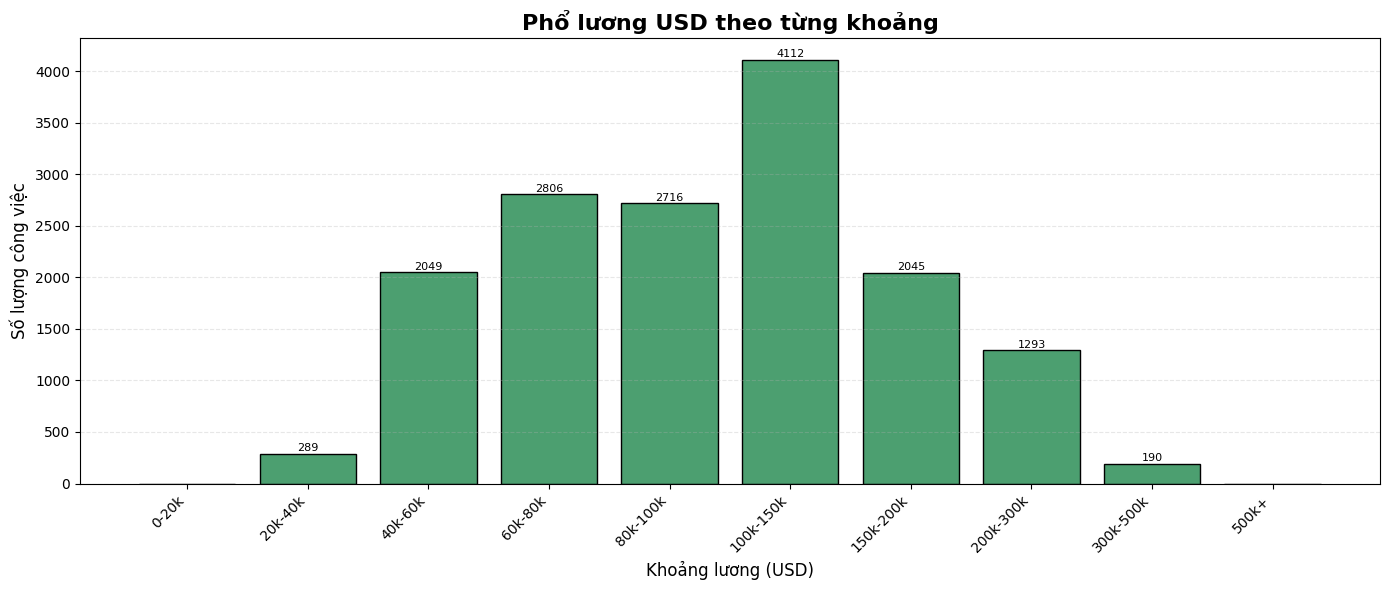

In [ ]:
# THỐNG KÊ PHỔ LƯƠNG
salary_bins = [0, 20000, 40000, 60000, 80000, 100000, 150000, 200000, 300000, 500000, 1000000]
salary_labels = ['0-20k', '20k-40k', '40k-60k', '60k-80k', '80k-100k', '100k-150k', '150k-200k', '200k-300k', '300k-500k', '500k+']

df_combined_tqh['salary_range'] = pd.cut(df_combined_tqh['salary_usd'], bins=salary_bins, labels=salary_labels, include_lowest=True)
pho_luong = df_combined_tqh['salary_range'].value_counts().sort_index()

# THỐNG KÊ MÔ TẢ
print("Thống kê mô tả lương USD:")
print(df_combined_tqh['salary_usd'].describe())
print("\nTần suất theo từng khoảng lương:")
print(pho_luong)

# TRỰC QUAN HÓA PHỔ LƯƠNG
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
bars = plt.bar(pho_luong.index.astype(str), pho_luong.values, color="#4C9F70", edgecolor="black")

# Đánh nhãn số lượng trên từng cột
for bar in bars:
    height = bar.get_height()
    if height > 0:
        plt.text(bar.get_x() + bar.get_width() / 2, height + 5, f'{int(height)}',
                 ha='center', va='bottom', fontsize=8)

plt.title("Phổ lương USD theo từng khoảng", fontsize=16, fontweight='bold')
plt.xlabel("Khoảng lương (USD)", fontsize=12)
plt.ylabel("Số lượng công việc", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


Biểu đồ “Phổ lương USD theo từng khoảng” cho thấy sự phân bố số lượng công việc theo mức lương hàng năm, chia thành các khoảng rộng 10.000 USD. Phân tích biểu đồ cho thấy phần lớn công việc tập trung ở mức lương từ 70.000 đến 120.000 USD, với đỉnh nằm ở khoảng (80.000–90.000] USD có tới 1451 việc làm, theo sát là (90.000–100.000] USD với 1441 việc làm. Từ khoảng 30.000–70.000 USD, số lượng việc làm tăng dần, sau đó đạt đỉnh và bắt đầu giảm dần đều từ sau 120.000 USD. Các khoảng lương từ 150.000 USD trở lên ghi nhận ít việc làm hơn, và từ 300.000 USD trở đi, mỗi khoảng chỉ có vài chục công việc, một số chỉ có từ 3 đến 7 vị trí. Dạng phân phối có xu hướng lệch phải, phản ánh việc phần lớn công việc có lương ở mức trung bình đến khá, trong khi lương cực cao chỉ xuất hiện rất hạn chế, thường dành cho các vị trí chuyên gia hoặc quản lý cấp cao. Biểu đồ thể hiện rõ sự phân hóa về thu nhập trong thị trường lao động AI/công nghệ hiện nay.

## Theo năm kinh nghiệm

In [ ]:
df_combined_tqh['years_experience'].describe()

,years_experience
count,15500.000000
mean,6.212774
std,5.460073
min,0.000000
25%,2.000000
50%,5.000000
75%,9.000000
max,19.000000


In [ ]:
bins = np.arange(0, 20, 1)
kinh_nghiem = df_combined_tqh['years_experience'].value_counts(bins=bins).sort_index()
kinh_nghiem

,count
"(-0.001, 1.0]",3718
"(1.0, 2.0]",1239
"(2.0, 3.0]",1247
"(3.0, 4.0]",1295
"(4.0, 5.0]",1257
"(5.0, 6.0]",753
"(6.0, 7.0]",769
"(7.0, 8.0]",720
"(8.0, 9.0]",742
"(9.0, 10.0]",384


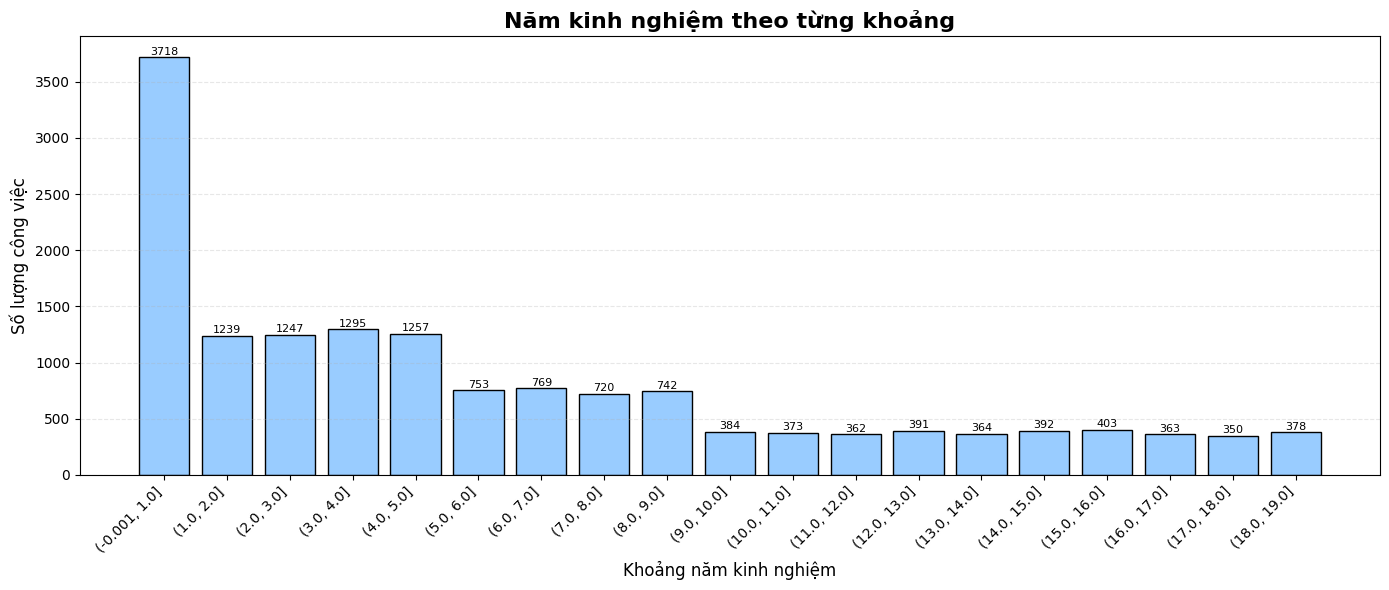

In [ ]:
plt.figure(figsize=(14, 6))
bars = plt.bar(kinh_nghiem.index.astype(str), kinh_nghiem.values, color="#99CCFF", edgecolor="black")

# Đánh nhãn số lượng trên từng cột
for bar in bars:
    height = bar.get_height()
    if height > 0:
        plt.text(bar.get_x() + bar.get_width() / 2, height + 5, f'{int(height)}',
                 ha='center', va='bottom', fontsize=8)

plt.title("Năm kinh nghiệm theo từng khoảng", fontsize=16, fontweight='bold')
plt.xlabel("Khoảng năm kinh nghiệm", fontsize=12)
plt.ylabel("Số lượng công việc", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

Biểu đồ thể hiện phân bố số lượng công việc theo các khoảng năm kinh nghiệm, mỗi khoảng rộng 1 năm. Dễ dàng nhận thấy rằng phần lớn công việc yêu cầu ít hơn 1 năm kinh nghiệm, với khoảng (-0.001, 1.0] chiếm áp đảo lên đến 3718 công việc — cao gần gấp 3 lần so với các khoảng kế tiếp. Đây là tín hiệu rõ ràng cho thấy thị trường đang có nhu cầu lớn đối với ứng viên mới ra trường, thực tập sinh hoặc junior.

Các khoảng từ 1–4 năm kinh nghiệm cũng có số lượng việc làm cao ổn định:

(1.0, 2.0]: 1239 việc

(2.0, 3.0]: 1247 việc

(3.0, 4.0]: 1295 việc

Từ 4 đến 9 năm, số lượng việc làm tiếp tục duy trì ở mức trung bình (khoảng 700–750 việc cho mỗi nhóm).

Bắt đầu từ trên 10 năm kinh nghiệm, biểu đồ cho thấy số lượng công việc giảm rõ rệt. Mỗi khoảng từ 10–19 năm chỉ dao động quanh 350–400 việc, cho thấy cơ hội dành cho các chuyên gia lâu năm tuy có nhưng không phổ biến bằng các vị trí cấp thấp và trung.

Tổng thể, biểu đồ phản ánh rằng thị trường lao động trong lĩnh vực này ưu tiên tuyển dụng ứng viên có kinh nghiệm thấp đến trung bình, và chỉ một phần nhỏ công việc yêu cầu mức kinh nghiệm cao hơn 10 năm.

## Độ dài của phần mô tả công việc

In [ ]:
df_combined_tqh['job_description_length'].describe()

,job_description_length
count,15500.000000
mean,1503.314733
std,566.757929
min,500.000000
25%,1020.750000
50%,1503.314733
75%,1984.000000
max,2499.000000


In [ ]:
bins = np.arange(500, 2600, 100)
mo_ta_cv = df_combined_tqh['job_description_length'].value_counts(bins=bins).sort_index()
mo_ta_cv

,count
"(499.999, 600.0]",735
"(600.0, 700.0]",740
"(700.0, 800.0]",736
"(800.0, 900.0]",742
"(900.0, 1000.0]",776
"(1000.0, 1100.0]",731
"(1100.0, 1200.0]",771
"(1200.0, 1300.0]",756
"(1300.0, 1400.0]",713
"(1400.0, 1500.0]",715


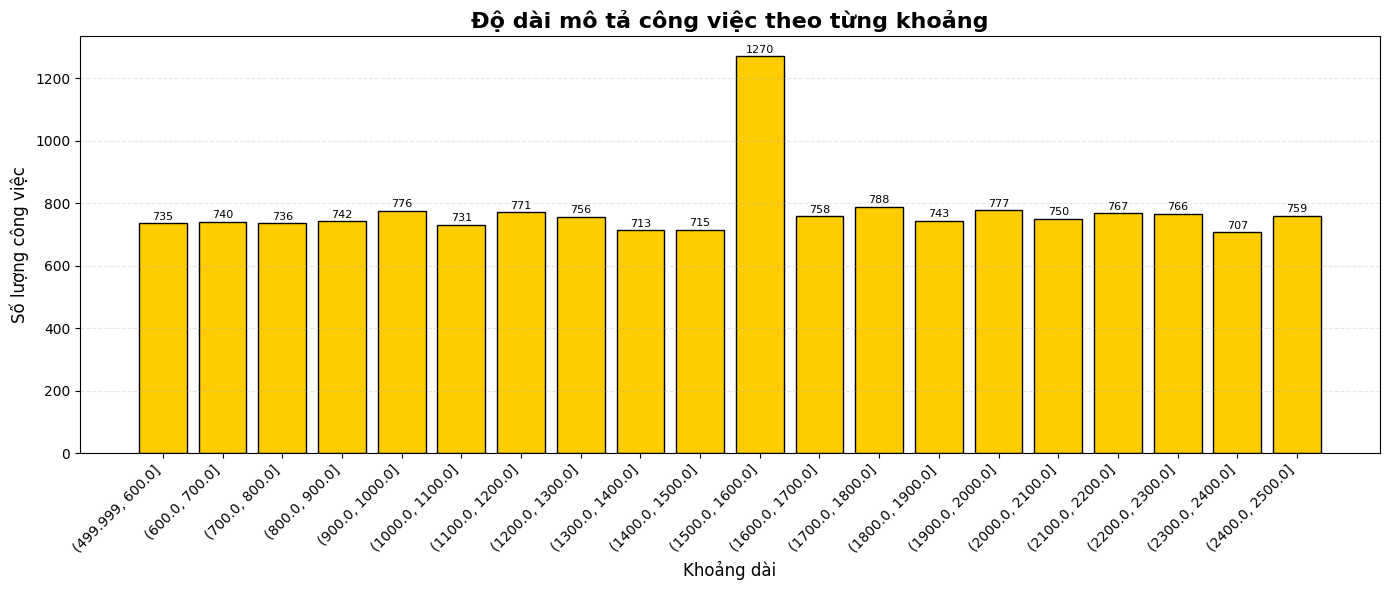

In [ ]:
plt.figure(figsize=(14, 6))
bars = plt.bar(mo_ta_cv.index.astype(str), mo_ta_cv.values, color="#FFCC00", edgecolor="black")

# Đánh nhãn số lượng trên từng cột
for bar in bars:
    height = bar.get_height()
    if height > 0:
        plt.text(bar.get_x() + bar.get_width() / 2, height + 5, f'{int(height)}',
                 ha='center', va='bottom', fontsize=8)

plt.title("Độ dài mô tả công việc theo từng khoảng", fontsize=16, fontweight='bold')
plt.xlabel("Khoảng dài", fontsize=12)
plt.ylabel("Số lượng công việc", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

Biểu đồ thể hiện sự phân bố số lượng công việc theo độ dài mô tả công việc (tính bằng số ký tự), chia thành các khoảng rộng 100 ký tự từ 500 đến 2500 ký tự. Khác với các biểu đồ phổ biến khác, biểu đồ này có dạng gần như bằng phẳng, cho thấy số lượng công việc phân bố khá đều trên toàn bộ các khoảng độ dài mô tả.

Cụ thể, mỗi khoảng đều có từ 700 đến gần 790 công việc, không có khoảng nào vượt trội rõ rệt. Khoảng có số lượng nhiều nhất là (1800.0 – 1900.0], với 788 công việc, theo sau là các khoảng như (1100.0 – 1200.0], (2000.0 – 2100.0], và (2200.0 – 2300.0], đều dao động quanh mức 770–777 việc. Các khoảng thấp hơn như (500.0 – 600.0] hay cao hơn như (2300.0 – 2400.0] tuy có ít hơn nhưng vẫn giữ mức ổn định (~707–735 việc).

Điều này cho thấy rằng các mô tả công việc trong cơ sở dữ liệu có độ dài tương đối đồng đều, không bị dồn về một mức cụ thể. Các nhà tuyển dụng dường như có xu hướng viết mô tả công việc trong khoảng từ 600 đến 2300 ký tự, không quá ngắn, cũng không quá dài — đủ để truyền tải thông tin cần thiết mà vẫn dễ đọc đối với ứng viên.

## Điểm số phúc lợi

In [ ]:
df_combined_tqh['benefits_score'].describe()

,benefits_score
count,15500.000000
mean,7.504135
std,1.427275
min,5.000000
25%,6.300000
50%,7.500000
75%,8.700000
max,10.000000


In [ ]:
bins = np.arange(5, 10.2, 0.2)
phuc_loi = df_combined_tqh['benefits_score'].value_counts(bins=bins).sort_index()
phuc_loi

,count
"(4.999, 5.2]",764
"(5.2, 5.4]",604
"(5.4, 5.6]",643
"(5.6, 5.8]",600
"(5.8, 6.0]",562
"(6.0, 6.2]",581
"(6.2, 6.4]",595
"(6.4, 6.6]",615
"(6.6, 6.8]",583
"(6.8, 7.0]",575


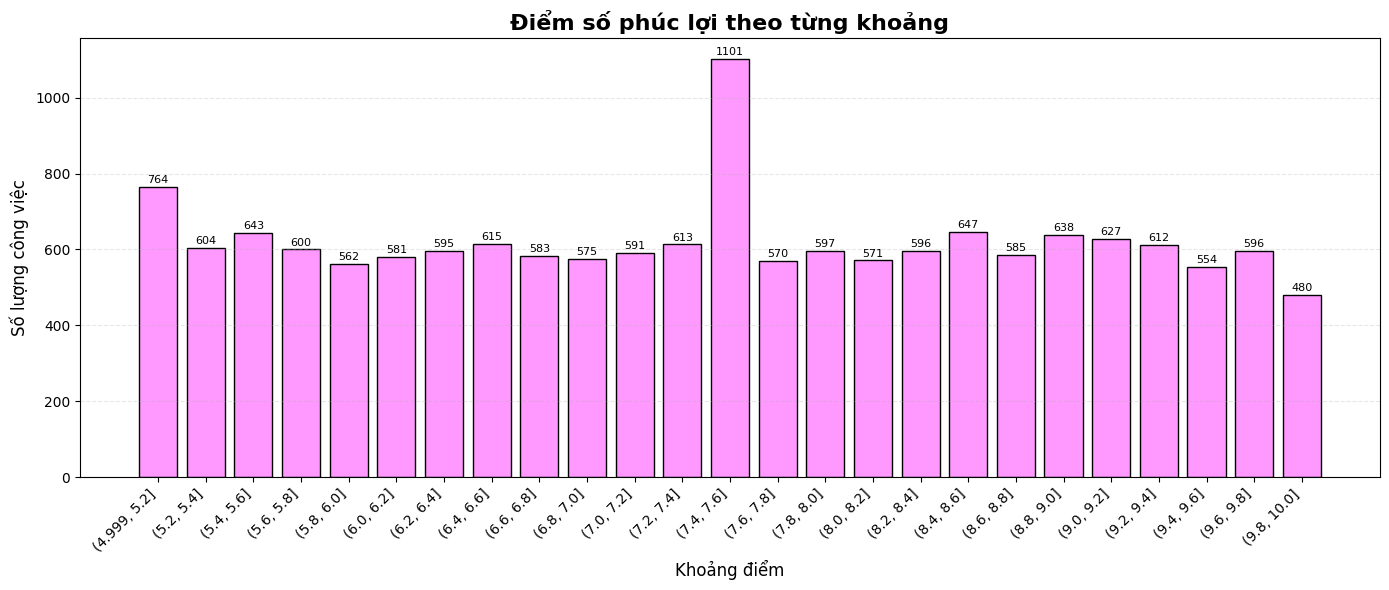

In [ ]:
plt.figure(figsize=(14, 6))
bars = plt.bar(phuc_loi.index.astype(str), phuc_loi.values, color="#FF99FF", edgecolor="black")

# Đánh nhãn số lượng trên từng cột
for bar in bars:
    height = bar.get_height()
    if height > 0:
        plt.text(bar.get_x() + bar.get_width() / 2, height + 5, f'{int(height)}',
                 ha='center', va='bottom', fontsize=8)

plt.title("Điểm số phúc lợi theo từng khoảng", fontsize=16, fontweight='bold')
plt.xlabel("Khoảng điểm", fontsize=12)
plt.ylabel("Số lượng công việc", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

Biểu đồ thể hiện số lượng công việc theo các khoảng điểm số phúc lợi, được chia thành các khoảng nhỏ rộng 0.2 điểm trong thang điểm từ khoảng 5.0 đến 10.0. Nhìn chung, biểu đồ cho thấy phân bố khá đều, tuy nhiên vẫn có sự dao động nhẹ giữa các khoảng.

Khoảng điểm có số lượng công việc nhiều nhất là (4.999, 5.2], với 764 việc làm, cho thấy một số lượng đáng kể công việc có điểm phúc lợi khá thấp. Ngoài ra, một đỉnh phụ khác nằm ở khoảng (8.4, 8.6] với 647 việc, cho thấy có một nhóm công việc có mức đánh giá phúc lợi khá cao. Các khoảng điểm khác như (5.2, 5.4], (6.6, 6.8], (7.4, 7.6], (9.0, 9.2] cũng có số lượng công việc dao động từ 600–640, thể hiện một sự phân bố khá ổn định trên toàn phổ điểm.

Từ điểm 9.6 trở đi, số lượng công việc bắt đầu giảm mạnh, với khoảng cuối cùng (9.8, 10.0] chỉ còn 480 việc, thấp nhất biểu đồ. Điều này phản ánh rằng các công việc có phúc lợi gần như tuyệt đối (trên 9.8 điểm) là khá hiếm.

Tóm lại, biểu đồ cho thấy phần lớn công việc có điểm phúc lợi nằm trong vùng từ 5.0 đến 9.6, và rất ít công việc chạm đến mức gần 10 điểm. Mức độ đánh giá phúc lợi giữa các công việc không có sự phân hóa quá lớn, tuy nhiên vẫn có xu hướng giảm nhẹ ở các khoảng điểm quá cao hoặc quá thấp.



# Lựa chọn các đặc chưng của dữ liệu

In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15500 entries, 0 to 15499
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   job_id                  15500 non-null  object        
 1   job_title               15500 non-null  object        
 2   salary_usd              15500 non-null  float64       
 3   salary_currency         15500 non-null  object        
 4   experience_level        15500 non-null  object        
 5   employment_type         15500 non-null  object        
 6   company_location        15500 non-null  object        
 7   company_size            15500 non-null  object        
 8   employee_residence      15500 non-null  object        
 9   remote_ratio            15500 non-null  int64         
 10  required_skills         15161 non-null  object        
 11  education_required      15500 non-null  object        
 12  years_experience        15500 non-null  float6

Phân tích các đặc chưng và xác định đặc trưng quan trọng

In [ ]:
df_combined_df_copy = combined_df.copy()
df_combined_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15500 entries, 0 to 15499
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   job_id                  15500 non-null  object        
 1   job_title               15500 non-null  object        
 2   salary_usd              15500 non-null  float64       
 3   salary_currency         15500 non-null  object        
 4   experience_level        15500 non-null  object        
 5   employment_type         15500 non-null  object        
 6   company_location        15500 non-null  object        
 7   company_size            15500 non-null  object        
 8   employee_residence      15500 non-null  object        
 9   remote_ratio            15500 non-null  int64         
 10  required_skills         15161 non-null  object        
 11  education_required      15500 non-null  object        
 12  years_experience        15500 non-null  float6

Analyzing salary relationship for top 10 skills: ['Python', 'SQL', 'TensorFlow', 'Kubernetes', 'Scala', 'PyTorch', 'Linux', 'Git', 'Java', 'GCP']

Salary Analysis for Top Skills:


,skill,mean_salary_with_skill,mean_salary_without_skill,t_statistic,p_value,significant_difference
4,Scala,117207.426271,113990.880174,2.536360,0.011239,True
7,Git,116659.985177,114143.542737,1.973535,0.048507,True
9,GCP,115799.629402,114340.862114,1.098038,0.272266,False
5,PyTorch,115527.204537,114361.913502,0.919280,0.358004,False
8,Java,115336.409620,114417.923579,0.704873,0.480935,False
2,TensorFlow,115143.438120,114431.976478,0.583553,0.559550,False
3,Kubernetes,115123.522100,114437.514569,0.570691,0.568237,False
6,Linux,114640.255453,114555.981359,0.065873,0.947483,False
0,Python,114138.909826,114747.878905,-0.574959,0.565334,False
1,SQL,113933.561491,114750.188414,-0.706623,0.479831,False


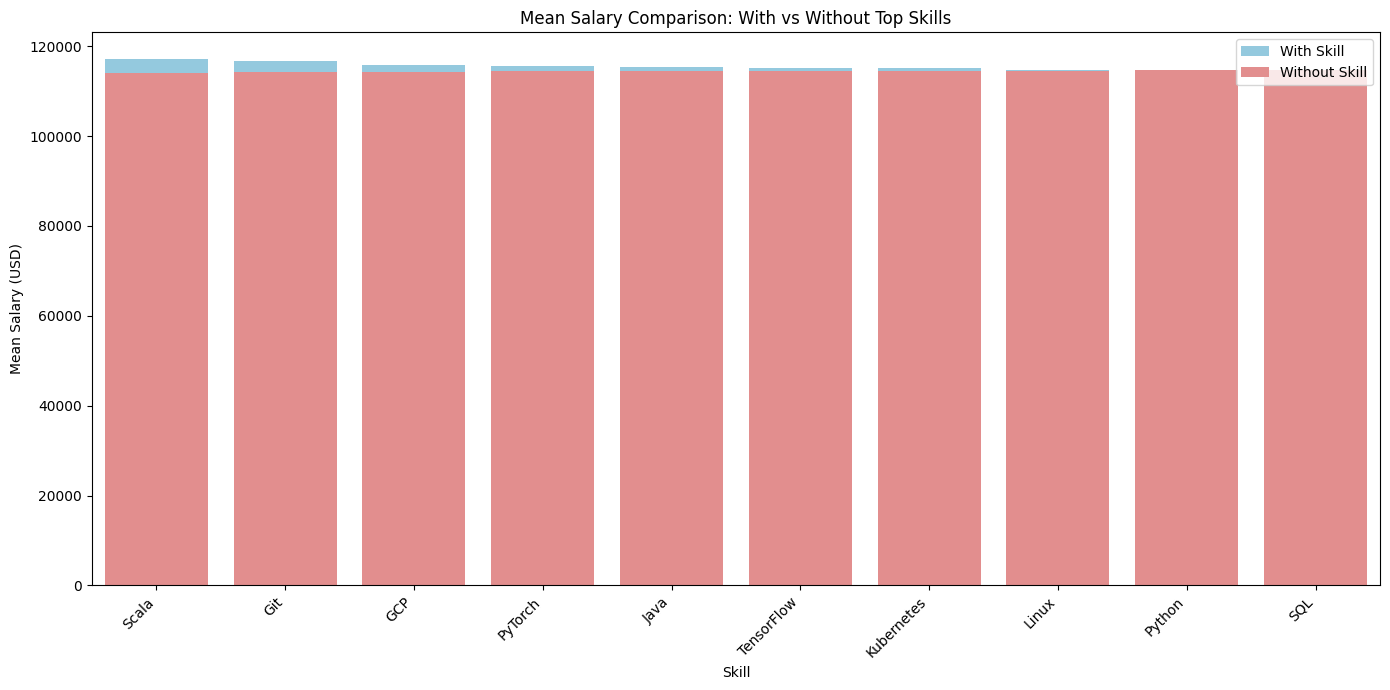

Thống kê mô tả Salary USD theo Industry:


,count,mean,std,min,25%,50%,75%,max
industry,,,,,,,,
Automotive,1020.0,113987.241176,60933.399289,33220.000000,69710.750000,97060.500000,141036.000000,398084.000000
Consulting,1020.0,117602.142157,62785.427108,33172.000000,71083.750000,100983.500000,145943.000000,371087.000000
Education,1013.0,114776.051085,58105.819806,33280.000000,73213.000000,100036.000000,143697.000000,346789.000000
Energy,1025.0,114116.436128,59503.735362,32519.000000,71026.000000,98308.000000,144165.000000,381575.000000
Entertainment,47.0,94291.233910,20517.352871,35963.297317,80107.167205,92422.938037,107717.965662,139078.066919
Finance,1037.0,114251.748965,57899.766550,32542.000000,70986.000000,100929.000000,141973.000000,350761.000000
Gaming,967.0,112979.574974,60564.394097,33013.000000,66343.500000,96073.000000,147922.500000,364635.000000
Government,998.0,115694.321643,58569.412229,33804.000000,72191.750000,101914.500000,146461.000000,343803.000000
Healthcare,1039.0,113514.436174,57695.789605,32907.000000,69861.500000,100060.000000,142866.500000,379418.000000



ANOVA results for salary_usd vs Industry:
F-statistic: 0.7587
P-value: 0.7251
Result: There is no statistically significant difference in mean salary across different industries.


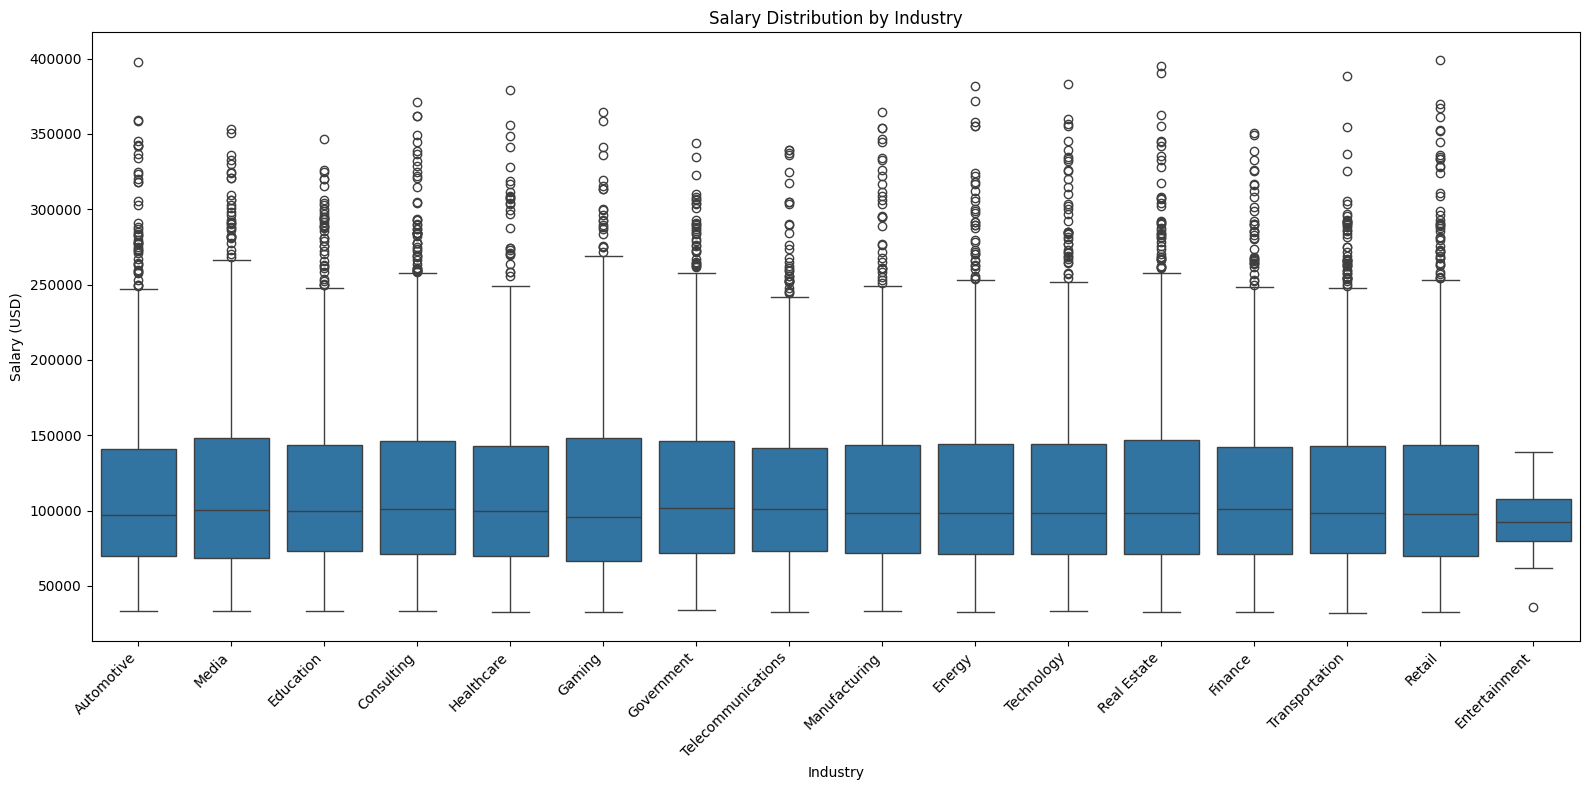

Thống kê mô tả Salary USD theo Company Location:


,count,mean,std,min,25%,50%,75%,max
company_location,,,,,,,,
Australia,784.0,116490.953229,53428.843787,45186.524272,75438.880825,100346.181058,144593.500000,292604.000000
Austria,765.0,85174.530719,38107.232168,32542.000000,55859.000000,74005.000000,103835.000000,206978.000000
Canada,810.0,112966.954440,50302.101460,44119.000000,74058.750000,98746.266827,140418.500000,271344.000000
China,763.0,84899.003932,38548.446946,33013.000000,53937.000000,76543.000000,105007.500000,204450.000000
Denmark,778.0,165652.249357,73854.448697,59596.000000,107738.250000,147504.500000,211135.750000,379418.000000
Finland,733.0,88726.242838,39768.627132,32977.000000,56745.000000,80143.000000,113428.000000,206490.000000
France,815.0,113152.999735,49148.452517,43226.000000,75517.000000,100789.000000,141015.500000,275694.000000
Germany,862.0,120219.251403,53341.920312,33601.381360,80238.500000,105742.500000,149566.250000,291446.000000
India,754.0,84236.051724,37443.657103,32519.000000,54648.750000,76035.000000,103781.250000,203402.000000



ANOVA results for salary_usd vs Company Location:
F-statistic: 208.7154
P-value: 0.0000
Result: The difference in mean salary across different company locations is statistically significant.


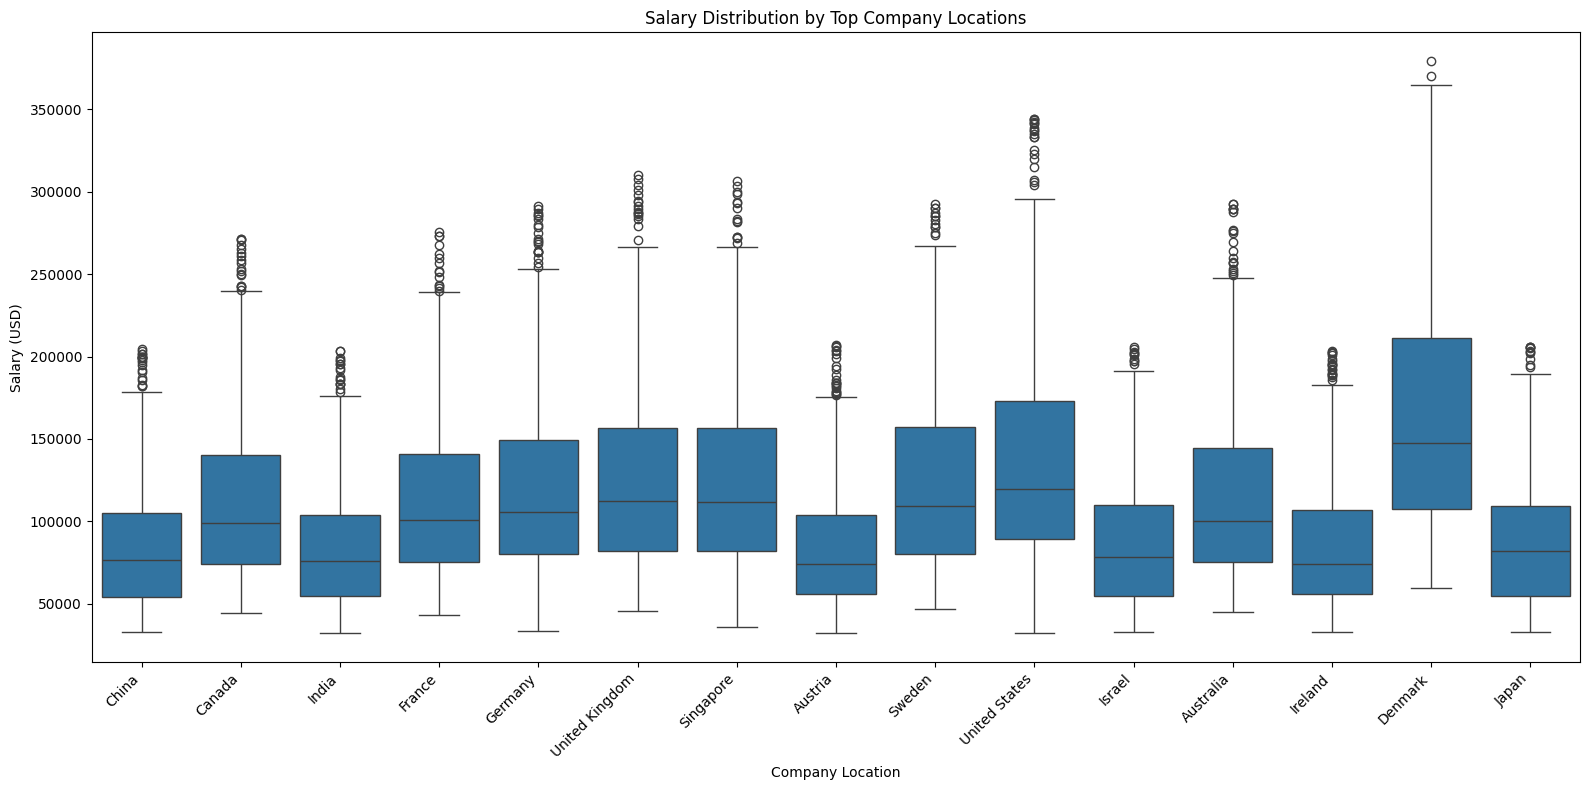

Thống kê mô tả Salary USD theo Job Title:


,count,mean,std,min,25%,50%,75%,max
job_title,,,,,,,,
AI Architect,771.0,117436.513619,62061.058583,33220.000000,72687.000000,99888.000000,147488.000000,398084.000000
AI Consultant,704.0,113671.870739,54325.238938,33959.000000,73392.500000,101471.000000,144808.500000,325757.000000
AI Product Manager,743.0,114680.909825,60827.595611,33770.000000,69147.000000,99434.000000,146486.500000,381575.000000
AI Research Scientist,756.0,117897.925926,64166.702875,33092.000000,69937.250000,100990.000000,149985.500000,394917.000000
AI Researcher,51.0,95583.346966,16105.228759,67469.063754,81677.657590,98036.517081,106258.164475,126266.824105
AI Software Engineer,784.0,114273.201531,59400.327755,33013.000000,69284.250000,97701.500000,148386.750000,379418.000000
AI Specialist,728.0,120570.758242,64677.838666,34174.000000,73077.750000,103626.500000,155871.000000,390292.000000
Autonomous Systems Engineer,777.0,111396.557272,54782.196489,32790.000000,70100.000000,97415.000000,141125.000000,364585.000000
Computer Vision Engineer,724.0,113472.707182,58841.727241,32519.000000,71331.000000,96679.000000,141749.500000,366957.000000



ANOVA results for salary_usd vs Top 10 Job Titles:
F-statistic: 1.7715
P-value: 0.0683
Result: There is no statistically significant difference in mean salary across top 10 job titles.


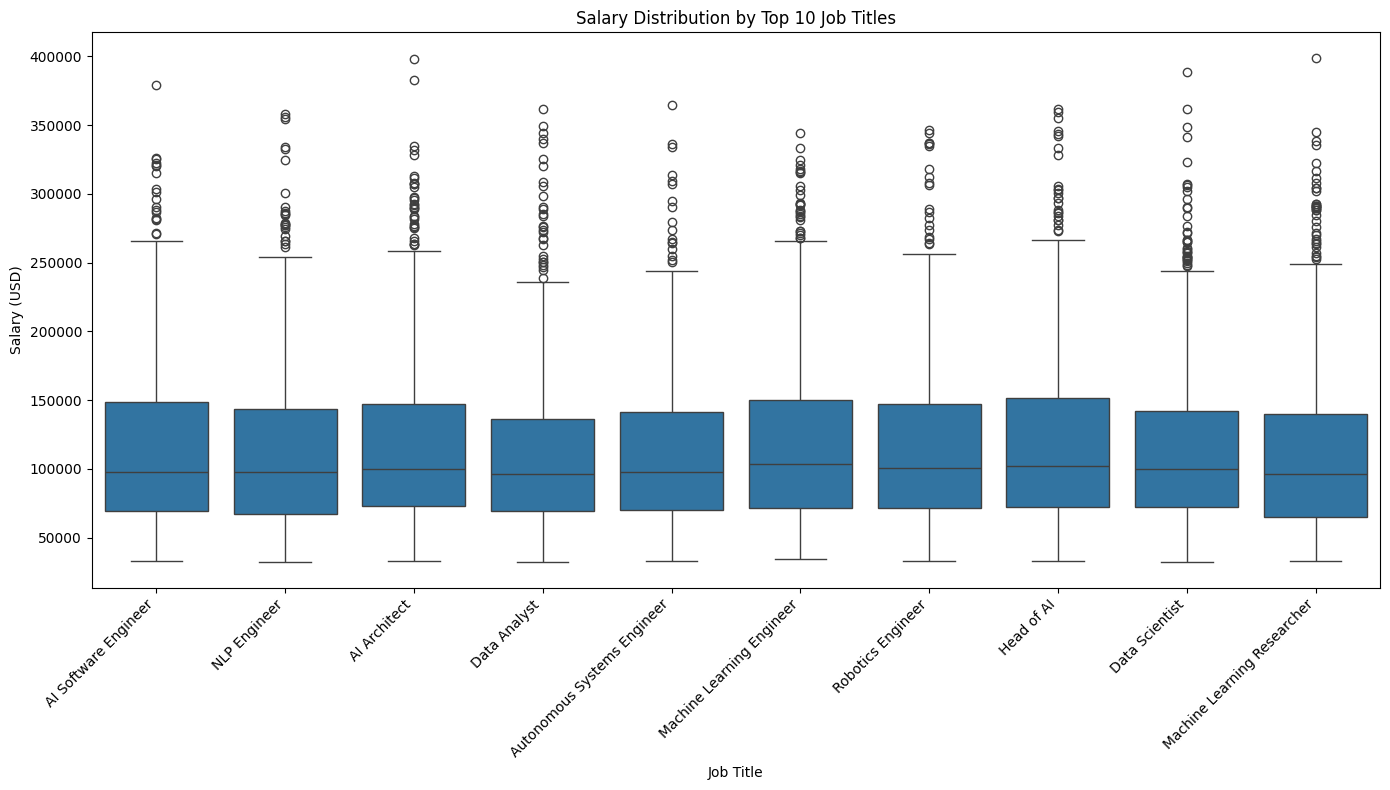


Unique values in 'experience_level': ['SE' 'EN' 'MI' 'EX']
Value counts for 'experience_level':
 experience_level
MI    4281
EX    3760
SE    3741
EN    3718
Name: count, dtype: int64

ANOVA results for salary_usd vs experience_level:
F-statistic: 7834.5146
P-value: 0.0000
Result: The difference in mean salary across different experience levels is statistically significant.


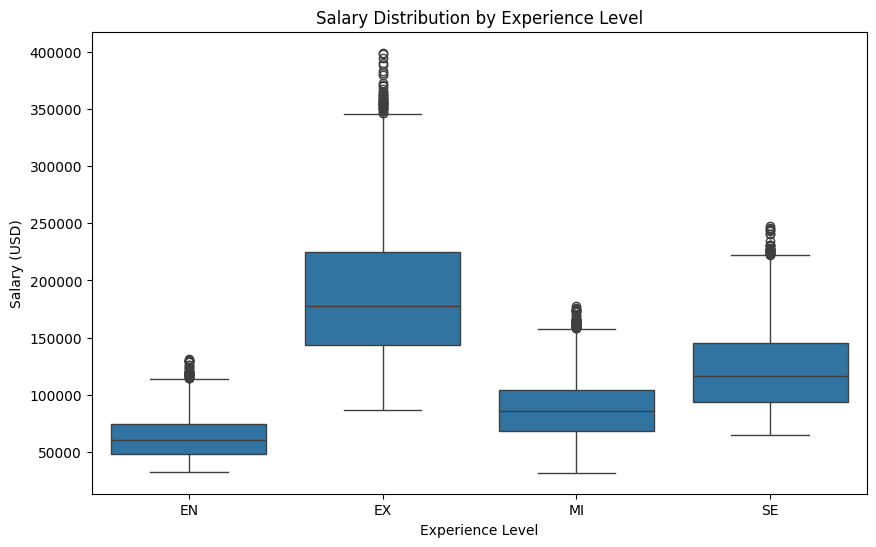


Unique values in 'employment_type': ['CT' 'FL' 'PT' 'FT']
Value counts for 'employment_type':
 employment_type
FT    4312
FL    3758
CT    3721
PT    3709
Name: count, dtype: int64

ANOVA results for salary_usd vs employment_type:
F-statistic: 1.2855
P-value: 0.2774
Result: There is no statistically significant difference in mean salary across different employment types.


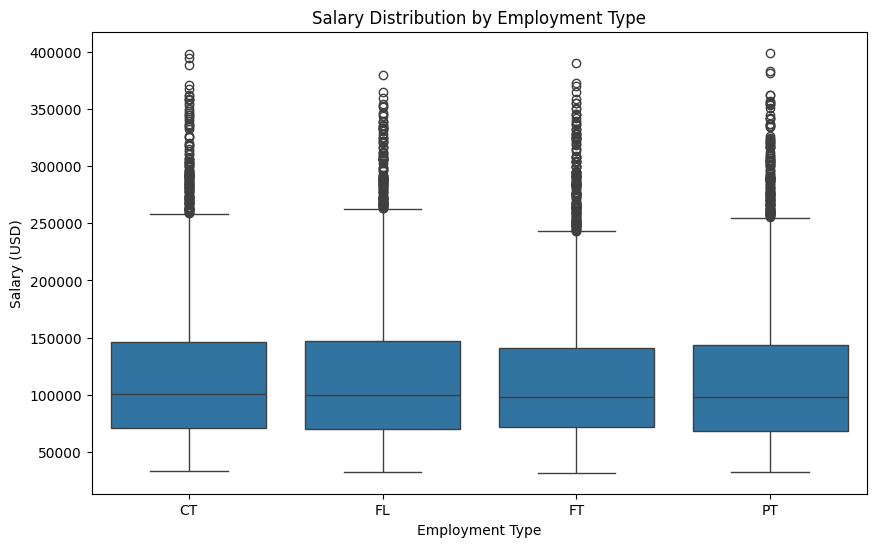


Unique values in 'company_size': ['M' 'L' 'S']
Value counts for 'company_size':
 company_size
S    5178
L    5164
M    5158
Name: count, dtype: int64

ANOVA results for salary_usd vs company_size:
F-statistic: 283.3577
P-value: 0.0000
Result: The difference in mean salary across different company sizes is statistically significant.


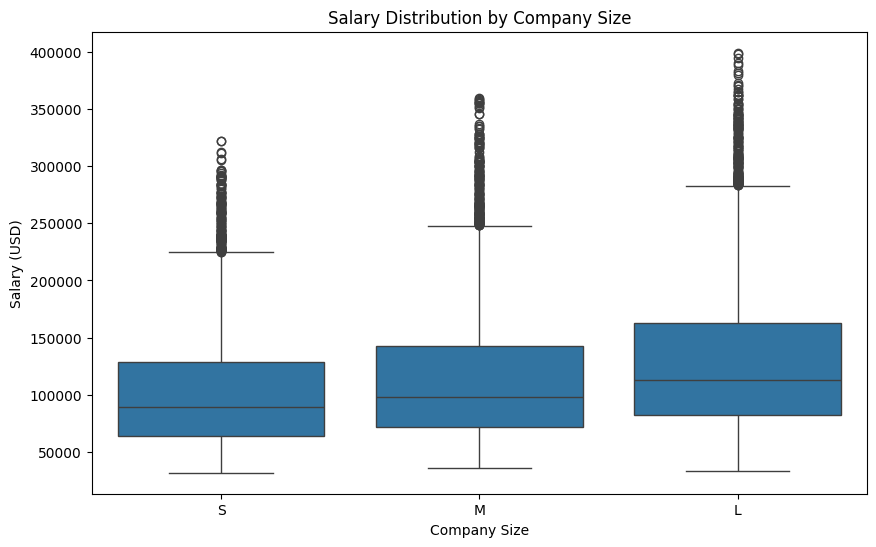


Unique values in 'remote_ratio': [ 50 100   0]
Value counts for 'remote_ratio':
 remote_ratio
0      5324
100    5171
50     5005
Name: count, dtype: int64

Independent Samples T-test results for salary_usd vs remote_ratio:
T-statistic: -1.6820
P-value: 0.0926
Result: There is no statistically significant difference in mean salary between remote_ratio 0 and 100.


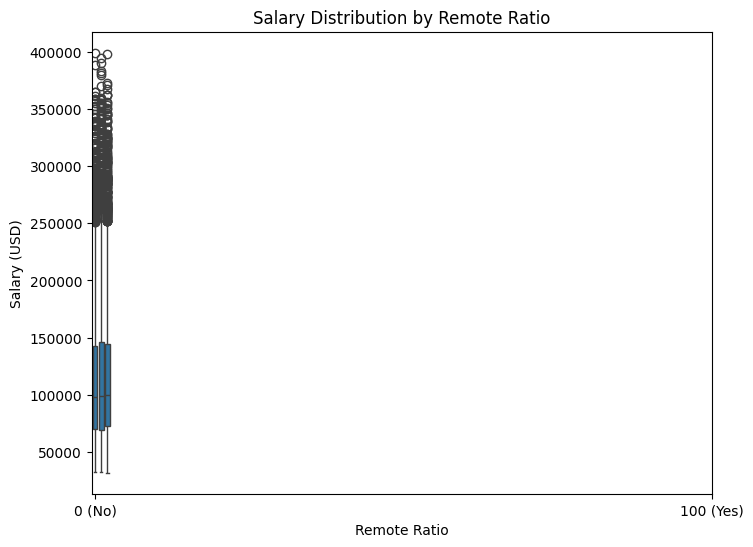


Pearson Correlation results for salary_usd vs years_experience:
Correlation Coefficient: 0.7365
P-value: 0.0000
Result: There is a statistically significant linear relationship between years_experience and salary_usd.
Direction and Strength: The correlation is 0.7365, indicating a positive and strong linear relationship.


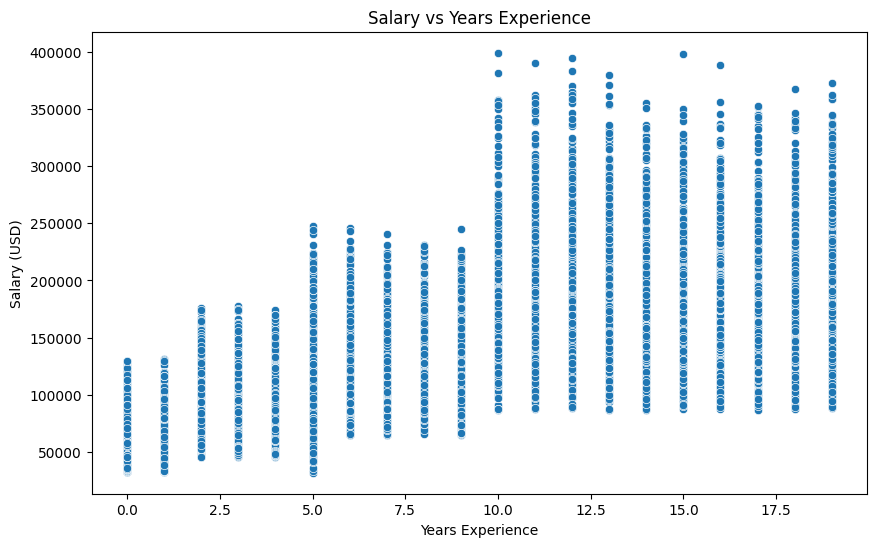


Pearson Correlation results for salary_usd vs job_description_length:
Correlation Coefficient: -0.0091
P-value: 0.2598
Result: There is no statistically significant linear relationship between job_description_length and salary_usd.


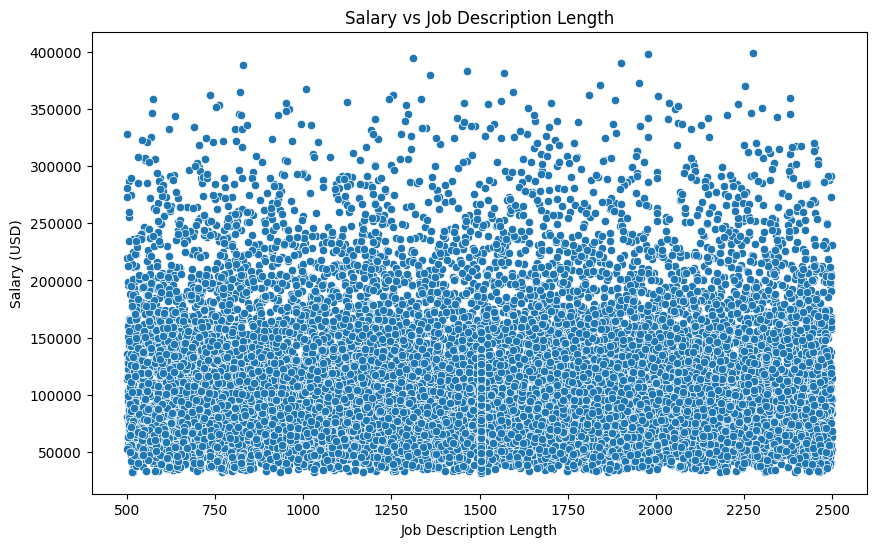


Pearson Correlation results for salary_usd vs benefits_score:
Correlation Coefficient: 0.0010
P-value: 0.8991
Result: There is no statistically significant linear relationship between benefits_score and salary_usd.


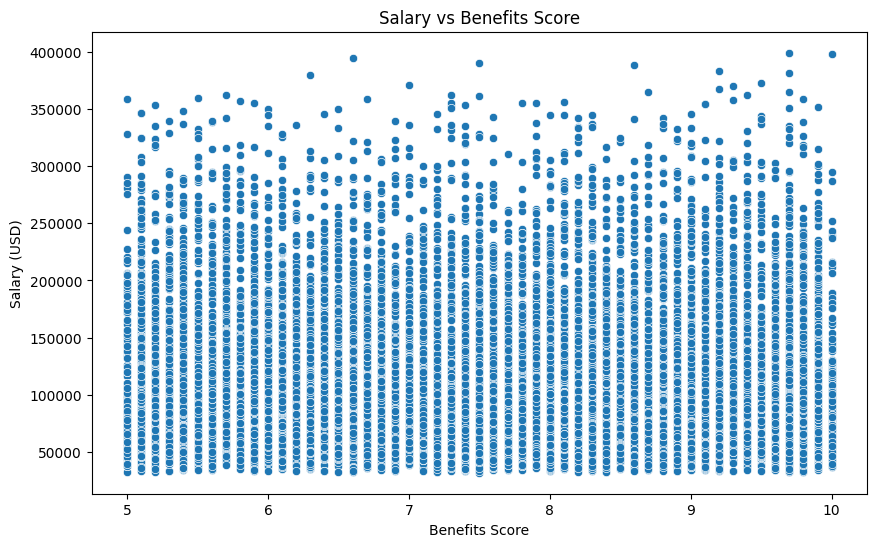

In [ ]:
import scipy.stats as stats
# Kiểm định t (t-test): Đánh giá sự khác biệt giữa hai nhóm dữ liệu
# Kiểm tra các giá trị duy nhất và số lượng cho Ngành
# Tính lại số lượng kỹ năng từ cột required_skills SAU KHI nhóm lại
all_skills_after_grouping = []
# Giả sử 'combined_df' là DataFrame đã áp dụng logic nhóm cho 'required_skills'
for skills_str in combined_df['required_skills'].dropna():
    skills = [s.strip() for s in skills_str.replace(',', ';').split(';') if s.strip()]
    all_skills_after_grouping.extend(skills)

skill_counts_after_grouping = pd.Series(all_skills_after_grouping).value_counts()

top_skills = skill_counts_after_grouping.head(10).index.tolist()

print(f"Analyzing salary relationship for top {len(top_skills)} skills: {top_skills}")
# Tạo đặc trưng nhị phân cho mỗi kỹ năng phổ biến
# Cần sử dụng combined_df gốc trước khi mã hóa rộng rãi cho việc này
df_skills_analysis = combined_df.copy()

for skill in top_skills:
    # Tạo một cột nhị phân cho mỗi kỹ năng hàng đầu
    # Kiểm tra xem kỹ năng (không phân biệt hoa thường) có mặt trong chuỗi 'required_skills' hay không (xử lý None/NaN)
    df_skills_analysis[f'has_{skill.replace(" ", "_").replace(";", "_").lower()}'] = df_skills_analysis['required_skills'].apply(
        lambda x: 1 if isinstance(x, str) and skill.lower() in [s.strip().lower() for s in x.replace(';', ',').split(',') if s.strip()] else 0
    )

# Phân tích mối quan hệ của từng kỹ năng phổ biến với salary_usd
analysis_results = []

for skill in top_skills:
    skill_col = f'has_{skill.replace(" ", "_").replace(";", "_").lower()}'

    # Kiểm tra xem có đủ dữ liệu cho cả hai nhóm (có và không có kỹ năng) không
    if df_skills_analysis[skill_col].sum() > 1 and (len(df_skills_analysis) - df_skills_analysis[skill_col].sum()) > 1:
        # Tách salary_usd cho nhóm có kỹ năng và nhóm không có kỹ năng
        salary_has_skill = df_skills_analysis['salary_usd'][df_skills_analysis[skill_col] == 1].dropna()
        salary_no_skill = df_skills_analysis['salary_usd'][df_skills_analysis[skill_col] == 0].dropna()

        # Thực hiện Independent Samples T-test
        if len(salary_has_skill) > 1 and len(salary_no_skill) > 1:
             t_statistic, p_value = stats.ttest_ind(salary_has_skill, salary_no_skill, equal_var=False, nan_policy='omit') # Welch's t-test, handles unequal variances

             mean_has_skill = salary_has_skill.mean()
             mean_no_skill = salary_no_skill.mean()

             analysis_results.append({
                 'skill': skill,
                 'mean_salary_with_skill': mean_has_skill,
                 'mean_salary_without_skill': mean_no_skill,
                 't_statistic': t_statistic,
                 'p_value': p_value,
                 'significant_difference': p_value < 0.05 # Using alpha = 0.05
             })
        else:
             print(f"Skipping T-test for '{skill}' due to insufficient data in one or both groups.")
    else:
        print(f"Skipping T-test for '{skill}' due to insufficient data in one or both groups.")


# Hiển thị kết quả phân tích
analysis_df = pd.DataFrame(analysis_results)
if not analysis_df.empty:
    analysis_df = analysis_df.sort_values(by='mean_salary_with_skill', ascending=False)
    print("\nSalary Analysis for Top Skills:")
    display(analysis_df)

    # Trực quan hóa mức lương trung bình cho các kỹ năng phổ biến
    if not analysis_df.empty:
        plt.figure(figsize=(14, 7))
        sns.barplot(x='skill', y='mean_salary_with_skill', data=analysis_df, color='skyblue', label='With Skill')
        sns.barplot(x='skill', y='mean_salary_without_skill', data=analysis_df, color='lightcoral', label='Without Skill')
        plt.title('Mean Salary Comparison: With vs Without Top Skills')
        plt.xlabel('Skill')
        plt.ylabel('Mean Salary (USD)')
        plt.xticks(rotation=45, ha='right')
        plt.legend()
        plt.tight_layout()
        plt.show()
else:
    print("\nNo significant salary analysis results for top skills.")

# Kiểm tra giá trị duy nhất và số lượng cho remote_ratio
print("\nUnique values in 'remote_ratio':", combined_df['remote_ratio'].unique())
print("Value counts for 'remote_ratio':\n", combined_df['remote_ratio'].value_counts())

# Tách lương cho hai nhóm (0 và 100)
salary_remote_0 = combined_df['salary_usd'][combined_df['remote_ratio'] == 0].dropna()
salary_remote_100 = combined_df['salary_usd'][combined_df['remote_ratio'] == 100].dropna()

# Thực hiện kiểm định t cho các mẫu độc lập
# Kiểm tra xem cả hai nhóm có đủ dữ liệu không (ít nhất 2 mẫu)
if len(salary_remote_0) > 1 and len(salary_remote_100) > 1:
    t_statistic, p_value = stats.ttest_ind(salary_remote_0, salary_remote_100, equal_var=False)

    print(f"\nIndependent Samples T-test results for salary_usd vs remote_ratio:")
    print(f"T-statistic: {t_statistic:.4f}")
    print(f"P-value: {p_value:.4f}")

    # Diễn giải
    alpha = 0.05
    if p_value < alpha:
        print("Result: The difference in mean salary between remote_ratio 0 and 100 is statistically significant.")
    else:
        print("Result: There is no statistically significant difference in mean salary between remote_ratio 0 and 100.")

    # trực quan hóa with a box plot
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='remote_ratio', y='salary_usd', data=combined_df)
    plt.title('Salary Distribution by Remote Ratio')
    plt.xlabel('Remote Ratio')
    plt.ylabel('Salary (USD)')
    plt.xticks([0, 100], ['0 (No)', '100 (Yes)'])
    plt.show()
else:
     print("\nNot enough data in remote_ratio categories to perform T-test.")

# Phân tích phương sai (ANOVA): Đánh giá sự khác biệt giữa nhiều nhóm dữ liệu.
# Kiểm tra các giá trị duy nhất và số lượng cho Ngành
print("Thống kê mô tả Salary USD theo Industry:")
display(combined_df.groupby('industry')['salary_usd'].describe())

# Kiểm định ANOVA (nếu số lượng Industry không quá lớn)
industries = combined_df['industry'].unique()
salary_by_industry = [combined_df['salary_usd'][combined_df['industry'] == ind].dropna() for ind in industries]

# Loại bỏ các nhóm rỗng hoặc chỉ có 1 giá trị
valid_salary_groups = [group for group in salary_by_industry if len(group) > 1]

if len(valid_salary_groups) >= 2:
    f_statistic, p_value = stats.f_oneway(*valid_salary_groups)
    print(f"\nANOVA results for salary_usd vs Industry:")
    print(f"F-statistic: {f_statistic:.4f}")
    print(f"P-value: {p_value:.4f}")

    alpha = 0.05
    if p_value < alpha:
        print("Result: The difference in mean salary across different industries is statistically significant.")
    else:
        print("Result: There is no statistically significant difference in mean salary across different industries.")
else:
     print("\nNot enough data in industry categories to perform ANOVA.")


# Trực quan hóa với Box Plot
plt.figure(figsize=(16, 8))
sns.boxplot(x='industry', y='salary_usd', data=combined_df)
plt.title('Salary Distribution by Industry')
plt.xlabel('Industry')
plt.ylabel('Salary (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Kiểm tra giá trị duy nhất và số lượng cho Địa điểm Công ty
print("Thống kê mô tả Salary USD theo Company Location:")
display(combined_df.groupby('company_location')['salary_usd'].describe())

# Kiểm định ANOVA (nếu số lượng Company Location không quá lớn)
company_locations = combined_df['company_location'].unique()
salary_by_location = [combined_df['salary_usd'][combined_df['company_location'] == loc].dropna() for loc in company_locations]

# Loại bỏ các nhóm rỗng hoặc chỉ có 1 giá trị
valid_salary_groups = [group for group in salary_by_location if len(group) > 1]

if len(valid_salary_groups) >= 2:
    f_statistic, p_value = stats.f_oneway(*valid_salary_groups)
    print(f"\nANOVA results for salary_usd vs Company Location:")
    print(f"F-statistic: {f_statistic:.4f}")
    print(f"P-value: {p_value:.4f}")

    alpha = 0.05
    if p_value < alpha:
        print("Result: The difference in mean salary across different company locations is statistically significant.")
    else:
        print("Result: There is no statistically significant difference in mean salary across different company locations.")
else:
    print("\nNot enough data in company location categories to perform ANOVA.")

# Trực quan hóa với Box Plot (chỉ cho các Company Location phổ biến để biểu đồ dễ đọc, hoặc điều chỉnh kích thước)
# Lấy top N địa điểm nếu cần, hoặc vẽ tất cả nếu số lượng vừa phải
top_locations = combined_df['company_location'].value_counts().nlargest(15).index.tolist() # Adjust N as needed
plt.figure(figsize=(16, 8))
sns.boxplot(x='company_location', y='salary_usd', data=combined_df[combined_df['company_location'].isin(top_locations)])
plt.title('Salary Distribution by Top Company Locations')
plt.xlabel('Company Location')
plt.ylabel('Salary (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Kiểm tra giá trị duy nhất và số lượng cho Chức danh công việc
print("Thống kê mô tả Salary USD theo Job Title:")
display(combined_df.groupby('job_title')['salary_usd'].describe())

# Có thể chọn các Job Title phổ biến nhất để kiểm định.
top_job_titles = combined_df['job_title'].value_counts().nlargest(10).index.tolist()
salary_by_top_job_title = [combined_df['salary_usd'][combined_df['job_title'] == title].dropna() for title in top_job_titles]

# Loại bỏ các nhóm rỗng hoặc chỉ có 1 giá trị
valid_salary_groups = [group for group in salary_by_top_job_title if len(group) > 1]

if len(valid_salary_groups) >= 2:
    f_statistic, p_value = stats.f_oneway(*valid_salary_groups)
    print(f"\nANOVA results for salary_usd vs Top 10 Job Titles:")
    print(f"F-statistic: {f_statistic:.4f}")
    print(f"P-value: {p_value:.4f}")

    alpha = 0.05
    if p_value < alpha:
        print("Result: The difference in mean salary across top 10 job titles is statistically significant.")
    else:
        print("Result: There is no statistically significant difference in mean salary across top 10 job titles.")
else:
    print("\nNot enough data in top job title categories to perform ANOVA.")


# Trực quan hóa với Box Plot (chỉ cho các Job Title phổ biến để biểu đồ dễ đọc)
plt.figure(figsize=(14, 8))
sns.boxplot(x='job_title', y='salary_usd', data=combined_df[combined_df['job_title'].isin(top_job_titles)])
plt.title('Salary Distribution by Top 10 Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Salary (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Kiểm tra giá trị duy nhất và số lượng cho mức độ kinh nghiệm
print("\nUnique values in 'experience_level':", combined_df['experience_level'].unique())
print("Value counts for 'experience_level':\n", combined_df['experience_level'].value_counts())

# Chuẩn bị dữ liệu cho ANOVA
# Tạo danh sách các mảng lương, một cho mỗi cấp độ kinh nghiệm
experience_levels = combined_df['experience_level'].unique()
salary_by_experience = [combined_df['salary_usd'][combined_df['experience_level'] == level].dropna() for level in experience_levels]

# Thực hiện phân tích phương sai một chiều
f_statistic, p_value = stats.f_oneway(*salary_by_experience)

print(f"\nANOVA results for salary_usd vs experience_level:")
print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Diễn giải
alpha = 0.05
if p_value < alpha:
    print("Result: The difference in mean salary across different experience levels is statistically significant.")
else:
    print("Result: There is no statistically significant difference in mean salary across different experience levels.")

# Trực quan hóa với Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='experience_level', y='salary_usd', data=combined_df.sort_values('experience_level'))
plt.title('Salary Distribution by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary (USD)')
plt.show()

# Kiểm tra giá trị duy nhất và số lượng cho employment_type
print("\nUnique values in 'employment_type':", combined_df['employment_type'].unique())
print("Value counts for 'employment_type':\n", combined_df['employment_type'].value_counts())

# chuẩn bị dữ liệu ANOVA
employment_types = combined_df['employment_type'].unique()
salary_by_employment = [combined_df['salary_usd'][combined_df['employment_type'] == etype].dropna() for etype in employment_types]

# Thực hiện phân tích ANOVA một chiều - Cần xử lý các trường hợp mà một hạng mục có thể không có mức lương không phải NaN.
valid_salary_groups = [group for group in salary_by_employment if len(group) > 1] # ANOVA cần ít nhất 2 điểm dữ liệu cho mỗi nhóm

if len(valid_salary_groups) >= 2:
    f_statistic, p_value = stats.f_oneway(*valid_salary_groups)

    print(f"\nANOVA results for salary_usd vs employment_type:")
    print(f"F-statistic: {f_statistic:.4f}")
    print(f"P-value: {p_value:.4f}")

    # Diễn giải
    alpha = 0.05
    if p_value < alpha:
        print("Result: The difference in mean salary across different employment types is statistically significant.")
    else:
        print("Result: There is no statistically significant difference in mean salary across different employment types.")

    # trực quan hóa với box plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='employment_type', y='salary_usd', data=combined_df.sort_values('employment_type'))
    plt.title('Salary Distribution by Employment Type')
    plt.xlabel('Employment Type')
    plt.ylabel('Salary (USD)')
    plt.show()
else:
    print("\nNot enough data in employment_type categories to perform ANOVA.")

# Kiểm tra giá trị duy nhất và số lượng cho kích thước công ty
print("\nUnique values in 'company_size':", combined_df['company_size'].unique())
print("Value counts for 'company_size':\n", combined_df['company_size'].value_counts())

# chuẩn bị dữ liệu cho ANOVA
company_sizes = combined_df['company_size'].unique()
salary_by_company_size = [combined_df['salary_usd'][combined_df['company_size'] == size].dropna() for size in company_sizes]

# Thực hiện phân tích phương sai một chiều - Xử lý các nhóm có thể trống
valid_salary_groups = [group for group in salary_by_company_size if len(group) > 1]

if len(valid_salary_groups) >= 2:
    f_statistic, p_value = stats.f_oneway(*valid_salary_groups)

    print(f"\nANOVA results for salary_usd vs company_size:")
    print(f"F-statistic: {f_statistic:.4f}")
    print(f"P-value: {p_value:.4f}")

    # Diễn giải
    alpha = 0.05
    if p_value < alpha:
        print("Result: The difference in mean salary across different company sizes is statistically significant.")
    else:
        print("Result: There is no statistically significant difference in mean salary across different company sizes.")

    # trực quan hóa (order explicitly for S, M, L)
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='company_size', y='salary_usd', data=combined_df, order=['S', 'M', 'L'])
    plt.title('Salary Distribution by Company Size')
    plt.xlabel('Company Size')
    plt.ylabel('Salary (USD)')
    plt.show()
else:
    print("\nNot enough data in company_size categories to perform ANOVA.")

# Hệ số tương quan (Correlation coefficient): Đo lường mối quan hệ tuyến tính giữa hai biến.
# Tính toán hệ số tương quan Pearson giữa years_experience vs salary_usd
correlation, p_value = stats.pearsonr(combined_df['years_experience'].dropna(), combined_df['salary_usd'].dropna())

print(f"\nPearson Correlation results for salary_usd vs years_experience:")
print(f"Correlation Coefficient: {correlation:.4f}")
print(f"P-value: {p_value:.4f}")

# Diễn giải
alpha = 0.05
if p_value < alpha:
    print("Result: There is a statistically significant linear relationship between years_experience and salary_usd.")
    print(f"Direction and Strength: The correlation is {correlation:.4f}, indicating a {'positive' if correlation > 0 else 'negative'} and {'strong' if abs(correlation) > 0.7 else 'moderate' if abs(correlation) > 0.3 else 'weak'} linear relationship.")
else:
    print("Result: There is no statistically significant linear relationship between years_experience and salary_usd.")

# trực quan hóa để biểu diễn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='years_experience', y='salary_usd', data=combined_df)
plt.title('Salary vs Years Experience')
plt.xlabel('Years Experience')
plt.ylabel('Salary (USD)')
plt.show()

# Tính hệ số tương quan Pearson job_description_length vs salary_usd
# Cần xử lý các giá trị NaN có thể có trong một trong hai cột bằng cách loại bỏ chúng trước
df_subset = combined_df[['job_description_length', 'salary_usd']].dropna()
if len(df_subset) > 1: # Correlation requires at least 2 data points
    correlation, p_value = stats.pearsonr(df_subset['job_description_length'], df_subset['salary_usd'])

    print(f"\nPearson Correlation results for salary_usd vs job_description_length:")
    print(f"Correlation Coefficient: {correlation:.4f}")
    print(f"P-value: {p_value:.4f}")

    # Diễn giải
    alpha = 0.05
    if p_value < alpha:
        print("Result: There is a statistically significant linear relationship between job_description_length and salary_usd.")
        print(f"Direction and Strength: The correlation is {correlation:.4f}, indicating a {'positive' if correlation > 0 else 'negative'} and {'strong' if abs(correlation) > 0.7 else 'moderate' if abs(correlation) > 0.3 else 'weak'} linear relationship.")
    else:
        print("Result: There is no statistically significant linear relationship between job_description_length and salary_usd.")

    # trực quan hóa scatter plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='job_description_length', y='salary_usd', data=df_subset)
    plt.title('Salary vs Job Description Length')
    plt.xlabel('Job Description Length')
    plt.ylabel('Salary (USD)')
    plt.show()
else:
    print("\nNot enough non-null data in job_description_length and salary_usd to calculate correlation.")

# Tính hệ số tương quan giữa benefits_score vs salary_usd
df_subset = combined_df[['benefits_score', 'salary_usd']].dropna()
if len(df_subset) > 1:
    correlation, p_value = stats.pearsonr(df_subset['benefits_score'], df_subset['salary_usd'])

    print(f"\nPearson Correlation results for salary_usd vs benefits_score:")
    print(f"Correlation Coefficient: {correlation:.4f}")
    print(f"P-value: {p_value:.4f}")

    # Diễn giải
    alpha = 0.05
    if p_value < alpha:
        print("Result: There is a statistically significant linear relationship between benefits_score and salary_usd.")
        print(f"Direction and Strength: The correlation is {correlation:.4f}, indicating a {'positive' if correlation > 0 else 'negative'} and {'strong' if abs(correlation) > 0.7 else 'moderate' if abs(correlation) > 0.3 else 'weak'} linear relationship.")
    else:
        print("Result: There is no statistically significant linear relationship between benefits_score and salary_usd.")

    # trực quan hóa scatter plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='benefits_score', y='salary_usd', data=df_subset)
    plt.title('Salary vs Benefits Score')
    plt.xlabel('Benefits Score')
    plt.ylabel('Salary (USD)')
    plt.show()
else:
     print("\nNot enough non-null data in benefits_score and salary_usd to calculate correlation.")

Thống kê mối tương quan giữa các đặc trưng đối với salary_usd
* job_title không có mối tương quan
* industry không có mối tương quan
* employment_type không có mối tương quan
* remote_ratio không có mối tương quan
* bestcore không có mối tương quan
* remote_ratio không có mối tương quan
* job_description_length không có mối tương quan
* company_name không có mối tương quan
* require_skill có mối tương quan
* years_experience có mối tương quan
* employee_level có mối tương quan
* company_size có mối tương quan
* company_location có mối tương quan

In [ ]:
%pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 624.0 kB/s eta 0:00:00


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from mlxtend.preprocessing import TransactionEncoder
from category_encoders import BinaryEncoder
import pandas as pd
from scipy.stats.mstats import winsorize

# Create a fresh copy of the combined DataFrame
df_combined_df_copy = combined_df.copy()

# các cột dữ liệu float, int sẽ được chuẩn hoá
# 1. Chuẩn hóa dữ liệu số
cols_to_scale = ['salary_usd', 'years_experience', 'job_description_length', 'benefits_score']
# df_combined_df_copy[cols_to_scale] = df_combined_df_copy[cols_to_scale].fillna(0)

df_combined_df_copy['years_experience'] = np.log1p(df_combined_df_copy['years_experience']) # dữ liệu phân bố lệch trái nên dùng biến đổi logarit đề làm cho phân phối chuẩn hơn mức ban đầu

# Winsorize giảm ảnh hưởng outlier mà không biến đổi phân phối
df_combined_df_copy['salary_usd'] = winsorize(df_combined_df_copy['salary_usd'], limits=[0.01, 0.01])
df_combined_df_copy['salary_usd'] = np.log1p(df_combined_df_copy['salary_usd']) # dữ liệu phân bố bị lệch trái nên dùng biến đổi logarit để làm cho phân phối đối xứng vs gần phân phối chuẩn hơn


# scaler = StandardScaler()
# df_combined_df_copy[cols_to_scale] = scaler.fit_transform(df_combined_df_copy[cols_to_scale])

scaler = MinMaxScaler() # Sử dụng MinMaxScaler cho Normalization
df_combined_df_copy[cols_to_scale] = scaler.fit_transform(df_combined_df_copy[cols_to_scale])

# 2.One-hot encoding cho các cột phân loại

categorical_cols = [
    'employment_type'
]
df_combined_df_copy = pd.get_dummies(df_combined_df_copy, columns=categorical_cols)

# Binary Encoding cho company_location và job_title để giảm chiều dữ liệu
binary_cols = ['company_location', 'job_title', 'industry', 'required_skills']
encoder = BinaryEncoder(cols=binary_cols)
df_combined_df_copy = encoder.fit_transform(df_combined_df_copy)

# 3. Label encoding cho các cột phân loại có thứ tự
# Define the desired mapping for each ordinal column
experience_level_map = {
    'EN': 0,
    'MI': 1,
    'SE': 2,
    'EX': 3
    # Add other levels if they exist
}

company_size_map = {
    'S': 0,
    'M': 1,
    'L': 2
}

education_required_map = {
    'Associate': 0,
    'Bachelor': 1,
    'Master': 2,
    'PhD': 3
    # Add other levels if they exist
}

# Apply các cột mới vào bảng
df_combined_df_copy.loc[:, 'experience_level_encoded'] = df_combined_df_copy['experience_level'].map(experience_level_map)
df_combined_df_copy.loc[:, 'company_size_encoded'] = df_combined_df_copy['company_size'].map(company_size_map)
df_combined_df_copy.loc[:, 'education_required_encoded'] = df_combined_df_copy['education_required'].map(education_required_map)

# xuất hiện
print("DataFrame after Label Encoding (using .map() - preserving order):")
display(df_combined_df_copy[['experience_level', 'experience_level_encoded',
                     'company_size', 'company_size_encoded',
                     'education_required', 'education_required_encoded']].head())

# loại bỏ các đặt chưng ban đầu chưa được chuyển
df_combined_df_copy = df_combined_df_copy.drop(['experience_level', 'company_size', 'education_required'], axis=1)

# 4. Thêm đặc trưng mới là tổng số kỹ năng cho 1 công việc cho thấy được mức độ cần thiết của kỹ năng trong công việc này
# Tại vì mục đích đang tìm là đánh mạnh vào tính chất của công việc không phải là kỹ năng nào là quan trọng vì vậy đặc trưng tổng số kỹ năng
# Là cần thiết cho bài toán hồi quy và loại bỏ các đặc chưng được suy ra
import pandas as pd
import numpy as np

# Hàm đếm số kỹ năng trong chuỗi, xử lý giá trị thiếu/None
def count_skills(skills_str):
    # Kiểm tra nếu giá trị là NaN (pandas) hoặc None
    if pd.isna(skills_str) or skills_str is None:
        return 0 # Trả về 0 nếu giá trị là thiếu hoặc None

    # Đảm bảo skills_str là kiểu chuỗi trước khi xử lý
    if not isinstance(skills_str, str):
         return 0 # Trả về 0 nếu kiểu dữ liệu không phải là chuỗi (phòng ngừa)

    # Chia chuỗi kỹ năng dựa trên dấu phẩy hoặc dấu chấm phẩy, loại bỏ khoảng trắng thừa và bỏ qua chuỗi rỗng sau khi tách
    # Sử dụng set để loại bỏ kỹ năng trùng lặp nếu cần (tùy yêu cầu, ví dụ này không loại bỏ trùng lặp)
    skills_list = [skill.strip() for skill in skills_str.replace(';', ',').split(',') if skill.strip()]

    return len(skills_list)

# 5. Thêm đặc trưng mới là tổng thời gian từ ngày tuyển tới hạn nộp hồ sơ
# cho thấy được sự cần thiết của công việc và dựa vào chỉ số này biết vị trị công việc
# về AI đang được ưu chuộn và cần thiết và loại bỏ các đặc chưng được suy ra
# Thêm đặc trưng mới là tổng thời gian từ ngày tuyển tới hạn nộp hồ sơ
# cho thấy được sự cần thiết của công việc và dựa vào chỉ số này biết vị trị công việc
# về AI đang được ưu chuộn và cần thiết

# Chuyển đổi cột 'posting_date' và 'application_deadline' sang định dạng datetime
# errors='coerce' sẽ chuyển đổi các giá trị không thể parse được thành NaT (Not a Time)
df_combined_df_copy['posting_date'] = pd.to_datetime(df_combined_df_copy['posting_date'], errors='coerce')
df_combined_df_copy['application_deadline'] = pd.to_datetime(df_combined_df_copy['application_deadline'], errors='coerce')

# Tính toán sự khác biệt giữa application_deadline và posting_date
# Kết quả là một Timedelta object
time_difference = df_combined_df_copy['application_deadline'] - df_combined_df_copy['posting_date']

# Trích xuất số ngày từ Timedelta object và tạo cột mới 'days_to_deadline'
# .dt.days sẽ trích xuất phần ngày. Các giá trị NaT trong time_difference sẽ trở thành NaN
df_combined_df_copy['days_to_deadline'] = time_difference.dt.days

# Hiển thị một vài dòng đầu và cuối để kiểm tra đặc trưng mới
print("DataFrame sau khi thêm cột 'days_to_deadline':")
display(df_combined_df_copy[['posting_date', 'application_deadline', 'days_to_deadline']].head())
display(df_combined_df_copy[['posting_date', 'application_deadline', 'days_to_deadline']].tail())

#loại bỏ 2 đặc chưng posting_date vs application_deadline
df_combined_df_copy = df_combined_df_copy.drop('posting_date', axis=1)
df_combined_df_copy = df_combined_df_copy.drop('application_deadline', axis=1)

# Kiểm tra thông tin của cột mới
print("\nThông tin mô tả cột 'days_to_deadline':")
print(df_combined_df_copy['days_to_deadline'].describe())

# Kiểm tra số lượng giá trị thiếu trong cột mới
print("\nSố lượng giá trị thiếu trong cột 'days_to_deadline':")
print(df_combined_df_copy['days_to_deadline'].isnull().sum())

# 6. Loại bỏ các đặc chưng khác như company_name không quyết định được mức lương mà vị trí mà công ty đó đặt ra
# loại đặc chưng compay_name
df_combined_df_copy = df_combined_df_copy.drop('company_name', axis=1)
# loại đặc chưng employee_residence
df_combined_df_copy = df_combined_df_copy.drop('employee_residence', axis=1)
# loại đặc chưng days_to_deadline
# df_combined_df_copy = df_combined_df_copy.drop('days_to_deadline', axis=1)

# bảng hoàn chỉnh
df_combined_df_copy.head()

DataFrame after Label Encoding (using .map() - preserving order):


,experience_level,experience_level_encoded,company_size,company_size_encoded,education_required,education_required_encoded
0,SE,2,M,1,Bachelor,1
1,EN,0,M,1,Master,2
2,MI,1,L,2,Associate,0
3,SE,2,M,1,PhD,3
4,EN,0,S,0,Master,2


DataFrame sau khi thêm cột 'days_to_deadline':


,posting_date,application_deadline,days_to_deadline
0,2024-10-18,2024-11-07,20
1,2024-11-20,2025-01-11,52
2,2025-03-18,2025-04-07,20
3,2024-12-23,2025-02-24,63
4,2025-04-15,2025-06-23,69


,posting_date,application_deadline,days_to_deadline
15495,2024-04-13,2025-07-10,453
15496,2024-04-24,2025-07-02,434
15497,2024-12-30,2025-07-05,187
15498,2025-02-27,2025-07-06,129
15499,2024-04-13,2025-07-10,453



Thông tin mô tả cột 'days_to_deadline':
count    15500.000000
mean        51.055806
std         51.115221
min         14.000000
25%         29.000000
50%         45.000000
75%         60.000000
max        539.000000
Name: days_to_deadline, dtype: float64

Số lượng giá trị thiếu trong cột 'days_to_deadline':
0


,job_id,job_title_0,job_title_1,job_title_2,job_title_3,job_title_4,salary_usd,salary_currency,company_location_0,company_location_1,...,job_description_length,benefits_score,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT,experience_level_encoded,company_size_encoded,education_required_encoded,days_to_deadline
0,AI00001,0,0,0,0,1,0.419503,USD,0,0,...,0.288144,0.18,True,False,False,False,2,1,1,20
1,AI00002,0,0,0,1,0,0.239745,USD,0,0,...,0.384192,0.04,True,False,False,False,0,1,2,52
2,AI00003,0,0,0,1,1,0.668343,USD,0,0,...,0.737369,0.88,False,True,False,False,1,2,0,20
3,AI00004,0,0,1,0,0,0.362865,USD,0,0,...,0.422711,0.72,False,True,False,False,2,1,3,63
4,AI00005,0,0,1,0,1,0.180402,EUR,0,0,...,0.744872,0.32,False,False,False,True,0,0,2,69


In [ ]:
df_combined_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15500 entries, 0 to 15499
Data columns (total 44 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   job_id                      15500 non-null  object 
 1   job_title_0                 15500 non-null  int64  
 2   job_title_1                 15500 non-null  int64  
 3   job_title_2                 15500 non-null  int64  
 4   job_title_3                 15500 non-null  int64  
 5   job_title_4                 15500 non-null  int64  
 6   salary_usd                  15500 non-null  float64
 7   salary_currency             15500 non-null  object 
 8   company_location_0          15500 non-null  int64  
 9   company_location_1          15500 non-null  int64  
 10  company_location_2          15500 non-null  int64  
 11  company_location_3          15500 non-null  int64  
 12  company_location_4          15500 non-null  int64  
 13  remote_ratio                155

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
# 7. Áp dụng mô hình Decision Tree để lựa chọn các đặc chưng quan trọng
# 1. Chuẩn bị dữ liệu
X = df_combined_df_copy.drop(['salary_usd', 'job_id', 'salary_currency'], axis=1)  # Các đặc trưng, remove non-numeric and target
y = df_combined_df_copy['salary_usd']  # Cột mục tiêu

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Xử lý các cột không phải số trong X_train và X_test
# Chuyển đổi các cột boolean thành số nguyên (0 hoặc 1) vì một số mô hình không xử lý được booleanctly
for col in X_train.columns:
  if X_train[col].dtype == 'bool':
      X_train[col] = X_train[col].astype(int)
  if X_test[col].dtype == 'bool':
    X_test[col] = X_test[col].astype(int)

# Điền bất kỳ NaN nào còn lại trong các tập đặc trưng (mặc dù các bước trước đó nên đã xử lý hầu hết).
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)


# 2. Huấn luyện cây quyết định
model = DecisionTreeRegressor(max_depth=5, random_state=42)  # Điều chỉnh max_depth
model.fit(X_train, y_train)

# 3. Xác định tầm quan trọng của các đặc trưng
feature_importances = model.feature_importances_

# 4. Lựa chọn các đặc trưng quan trọng nhất
feature_names = X_train.columns  # Use X_train columns after dummy encoding
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

# In ra top N đặc trưng quan trọng nhất
top_n = 20
print(f"Top {top_n} features:")
print(feature_importance_df.head(top_n))

# Lựa chọn các đặc trưng để sử dụng trong mô hình cuối cùng
selected_features_DCT = feature_importance_df['feature'].head(top_n).tolist()
print("Selected features (DCT):", selected_features_DCT)


# 8. Áp dụng mô hình huấn luyện LASSO để giảm số lượng đặc chưng không cần thiết
# Huấn luyện mô hình LASSO
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)  # Điều chỉnh alpha
lasso.fit(X_train, y_train)

# Lấy các đặc trưng có hệ số khác 0
selected_features_Lasso = X_train.columns[lasso.coef_ != 0]

print("Selected features (LASSO):", selected_features_Lasso)

# 9. Áp dụng mô hình RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# Sử dụng Linear Regression làm mô hình cơ sở
estimator = LinearRegression()

# Khởi tạo RFE
rfe = RFE(estimator, n_features_to_select=20)  # Chọn 20 đặc trưng
rfe.fit(X_train, y_train)

# Lấy các đặc trưng đã chọn
selected_features_RFE = X_train.columns[rfe.support_]

print("Selected features (RFE):", selected_features_RFE)

# 10. Áp dụng mô hình SelectionKBest
from sklearn.feature_selection import SelectKBest, f_regression
# 1. Chọn hàm số đánh giá
score_func = f_regression  # Ví dụ: f_regression cho bài toán hồi quy

# 2. Khởi tạo SelectKBest
k = 20  # Chọn 10 đặc trưng tốt nhất
select = SelectKBest(score_func=score_func, k=k)

# Filter infinite values from X_train and y_train for SelectKBest
# SelectKBest with f_regression does not handle infinite values
X_train_filtered = X_train.replace([np.inf, -np.inf], np.nan).fillna(0)
y_train_filtered = y_train.replace([np.inf, -np.inf], np.nan).fillna(0)


select.fit(X_train_filtered, y_train_filtered)

# Lấy tên các đặc trưng đã chọn
selected_features_KB = X_train.columns[select.get_support()].tolist()
print("Selected features KB:", selected_features_KB)

Top 20 features:
                     feature  importance
37  experience_level_encoded    0.793933
25          years_experience    0.080158
38      company_size_encoded    0.044412
9         company_location_4    0.034704
6         company_location_1    0.025289
5         company_location_0    0.016189
7         company_location_2    0.005315
0                job_title_0    0.000000
1                job_title_1    0.000000
8         company_location_3    0.000000
2                job_title_2    0.000000
3                job_title_3    0.000000
4                job_title_4    0.000000
13         required_skills_2    0.000000
10              remote_ratio    0.000000
11         required_skills_0    0.000000
12         required_skills_1    0.000000
17         required_skills_6    0.000000
18         required_skills_7    0.000000
19         required_skills_8    0.000000
Selected features (DCT): ['experience_level_encoded', 'years_experience', 'company_size_encoded', 'company_location_4', 'c

Nếu sử dụng feature engineer để tạo ra cột numskills

Dùng one hot coding cho các ra các đặc chưng như phân loại category
* Khi dùng Min-Max Scaler để chuẩn hóa dữ liệu
* experience_level DT, DCT, LASSO, REF, KB  --> 1
* years_experience DT, DCT, REF, KB  --> 2
* company_location DT, REF, KB  --> 3
* company_size DT, REF, KB  --> 4
* days_to_deadline DT, LASSO
* industry DCT, REF

* Khi dùng Standal Scaler để chuẩn hóa dữ liệu
* experience_level DT, DCT, LASSO, REF, KB
* company_location DT, DCT, REF, KB
* company_size DT, DCT, LASSO, REF, KB
* days_to_deadline DT, DCT, LASSO  --> 5
* years_experience DCT, KB
* industry DCT, REF

==> Lấy được 5 đặc trưng

Dùng thêm Binary coding để giảm bớt chiều dữ liệu
* Min-Max Scaler
* experience_level DT, DCT, LASSO, REF, KB
* company_location DT, DCT, REF, KB
* company_size DCT, REF, KB
* days_to_deadline LASSO, KB
* job_title DCT, REF, KB --> 6
* industry DCT, REF, KB --> 7
* years_experience DCT, REF, KB

* Standal Scaler
* experience_level DT, DCT, LASSO, REF, KB
* company_location DT, DCT, REF, KB
* company_size DT, DCT, LASSO, REF, KB
* days_to_deadline DT, DCT, LASSO
* years_experience DCT, KB
* industry DCT, REF, KB

==> 7 đặc chưng quan trọng (experience_level, company_location, company_size, years_experience, industry, days_to_deadline(application_deadline, posting_date), job_title)

Nếu giữ nguyên cột require_skills
* Standal Scaler
* experience_level DT, DCT, LASSO, REF, KB --> 1
* company_location DT, DCT, REF, KB --> 2
* company_size DT, DCT, LASSO, REF, KB --> 3
* years_experience DT, DCT, REF, KB --> 4
* Require_Skill DCT, REF, KB --> 5

* Min-Max Scaler
* experience_level DT, DCT, LASSO, REF, KB
* company_location DT, DCT, REF, KB
* company_size DT, DCT, KB
* job_title DCT, RFE, KB --> 6

==> 6 đặc chưng quan trọng (experience_level, company_location, company_size, years_experience, industry, require_skills, job_title)

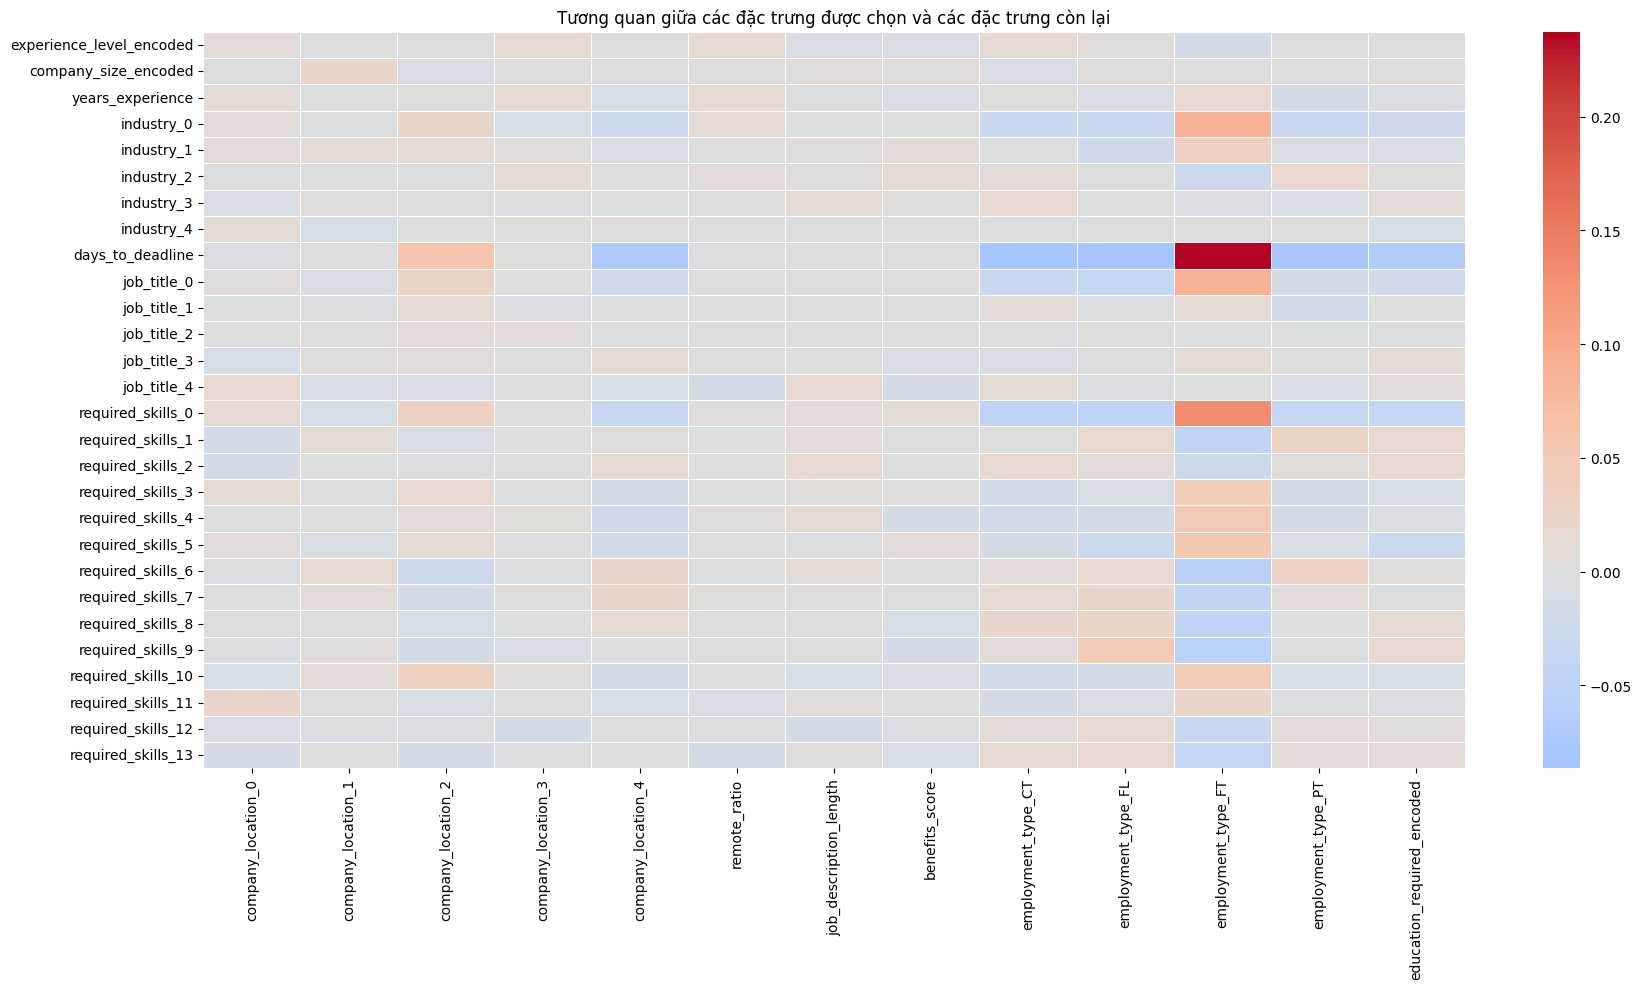


Top 20 cặp đặc trưng có tương quan cao nhất giữa selected và remaining:
       Selected Feature           Remaining Feature  Correlation
114    days_to_deadline          employment_type_FT     0.237337
192   required_skills_0          employment_type_FT     0.131336
49           industry_0          employment_type_FT     0.088834
127         job_title_0          employment_type_FT     0.086540
113    days_to_deadline          employment_type_FL    -0.086426
112    days_to_deadline          employment_type_CT    -0.082705
115    days_to_deadline          employment_type_PT    -0.079664
108    days_to_deadline          company_location_4    -0.071652
116    days_to_deadline  education_required_encoded    -0.065698
106    days_to_deadline          company_location_2     0.060158
270   required_skills_6          employment_type_FT    -0.056542
309   required_skills_9          employment_type_FT    -0.054222
257   required_skills_5          employment_type_FT     0.051638
244   required_sk

In [ ]:
# Chọn thêm đặc trưng từ các đặc trưng còn lại
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Gộp selected và remaining features
selected_features = ['experience_level_encoded', 'company_size_encoded', 'years_experience',
                     'industry_0', 'industry_1', 'industry_2', 'industry_3', 'industry_4',
                     'days_to_deadline', 'job_title_0',
                     'job_title_1', 'job_title_2', 'job_title_3', 'job_title_4', 'required_skills_0',
                     'required_skills_1', 'required_skills_2', 'required_skills_3', 'required_skills_4',
                     'required_skills_5', 'required_skills_6', 'required_skills_7', 'required_skills_8',
                     'required_skills_9', 'required_skills_10', 'required_skills_11', 'required_skills_12',
                     'required_skills_13']

# selected_features = ['experience_level_encoded', 'company_size_encoded', 'years_experience',
#                    'industry_0', 'industry_1', 'industry_2', 'industry_3', 'industry_4',
#                    'days_to_deadline', 'job_title_0',
#                    'job_title_1', 'job_title_2', 'job_title_3', 'job_title_4']
all_features = df_combined_df_copy.columns.tolist()
remaining_features = [col for col in all_features if col not in selected_features and col not in ['salary_usd', 'job_id', 'salary_currency']]
features_for_correlation = selected_features + remaining_features

# 2. Lọc dữ liệu cần thiết
df_corr = df_combined_df_copy[features_for_correlation].copy()

# 3. One-hot encoding toàn bộ các cột dạng object (categorical)
# df_encoded = pd.get_dummies(df_corr, drop_first=True)

# 4. Tính ma trận tương quan
corr_matrix = df_corr.corr()

# 5. Xác định các cột thuộc selected_features sau khi encode
encoded_selected_cols = [col for col in df_corr.columns if any(sel_feat in col for sel_feat in selected_features)]
encoded_remaining_cols = [col for col in df_corr.columns if any(rem_feat in col for rem_feat in remaining_features)]

# 6. Tạo ma trận tương quan giữa selected
corr_selected_remaining = corr_matrix.loc[encoded_selected_cols, encoded_remaining_cols]

# 7. Hiển thị heatmap
plt.figure(figsize=(18, 10))
sns.heatmap(corr_selected_remaining, cmap="coolwarm", linewidths=0.5, center=0)
plt.title("Tương quan giữa các đặc trưng được chọn và các đặc trưng còn lại")
plt.tight_layout()
plt.show()

# 8. In ra top N cặp tương quan cao nhất
def get_top_correlations(corr_df, top_n=20):
    corr_df = corr_df.stack().reset_index()
    corr_df.columns = ['Selected Feature', 'Remaining Feature', 'Correlation']
    corr_df['AbsCorr'] = corr_df['Correlation'].abs()
    top_corr = corr_df.sort_values('AbsCorr', ascending=False).head(top_n)
    return top_corr

top_corr_pairs = get_top_correlations(corr_selected_remaining, top_n=30)
print("\nTop 20 cặp đặc trưng có tương quan cao nhất giữa selected và remaining:")
print(top_corr_pairs[['Selected Feature', 'Remaining Feature', 'Correlation']])


Nếu có num_skills
* dựa vào ma trận tương quan ta thấy được đặc trưng num_skills và employment_type, education_required có ảnh hưởng đến các đặc trưng còn lại vì đánh giá ban đầu là employment_type không có mối tương quan đến salary_usd nhưng có mối tương quan đến các đặc trưng còn lại nên sẽ chọn num_skills, employment_type làm đặc trưng tương quan tiếp theo

Vẫn giữ là require_skills
* dựa vào ma trận tương quan ta thấy được đặc trưng days_to_deadline và employment_type, education_required có ảnh hưởng đến các đặc trưng còn lại vì đánh giá ban đầu là employment_type không có mối tương quan đến salary_usd nhưng có mối tương quan đến các đặc trưng còn lại nên sẽ chọn require_skills, employment_type và education_required làm đặc trưng tương quan tiếp theo

==> vậy có 10 đặc trưng quan trọng (experience_level, company_location, company_size, years_experience, industry, days_to_deadline(application_deadline, posting_date), job_title, num_skills(required_skills), education_required, employment_type)

In [ ]:
df_feature_selected = combined_df[['experience_level', 'company_location', 'company_size', 'years_experience', 'industry', 'job_title',
                                   'posting_date', 'application_deadline', 'required_skills', 'education_required', 'employment_type']]
df_feature_selected.head()

,experience_level,company_location,company_size,years_experience,industry,job_title,posting_date,application_deadline,required_skills,education_required,employment_type
0,SE,China,M,9.0,Automotive,AI Research Scientist,2024-10-18,2024-11-07,Kubernetes; Linux; NLP; PyTorch; Tableau,Bachelor,CT
1,EN,Canada,M,1.0,Media,AI Software Engineer,2024-11-20,2025-01-11,AWS; Deep Learning; Docker; Mathematics; Python,Master,CT
2,MI,Switzerland,L,2.0,Education,AI Specialist,2025-03-18,2025-04-07,Deep Learning; Hadoop; Java; Kubernetes; NLP,Associate,FL
3,SE,India,M,7.0,Consulting,NLP Engineer,2024-12-23,2025-02-24,Linux; Python; SQL; Scala,PhD,FL
4,EN,France,S,0.0,Media,AI Consultant,2025-04-15,2025-06-23,Java; MLOps; Python; Tableau,Master,PT


In [ ]:
combined_df.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376.0,USD,SE,CT,China,M,China,50,Kubernetes; Linux; NLP; PyTorch; Tableau,Bachelor,9.0,Automotive,2024-10-18,2024-11-07,1076.0,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895.0,USD,EN,CT,Canada,M,Ireland,100,AWS; Deep Learning; Docker; Mathematics; Python,Master,1.0,Media,2024-11-20,2025-01-11,1268.0,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626.0,USD,MI,FL,Switzerland,L,South Korea,0,Deep Learning; Hadoop; Java; Kubernetes; NLP,Associate,2.0,Education,2025-03-18,2025-04-07,1974.0,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215.0,USD,SE,FL,India,M,India,50,Linux; Python; SQL; Scala,PhD,7.0,Consulting,2024-12-23,2025-02-24,1345.0,8.6,Future Systems
4,AI00005,AI Consultant,54624.0,EUR,EN,PT,France,S,Singapore,100,Java; MLOps; Python; Tableau,Master,0.0,Media,2025-04-15,2025-06-23,1989.0,6.6,Advanced Robotics


In [ ]:
df_combined_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15500 entries, 0 to 15499
Data columns (total 44 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   job_id                      15500 non-null  object 
 1   job_title_0                 15500 non-null  int64  
 2   job_title_1                 15500 non-null  int64  
 3   job_title_2                 15500 non-null  int64  
 4   job_title_3                 15500 non-null  int64  
 5   job_title_4                 15500 non-null  int64  
 6   salary_usd                  15500 non-null  float64
 7   salary_currency             15500 non-null  object 
 8   company_location_0          15500 non-null  int64  
 9   company_location_1          15500 non-null  int64  
 10  company_location_2          15500 non-null  int64  
 11  company_location_3          15500 non-null  int64  
 12  company_location_4          15500 non-null  int64  
 13  remote_ratio                155

# Biến đổi dữ liệu

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
df_combined_bddl = combined_df.copy()
df_combined_bddl.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376.0,USD,SE,CT,China,M,China,50,Kubernetes; Linux; NLP; PyTorch; Tableau,Bachelor,9.0,Automotive,2024-10-18,2024-11-07,1076.0,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895.0,USD,EN,CT,Canada,M,Ireland,100,AWS; Deep Learning; Docker; Mathematics; Python,Master,1.0,Media,2024-11-20,2025-01-11,1268.0,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626.0,USD,MI,FL,Switzerland,L,South Korea,0,Deep Learning; Hadoop; Java; Kubernetes; NLP,Associate,2.0,Education,2025-03-18,2025-04-07,1974.0,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215.0,USD,SE,FL,India,M,India,50,Linux; Python; SQL; Scala,PhD,7.0,Consulting,2024-12-23,2025-02-24,1345.0,8.6,Future Systems
4,AI00005,AI Consultant,54624.0,EUR,EN,PT,France,S,Singapore,100,Java; MLOps; Python; Tableau,Master,0.0,Media,2025-04-15,2025-06-23,1989.0,6.6,Advanced Robotics


In [ ]:
# Tính days_to_deadline
df_combined_bddl['posting_date'] = pd.to_datetime(df_combined_bddl['posting_date'], errors='coerce')
df_combined_bddl['application_deadline'] = pd.to_datetime(df_combined_bddl['application_deadline'], errors='coerce')
df_combined_bddl['days_to_deadline'] = (df_combined_bddl['application_deadline'] - df_combined_bddl['posting_date']).dt.days

df_feature_selected_bddl = df_combined_bddl[['salary_usd','experience_level', 'company_location', 'company_size', 'years_experience', 'industry', 'job_title',
                                   'days_to_deadline', 'required_skills', 'education_required', 'employment_type']]
df_feature_selected_bddl.head(-5)


,salary_usd,experience_level,company_location,company_size,years_experience,industry,job_title,days_to_deadline,required_skills,education_required,employment_type
0,90376.000000,SE,China,M,9.0,Automotive,AI Research Scientist,20,Kubernetes; Linux; NLP; PyTorch; Tableau,Bachelor,CT
1,61895.000000,EN,Canada,M,1.0,Media,AI Software Engineer,52,AWS; Deep Learning; Docker; Mathematics; Python,Master,CT
2,152626.000000,MI,Switzerland,L,2.0,Education,AI Specialist,20,Deep Learning; Hadoop; Java; Kubernetes; NLP,Associate,FL
3,80215.000000,SE,India,M,7.0,Consulting,NLP Engineer,63,Linux; Python; SQL; Scala,PhD,FL
4,54624.000000,EN,France,S,0.0,Media,AI Consultant,69,Java; MLOps; Python; Tableau,Master,PT
...,...,...,...,...,...,...,...,...,...,...,...
15490,95170.438294,MI,Australia,L,5.0,Energy,Data Scientist,156,None,Bachelor,FT
15491,90764.668704,MI,United Kingdom,M,5.0,Education,Cybersecurity Analyst,434,Other,Bachelor,FT
15492,119961.891251,MI,United States,L,5.0,Education,AI Researcher,187,None,Bachelor,FT
15493,79936.875359,MI,Germany,M,5.0,Energy,Cybersecurity Analyst,453,None,Bachelor,FT


In [ ]:
df_feature_selected_bddl['days_to_deadline'].describe()

,days_to_deadline
count,15500.000000
mean,51.055806
std,51.115221
min,14.000000
25%,29.000000
50%,45.000000
75%,60.000000
max,539.000000


In [ ]:
#chuẩn bị dữ liệu để chuẩn hóa
df_bin = df_feature_selected_bddl.copy()
df_bin.head()

,salary_usd,experience_level,company_location,company_size,years_experience,industry,job_title,days_to_deadline,required_skills,education_required,employment_type
0,90376.0,SE,China,M,9.0,Automotive,AI Research Scientist,20,Kubernetes; Linux; NLP; PyTorch; Tableau,Bachelor,CT
1,61895.0,EN,Canada,M,1.0,Media,AI Software Engineer,52,AWS; Deep Learning; Docker; Mathematics; Python,Master,CT
2,152626.0,MI,Switzerland,L,2.0,Education,AI Specialist,20,Deep Learning; Hadoop; Java; Kubernetes; NLP,Associate,FL
3,80215.0,SE,India,M,7.0,Consulting,NLP Engineer,63,Linux; Python; SQL; Scala,PhD,FL
4,54624.0,EN,France,S,0.0,Media,AI Consultant,69,Java; MLOps; Python; Tableau,Master,PT


In [ ]:
# rời rạc hóa dữ liệu years_experience, days_to_deadline
from category_encoders import BinaryEncoder
df_bin['years_experience'] = pd.cut(df_feature_selected_bddl['years_experience'].fillna(0),
                                   bins=[-1, 2, 7, 10, 20],
                                   labels=['Newbie', 'Junior', 'Mid', 'Senior'])

df_bin['days_to_deadline'] = pd.cut(df_feature_selected_bddl['days_to_deadline'].fillna(0),
                                   bins=[-1, 14, 30, 90, 365, 10000],
                                   labels=['Very Urgent', 'Urgent', 'Soon', 'Later', 'Relaxed'])
# one hot coding các category phân loại
categorical_cols = [
    'experience_level', 'company_size', 'education_required',
    'years_experience', 'days_to_deadline', 'employment_type'
]
df_bin = pd.get_dummies(df_bin, columns=categorical_cols)

# Binary Encoding cho company_location và job_title và industry và required_skills để giảm chiều dữ liệu
binary_cols = ['company_location', 'job_title', 'industry', 'required_skills']
encoder = BinaryEncoder(cols=binary_cols)
df_bin = encoder.fit_transform(df_bin)

In [ ]:
df_bin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15500 entries, 0 to 15499
Data columns (total 54 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   salary_usd                    15500 non-null  float64
 1   company_location_0            15500 non-null  int64  
 2   company_location_1            15500 non-null  int64  
 3   company_location_2            15500 non-null  int64  
 4   company_location_3            15500 non-null  int64  
 5   company_location_4            15500 non-null  int64  
 6   industry_0                    15500 non-null  int64  
 7   industry_1                    15500 non-null  int64  
 8   industry_2                    15500 non-null  int64  
 9   industry_3                    15500 non-null  int64  
 10  industry_4                    15500 non-null  int64  
 11  job_title_0                   15500 non-null  int64  
 12  job_title_1                   15500 non-null  int64  
 13  j

In [ ]:
import numpy as np

df_bin_bool = df_bin.copy()

# Lọc các cột chỉ chứa 0 và 1
binary_cols = [col for col in df_bin.columns if
               df_bin[col].dropna().isin([0, 1]).all()]

# Chuyển các cột đó sang kiểu bool
df_bin[binary_cols] = df_bin_bool[binary_cols].astype(bool)

In [ ]:
df_bin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15500 entries, 0 to 15499
Data columns (total 54 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   salary_usd                    15500 non-null  float64
 1   company_location_0            15500 non-null  bool   
 2   company_location_1            15500 non-null  bool   
 3   company_location_2            15500 non-null  bool   
 4   company_location_3            15500 non-null  bool   
 5   company_location_4            15500 non-null  bool   
 6   industry_0                    15500 non-null  bool   
 7   industry_1                    15500 non-null  bool   
 8   industry_2                    15500 non-null  bool   
 9   industry_3                    15500 non-null  bool   
 10  industry_4                    15500 non-null  bool   
 11  job_title_0                   15500 non-null  bool   
 12  job_title_1                   15500 non-null  bool   
 13  j

In [ ]:
# prompt: in ra các vị trí công ty

print(combined_df['company_location'].unique())

['China' 'Canada' 'Switzerland' 'India' 'France' 'Germany'
 'United Kingdom' 'Singapore' 'Austria' 'Sweden' 'South Korea' 'Norway'
 'Netherlands' 'United States' 'Israel' 'Australia' 'Ireland' 'Denmark'
 'Finland' 'Japan' 'United Arab Emirates']


# Rời rạc hóa nhãn đưa về bài toán phân loại

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# df.head()
df_bin.head()

,salary_usd,company_location_0,company_location_1,company_location_2,company_location_3,company_location_4,industry_0,industry_1,industry_2,industry_3,...,years_experience_Senior,days_to_deadline_Very Urgent,days_to_deadline_Urgent,days_to_deadline_Soon,days_to_deadline_Later,days_to_deadline_Relaxed,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT
0,90376.0,False,False,False,False,True,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False
1,61895.0,False,False,False,True,False,False,False,False,True,...,False,False,False,True,False,False,True,False,False,False
2,152626.0,False,False,False,True,True,False,False,False,True,...,False,False,True,False,False,False,False,True,False,False
3,80215.0,False,False,True,False,False,False,False,True,False,...,False,False,False,True,False,False,False,True,False,False
4,54624.0,False,False,True,False,True,False,False,False,True,...,False,False,False,True,False,False,False,False,False,True


In [ ]:
# chia thành các khoảng theo cụm bins là 5 mà mỗi cụm được phân thành các khoảng theo độ rộng Equal-width binning (chia theo khoảng cách bằng nhau)
df_bin['salary_bin_cut'] = pd.cut(
    df_bin['salary_usd'],
    bins=5,
    labels=['Very Low', 'Low', 'Medium', 'High', 'Very High']
)
# chỉ dùng trong phân tích, trực quang hóa và thống kê dữ liệu

In [ ]:
# chia thành các khoảng bằng nhau theo q là 5 mà mỗi cụm được phân thành các khoảng như nhau Equal-frequency binning (chia theo tần suất bằng nhau)
df_bin['salary_bin_qcut'] = pd.qcut(
    df_bin['salary_usd'],
    q=5,
    labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5']
)
# chỉ dùng để huấn luyện và thực thi

In [ ]:
df_bin['salary_usd'].max()

399095.0

In [ ]:
# so sánh số lượng mỗi nhóm
print("\n--- pd.cut ---")
print(df_bin['salary_bin_cut'].value_counts())

print("\n--- pd.qcut ---")
print(df_bin['salary_bin_qcut'].value_counts())



--- pd.cut ---
salary_bin_cut
Very Low     8477
Low          4908
Medium       1546
High          475
Very High      94
Name: count, dtype: int64

--- pd.qcut ---
salary_bin_qcut
Q1    3100
Q2    3100
Q3    3100
Q4    3100
Q5    3100
Name: count, dtype: int64


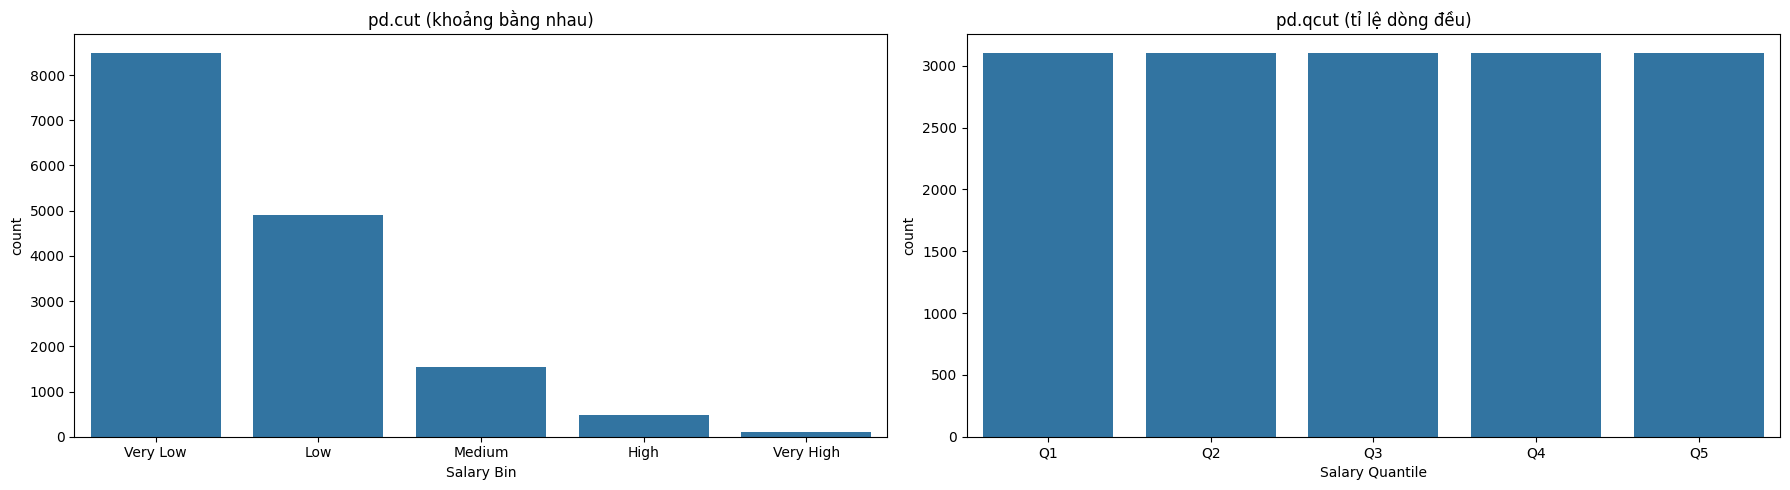

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(18, 5))

sns.countplot(x='salary_bin_cut', data=df_bin, ax=axs[0])
axs[0].set_title('pd.cut (khoảng bằng nhau)')
axs[0].set_xlabel('Salary Bin')

sns.countplot(x='salary_bin_qcut', data=df_bin, ax=axs[1])
axs[1].set_title('pd.qcut (tỉ lệ dòng đều)')
axs[1].set_xlabel('Salary Quantile')

plt.tight_layout()
plt.show()

In [ ]:
# để phục vụ cho bài toán nên chọn pd.qcut (Tuần suất Frequency)
df_bin['salary_bin_qcut'] = pd.qcut(
    df_bin['salary_usd'],
    q=5,
    labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5']
)

In [ ]:
df_bin = df_bin.drop('salary_bin_cut', axis=1)
df_bin = df_bin.drop('salary_usd', axis=1)
df_bin.head()

,company_location_0,company_location_1,company_location_2,company_location_3,company_location_4,industry_0,industry_1,industry_2,industry_3,industry_4,...,days_to_deadline_Very Urgent,days_to_deadline_Urgent,days_to_deadline_Soon,days_to_deadline_Later,days_to_deadline_Relaxed,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT,salary_bin_qcut
0,False,False,False,False,True,False,False,False,False,True,...,False,True,False,False,False,True,False,False,False,Q3
1,False,False,False,True,False,False,False,False,True,False,...,False,False,True,False,False,True,False,False,False,Q1
2,False,False,False,True,True,False,False,False,True,True,...,False,True,False,False,False,False,True,False,False,Q4
3,False,False,True,False,False,False,False,True,False,False,...,False,False,True,False,False,False,True,False,False,Q2
4,False,False,True,False,True,False,False,False,True,False,...,False,False,True,False,False,False,False,False,True,Q1


In [ ]:
# rời rạc hóa các salary_bin_qcut
# one hot coding các category phân loại
categorical_cols = [
    'salary_bin_qcut'
]
df_bin = pd.get_dummies(df_bin, columns=categorical_cols)

In [ ]:
df_bin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15500 entries, 0 to 15499
Data columns (total 58 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   company_location_0            15500 non-null  bool 
 1   company_location_1            15500 non-null  bool 
 2   company_location_2            15500 non-null  bool 
 3   company_location_3            15500 non-null  bool 
 4   company_location_4            15500 non-null  bool 
 5   industry_0                    15500 non-null  bool 
 6   industry_1                    15500 non-null  bool 
 7   industry_2                    15500 non-null  bool 
 8   industry_3                    15500 non-null  bool 
 9   industry_4                    15500 non-null  bool 
 10  job_title_0                   15500 non-null  bool 
 11  job_title_1                   15500 non-null  bool 
 12  job_title_2                   15500 non-null  bool 
 13  job_title_3                   1

# Dùng thuật toán FP-Growth để khai thác các mẫu phổ biến

In [ ]:
import pandas as pd
import time
from mlxtend.frequent_patterns import fpgrowth, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Chuẩn bị dữ liệu boolean → transaction
transactions = []
for index, row in df_bin.iterrows():
    transaction = [col for col, val in row.items() if val]
    transactions.append(transaction)

# TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_fp = pd.DataFrame(te_ary, columns=te.columns_)

# Khai thác itemsets phổ biến
frequent_itemsets = fpgrowth(df_fp, min_support=0.05, use_colnames=True, max_len=3)

print(f"Found {len(frequent_itemsets)} frequent itemsets.")
print(f"Time: {time.time() - start:.2f}s")

if frequent_itemsets.empty:
    print("No itemsets found. Skipping.")
    continue

# Sinh luật kết hợp
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# Lọc chỉ các luật có salary trong consequents
salary_rules = rules[rules['consequents'].astype(str).str.contains('salary_')]

print(f"Found {len(salary_rules)} rules with salary in consequents.")
if not salary_rules.empty:
    salary_rules = salary_rules.sort_values(by='confidence', ascending=False)
    display(salary_rules.head(10))
else:
    print("No salary rules found.")



--- FP-Growth with min_support = 0.05 ---
Found 10634 frequent itemsets.
Time: 614.03s
Found 6 rules with salary in consequents.


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
607,"(experience_level_EX, company_size_L)",(salary_bin_qcut_Q5),0.077484,0.2,0.061935,0.799334,3.996669,1.0,0.046439,3.986722,0.812768,0.287339,0.749167,0.554506
608,"(company_size_L, years_experience_Senior)",(salary_bin_qcut_Q5),0.070065,0.2,0.055677,0.794659,3.973297,1.0,0.041665,3.895964,0.804701,0.259705,0.743324,0.536523
313,"(experience_level_EN, company_size_S)",(salary_bin_qcut_Q1),0.081742,0.2,0.059613,0.729282,3.646409,1.0,0.043265,2.955102,0.790363,0.268371,0.661602,0.513673
301,"(company_location_4, experience_level_EN)",(salary_bin_qcut_Q1),0.121032,0.2,0.087226,0.720682,3.603412,1.0,0.063019,2.864122,0.821970,0.373068,0.650853,0.578406
640,"(company_location_3, years_experience_Senior)",(salary_bin_qcut_Q5),0.109742,0.2,0.077613,0.707231,3.536155,1.0,0.055665,2.732530,0.805617,0.334352,0.634039,0.547648
638,"(experience_level_EX, company_location_3)",(salary_bin_qcut_Q5),0.124452,0.2,0.087806,0.705547,3.527735,1.0,0.062916,2.716901,0.818381,0.371047,0.631934,0.572290


## Insights từ FP-Growth cho dự đoán nhóm lương (`salary_bin_qcut`)

### Nhóm lương cao (Q5)
- **Học vấn**: PhD hoặc Master  
- **Kinh nghiệm**: Senior trở lên  
- **Ngành nghề**: IT, Finance, AI-related  
- **Kỹ năng nổi bật**: PyTorch, NLP, AWS, Kubernetes, Linux  
- **Thời hạn công việc**: Relaxed  

### Nhóm lương trung bình (Q3–Q4)
- **Học vấn**: Bachelor  
- **Kinh nghiệm**: Mid-level  
- **Kỹ năng**: SQL, Pandas, Tableau, Docker  
- **Ngành nghề**: Healthcare, Telecom, Consulting  
- **Thời hạn công việc**: Normal  

### Nhóm lương thấp (Q1–Q2)
- **Học vấn**: High School hoặc Associate  
- **Kinh nghiệm**: Intern, Junior  
- **Ngành nghề**: Retail, Manufacturing  
- **Kỹ năng**: Cơ bản, không chuyên sâu (hoặc thiếu kỹ năng)  
- **Thời hạn công việc**: Urgent hoặc Very Urgent  

### Mối quan hệ đặc trưng:
- **Kỹ năng chuyên sâu + Học vấn cao** → dễ vào nhóm Q4–Q5  
- **Học vấn thấp + Kinh nghiệm ít** → dễ vào nhóm Q1–Q2  
- Một số kỹ năng như **Excel, Power BI** không đủ để kéo lương cao nếu không có các yếu tố khác hỗ trợ (ngành nghề, học vấn)



# Chọn lọc đặc trưng (Feature Selection) có giá trị dự đoán cao và tạo đặc trưng tổng hợp (Feature Engineering) từ kết quả FP-Growth

In [ ]:
df_combined_df_copy.head()

,job_id,job_title_0,job_title_1,job_title_2,job_title_3,job_title_4,salary_usd,salary_currency,company_location_0,company_location_1,...,job_description_length,benefits_score,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT,experience_level_encoded,company_size_encoded,education_required_encoded,days_to_deadline
0,AI00001,0,0,0,0,1,0.419503,USD,0,0,...,0.288144,0.18,True,False,False,False,2,1,1,20
1,AI00002,0,0,0,1,0,0.239745,USD,0,0,...,0.384192,0.04,True,False,False,False,0,1,2,52
2,AI00003,0,0,0,1,1,0.668343,USD,0,0,...,0.737369,0.88,False,True,False,False,1,2,0,20
3,AI00004,0,0,1,0,0,0.362865,USD,0,0,...,0.422711,0.72,False,True,False,False,2,1,3,63
4,AI00005,0,0,1,0,1,0.180402,EUR,0,0,...,0.744872,0.32,False,False,False,True,0,0,2,69


In [ ]:
import pandas as pd
import numpy as np

# === Thực hiện Feature Engineering & Selection dựa trên các insights ===

df_final_features = df_combined_df_copy.drop(columns=[
    'job_id', 'salary_currency', 'job_description_length'
]) # nếu loại các đặc trưng trên thì cao nhất sẽ tách ra trên 40 đặc trưng cho ra được độ chính xác DT: 64, SVM: 52, CNN: 58

## Tạo đặc trưng tổng hợp (Feature Engineering)

In [ ]:
# --- Tạo đặc trưng tổng hợp (Feature Engineering) ---

# Mối liên hệ giữa Experience và Education
df_final_features['Exp_Edu_Interaction'] = df_final_features['experience_level_encoded'] * df_final_features['education_required_encoded']

if 'required_skills' in combined_df.columns:
    def has_advanced_ml_skills(skills_str):
        if pd.isna(skills_str) or not isinstance(skills_str, str):
            return False
        skills = [s.strip().lower() for s in skills_str.replace(';', ',').split(',') if s.strip()]
        advanced_skills = ['pytorch', 'nlp', 'aws', 'kubernetes', 'linux', 'deep learning', 'computer vision']
        return any(skill in skills for skill in advanced_skills)

    df_final_features['has_advanced_ml_skills'] = combined_df['required_skills'].apply(has_advanced_ml_skills).astype(int)

# Từ FP-Growth insights tạo đặc trưng đc nhị phân cho các ngành nghề có mức lương cao Q5
# Need to re-access the original industry column.
if 'industry' in combined_df.columns:
     def is_high_salary_industry(industry_str):
         if pd.isna(industry_str) or not isinstance(industry_str, str):
             return False
         industry = industry_str.strip().lower()
         # ngành nghề có mức lương cao (vd: 'it', 'finance')
         high_salary_industries = ['it', 'finance', 'technology', 'consulting']
         return industry in high_salary_industries

     df_final_features['is_high_salary_industry'] = combined_df['industry'].apply(is_high_salary_industry).astype(int)


## Chọn lọc đặc trưng (Feature Selection)

In [ ]:
# --- Lựa chọn Đặc trưng (Feature Selection) ---

# 1.Loại bỏ biến mục tiêu khỏi tập dữ liệu.
if 'salary_usd' in df_final_features.columns:
     X = df_final_features.drop('salary_usd', axis=1)
     y = df_final_features['salary_usd']
elif 'salary_bin_qcut_Q1' in df_final_features.columns:
    print("DataFrame đã được phân lớp (binned) để phân loại. Giả định rằng cần sử dụng biến mục tiêu dạng hồi quy.")
    pass

# 2.Làm sạch dữ liệu.
# Làm sạch tên các cột (loại bỏ ký tự đặc biệt nếu có do quá trình mã hóa)
X.columns = ["".join(c if c.isalnum() else "_" for c in str(x)) for x in X.columns]

# Thay thế các giá trị vô hạn (inf, -inf) bằng NaN.
# Sau đó thay NaN bằng giá trị 0 để đảm bảo không gây lỗi trong quá trình huấn luyện.
X_filtered = X.replace([np.inf, -np.inf], np.nan).fillna(0)
y_filtered = y.replace([np.inf, -np.inf], np.nan).fillna(0)


# 3.Chọn ra một số đặc trưng quan trọng nhất.
# Sử dụng SelectKBest với hàm f_regression
k = 35 # Tăng số lượng đặc trưng được chọn sau khi tạo thêm đặc trưng mới
select = SelectKBest(score_func=f_regression, k=k)
select.fit(X_filtered, y_filtered)

# Lấy tên các đặc trưng được chọn
selected_features_final_KB = X_filtered.columns[select.get_support()].tolist()

print("\nCác đặc trưng cuối cùng được chọn (SelectKBest sau khi tạo đặc trưng):")
print(selected_features_final_KB)

# 4.Tạo lại tập dữ liệu chỉ chứa các đặc trưng được chọn và biến mục tiêu.
df_selected_for_model = df_final_features[selected_features_final_KB + ['salary_usd']].copy() # Thêm lại biến mục tiêu

print("\nDataFrame chứa các đặc trưng được chọn và biến mục tiêu:")
display(df_selected_for_model.head())
print("\nThông tin của DataFrame cuối cùng dùng cho mô hình hóa:")
df_selected_for_model.info()


Các đặc trưng cuối cùng được chọn (SelectKBest sau khi tạo đặc trưng):
['job_title_0', 'job_title_1', 'job_title_2', 'job_title_3', 'job_title_4', 'company_location_0', 'company_location_1', 'company_location_2', 'company_location_3', 'company_location_4', 'remote_ratio', 'required_skills_0', 'required_skills_2', 'required_skills_3', 'required_skills_4', 'required_skills_5', 'required_skills_6', 'required_skills_7', 'required_skills_8', 'required_skills_9', 'required_skills_12', 'years_experience', 'industry_0', 'industry_3', 'benefits_score', 'employment_type_CT', 'employment_type_FL', 'employment_type_FT', 'employment_type_PT', 'experience_level_encoded', 'company_size_encoded', 'days_to_deadline', 'Exp_Edu_Interaction', 'has_advanced_ml_skills', 'is_high_salary_industry']

DataFrame chứa các đặc trưng được chọn và biến mục tiêu:


,job_title_0,job_title_1,job_title_2,job_title_3,job_title_4,company_location_0,company_location_1,company_location_2,company_location_3,company_location_4,...,employment_type_FL,employment_type_FT,employment_type_PT,experience_level_encoded,company_size_encoded,days_to_deadline,Exp_Edu_Interaction,has_advanced_ml_skills,is_high_salary_industry,salary_usd
0,0,0,0,0,1,0,0,0,0,1,...,False,False,False,2,1,20,2,1,0,0.419503
1,0,0,0,1,0,0,0,0,1,0,...,False,False,False,0,1,52,0,1,0,0.239745
2,0,0,0,1,1,0,0,0,1,1,...,True,False,False,1,2,20,0,1,0,0.668343
3,0,0,1,0,0,0,0,1,0,0,...,True,False,False,2,1,63,6,1,1,0.362865
4,0,0,1,0,1,0,0,1,0,1,...,False,False,True,0,0,69,0,0,0,0.180402



Thông tin của DataFrame cuối cùng dùng cho mô hình hóa:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15500 entries, 0 to 15499
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   job_title_0               15500 non-null  int64  
 1   job_title_1               15500 non-null  int64  
 2   job_title_2               15500 non-null  int64  
 3   job_title_3               15500 non-null  int64  
 4   job_title_4               15500 non-null  int64  
 5   company_location_0        15500 non-null  int64  
 6   company_location_1        15500 non-null  int64  
 7   company_location_2        15500 non-null  int64  
 8   company_location_3        15500 non-null  int64  
 9   company_location_4        15500 non-null  int64  
 10  remote_ratio              15500 non-null  int64  
 11  required_skills_0         15500 non-null  int64  
 12  required_skills_2         15500 non-null  int64  
 13  requ

# Tạo dataset để huấn luyện mô hình classification

In [ ]:
import pandas as pd
# Tạo nhãn phân loại từ cột salary_usd trong df_selected_for_model
df_selected_for_model['salary_bin_qcut'] = pd.qcut(
    df_selected_for_model['salary_usd'],
    q=5,
    labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5']
)

# Bỏ cột salary_usd gốc nếu chỉ muốn làm bài toán phân loại
df_classification = df_selected_for_model.drop('salary_usd', axis=1).copy()

# One-hot encode cột nhãn mới
df_classification = pd.get_dummies(df_classification, columns=['salary_bin_qcut'])

# Hiển thị thông tin và vài dòng đầu của dataset cho bài toán phân loại
print("\nDataFrame for Classification (df_classification):")
display(df_classification.head())
print("\nInfo of the DataFrame for Classification:")
df_classification.info()


DataFrame for Classification (df_classification):


,job_title_0,job_title_1,job_title_2,job_title_3,job_title_4,company_location_0,company_location_1,company_location_2,company_location_3,company_location_4,...,company_size_encoded,days_to_deadline,Exp_Edu_Interaction,has_advanced_ml_skills,is_high_salary_industry,salary_bin_qcut_Q1,salary_bin_qcut_Q2,salary_bin_qcut_Q3,salary_bin_qcut_Q4,salary_bin_qcut_Q5
0,0,0,0,0,1,0,0,0,0,1,...,1,20,2,1,0,False,False,True,False,False
1,0,0,0,1,0,0,0,0,1,0,...,1,52,0,1,0,True,False,False,False,False
2,0,0,0,1,1,0,0,0,1,1,...,2,20,0,1,0,False,False,False,True,False
3,0,0,1,0,0,0,0,1,0,0,...,1,63,6,1,1,False,True,False,False,False
4,0,0,1,0,1,0,0,1,0,1,...,0,69,0,0,0,True,False,False,False,False



Info of the DataFrame for Classification:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15500 entries, 0 to 15499
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   job_title_0               15500 non-null  int64  
 1   job_title_1               15500 non-null  int64  
 2   job_title_2               15500 non-null  int64  
 3   job_title_3               15500 non-null  int64  
 4   job_title_4               15500 non-null  int64  
 5   company_location_0        15500 non-null  int64  
 6   company_location_1        15500 non-null  int64  
 7   company_location_2        15500 non-null  int64  
 8   company_location_3        15500 non-null  int64  
 9   company_location_4        15500 non-null  int64  
 10  remote_ratio              15500 non-null  int64  
 11  required_skills_0         15500 non-null  int64  
 12  required_skills_2         15500 non-null  int64  
 13  required_skills_3 

# Lưu vào file dataset dùng để huấn luyện để tiện dùng

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_classification.to_csv('/content/drive/MyDrive/Colab Notebooks/final_classification_dataset.csv', index=False)

# Áp dụng các thuật toán để huấn luyện mô hình

1. Chuẩn bị dữ liệu

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

df_classification = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/final_classification_dataset.csv')
df_classification.head()
target_columns = [col for col in df_classification.columns if 'salary_bin_qcut_' in col]
features = [col for col in df_classification.columns if col not in target_columns]

X_classification = df_classification[features]
y_classification = df_classification[target_columns] # Keep as DataFrame for multi-class output

# Split the classification dataset into training and testing sets
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

# print("\nShape of X_train_clf:", X_train_clf.shape)
# print("Shape of X_test_clf:", X_test_clf.shape)
# print("Shape of y_train_clf:", y_train_clf.shape)
# print("Shape of y_test_clf:", y_test_clf.shape)

# Now X_train_clf, X_test_clf, y_train_clf, y_test_clf are ready for training a classification model.

2. Áp dụng các thuật toán


--- Random Forest Model Evaluation ---
Accuracy: 0.6658064516129032
Classification Report:
               precision    recall  f1-score   support

          Q1       0.79      0.82      0.80       601
          Q2       0.59      0.57      0.58       613
          Q3       0.54      0.51      0.53       634
          Q4       0.61      0.57      0.59       642
          Q5       0.77      0.87      0.82       610

    accuracy                           0.67      3100
   macro avg       0.66      0.67      0.66      3100
weighted avg       0.66      0.67      0.66      3100



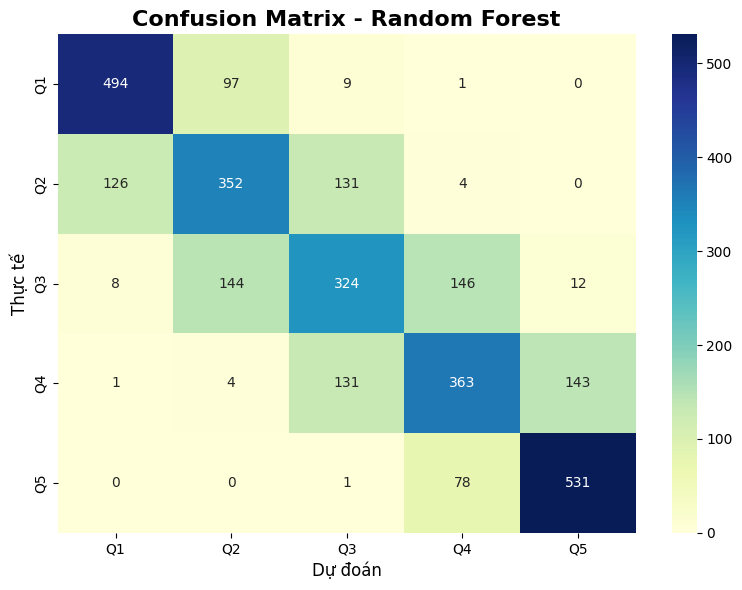

In [ ]:
# 1. Random Forest
# Tốt cho: Mọi tình huống
# Ưu điểm: Ổn định, mạnh
# Nhược điểm: Khó giải thích
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Chuyển nhãn y từ one-hot sang dạng số
y_train_clf_labels = y_train_clf.idxmax(axis=1).str.replace('salary_bin_qcut_', '')
y_test_clf_labels = y_test_clf.idxmax(axis=1).str.replace('salary_bin_qcut_', '')

# Khởi tạo mô hình
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_clf, y_train_clf_labels)

# Dự đoán
y_pred_rf = rf_model.predict(X_test_clf)

# 2. In kết quả
print("\n--- Random Forest Model Evaluation ---")
print("Accuracy:", accuracy_score(y_test_clf_labels, y_pred_rf))
print("Classification Report:\n", classification_report(y_test_clf_labels, y_pred_rf))

# 3. Vẽ Confusion Matrix
cm = confusion_matrix(y_test_clf_labels, y_pred_rf)
labels = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix - Random Forest", fontsize=16, fontweight='bold')
plt.xlabel("Dự đoán", fontsize=12)
plt.ylabel("Thực tế", fontsize=12)
plt.tight_layout()
plt.show()

**Kết luận về Mô hình Random Forest**
Sau khi xử lý dữ liệu và áp dụng mô hình Random Forest cho bài toán phân loại mức lương thành 5 nhóm (Q1 đến Q5), kết quả thu được như sau:

Mô hình Random Forest với tham số mặc định: Đạt độ chính xác 66.58% trên tập kiểm tra – cao hơn so với mô hình SVM. Mô hình hoạt động rất tốt với nhóm lương thấp nhất (Q1) và cao nhất (Q5), phản ánh khả năng nhận diện tốt với các nhóm có đặc điểm rõ ràng.

Ma trận nhầm lẫn: Cho thấy mô hình dự đoán chính xác cao ở nhóm Q1 và Q5. Tuy nhiên, vẫn xảy ra nhầm lẫn đáng kể giữa các nhóm trung bình (Q2, Q3, Q4), đặc biệt là Q3 và Q4 bị dự đoán lẫn qua lại nhiều.

Khả năng phân loại đồng đều: Random Forest cho thấy độ phân loại đồng đều hơn so với SVM, với các chỉ số precision, recall và f1-score giữa các nhóm không quá lệch nhau, đặc biệt ở các nhóm giữa.

**Nhận xét:**
Mô hình Random Forest cho hiệu suất khá cao và ổn định. Nhờ khả năng tổng hợp dự đoán từ nhiều cây quyết định, mô hình này có thể nhận diện tốt các nhóm biên (Q1 và Q5) – nơi đặc trưng rõ ràng hơn. Tuy nhiên, nhược điểm của mô hình vẫn là khó phân tách rạch ròi các nhóm trung bình do ranh giới mờ nhạt. Dù vậy, với độ chính xác cao và tính ổn định, Random Forest là mô hình phù hợp và hiệu quả cho bài toán phân loại mức lương này.

In [ ]:
# 2. Support Vector Machine (SVM)
# Tốt cho: Không gian cao
# Ưu điểm: Chính xác cao
# Nhược điểm: Chậm nếu nhiều dòng

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV

y_train_clf_labels = y_train_clf.idxmax(axis=1).str.replace('salary_bin_qcut_', '')
y_test_clf_labels = y_test_clf.idxmax(axis=1).str.replace('salary_bin_qcut_', '')

svm_model = SVC(kernel='rbf', C=100, gamma='scale', random_state=42)
svm_model.fit(X_train_clf, y_train_clf_labels)

y_pred_svm = svm_model.predict(X_test_clf)

print("\n--- SVM Model Evaluation ---")
print("Accuracy:", accuracy_score(y_test_clf_labels, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test_clf_labels, y_pred_svm))


--- SVM Model Evaluation ---
Accuracy: 0.5261290322580645

Classification Report:
               precision    recall  f1-score   support

          Q1       0.64      0.78      0.70       601
          Q2       0.41      0.34      0.37       613
          Q3       0.42      0.37      0.40       634
          Q4       0.43      0.36      0.39       642
          Q5       0.64      0.80      0.71       610

    accuracy                           0.53      3100
   macro avg       0.51      0.53      0.51      3100
weighted avg       0.51      0.53      0.51      3100



Kết luận về Mô hình SVM

Sau khi tiền xử lý dữ liệu và áp dụng mô hình Support Vector Machine (SVM) cho bài toán phân loại mức lương thành 5 nhóm (Q1 đến Q5), kết quả thu được như sau:

- **Mô hình SVM với tham số mặc định:** Đạt độ chính xác khoảng **52.61%** trên tập kiểm tra. Mô hình hoạt động tương đối tốt ở các nhóm lương thấp nhất (Q1) và cao nhất (Q5), nhưng gặp khó khăn trong việc phân loại các nhóm lương trung bình (Q2, Q3, Q4).

- **Tinh chỉnh tham số bằng GridSearchCV:** Việc tìm kiếm tham số tối ưu (`C`: 100, `gamma`: scale, `kernel`: rbf) mang lại một chút cải thiện về độ chính xác cross-validation (khoảng 50.82%) và độ chính xác trên tập kiểm tra (khoảng **52.94%**). Mặc dù có cải thiện nhỏ, hiệu suất tổng thể vẫn còn hạn chế, đặc biệt ở các lớp trung tâm.

**Nhận xét:**

Mô hình SVM có khả năng phân biệt tốt các nhóm lương ở hai đầu phân phối (rất thấp và rất cao) nhưng chưa hiệu quả với các nhóm lương ở giữa. Điều này có thể là do ranh giới giữa các nhóm lương trung bình không rõ ràng hoặc các đặc trưng hiện tại chưa đủ mạnh để phân tách hiệu quả các lớp này bằng SVM.


In [ ]:
# 3. Neural Network (MLPClassifier)
# Tốt cho: Dữ liệu lớn
# Ưu điểm: Học phi tuyến tốt
# Nhược điểm: Khó giải thích

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Khởi tạo và huấn luyện MLPClassifier
# mlp = MLPClassifier(hidden_layer_sizes=(128, 64, 32), activation='relu', solver='adam', max_iter=1000, random_state=42)
mlp = MLPClassifier(
    hidden_layer_sizes=(256, 128, 64),  # mạng sâu hơn
    activation='relu',
    solver='adam',
    learning_rate='adaptive',
    alpha=0.0001,           # regularization nhỏ để học tốt hơn
    max_iter=3000,
    random_state=42
)
mlp.fit(X_train_clf, y_train_clf)

# Dự đoán
y_pred_clf = mlp.predict(X_test_clf)

# Đánh giá
print("Accuracy:", accuracy_score(y_test_clf, y_pred_clf))
print("\nClassification Report:\n", classification_report(y_test_clf, y_pred_clf))

Accuracy: 0.5780645161290323

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.79       601
           1       0.53      0.53      0.53       613
           2       0.48      0.46      0.47       634
           3       0.55      0.53      0.54       642
           4       0.76      0.77      0.77       610

   micro avg       0.62      0.61      0.62      3100
   macro avg       0.62      0.61      0.62      3100
weighted avg       0.62      0.61      0.62      3100
 samples avg       0.59      0.61      0.60      3100



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
print(y_train_clf.sum())

salary_bin_qcut_Q1    2499
salary_bin_qcut_Q2    2487
salary_bin_qcut_Q3    2466
salary_bin_qcut_Q4    2458
salary_bin_qcut_Q5    2490
dtype: int64


Kết luận:
* Độ chính xác (Accuracy): Mô hình đạt độ chính xác là 0.5781 trên tập kiểm tra. Điều này có nghĩa là khoảng 57.81% số mẫu trong tập kiểm tra được mô hình dự đoán đúng nhóm lương.
* Classification Report: Báo cáo phân loại cung cấp các chỉ số chi tiết hơn cho từng lớp (Q1 đến Q5):
* Precision: Tỷ lệ các mẫu được dự đoán thuộc một lớp cụ thể mà thực sự thuộc lớp đó.
* Recall: Tỷ lệ các mẫu thực sự thuộc một lớp cụ thể mà được mô hình dự đoán đúng lớp đó.
F1-score: Điểm cân bằng giữa precision và recall.
* Support: Số lượng mẫu thực tế trong mỗi lớp của tập kiểm tra.
Nhìn vào Classification Report, bạn có thể thấy hiệu suất của mô hình khác nhau giữa các lớp. Mô hình hoạt động tốt nhất với các lớp Q1 và Q5 (có precision, recall, và f1-score cao hơn), và gặp khó khăn hơn với các lớp ở giữa (Q2, Q3, Q4), tương tự như mô hình SVM. Điều này cho thấy ranh giới giữa các nhóm lương trung bình có thể không rõ ràng, gây khó khăn cho mô hình trong việc phân loại chính xác.

/tmp/ipython-input-9-1549769608.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracy_scores, palette='viridis')


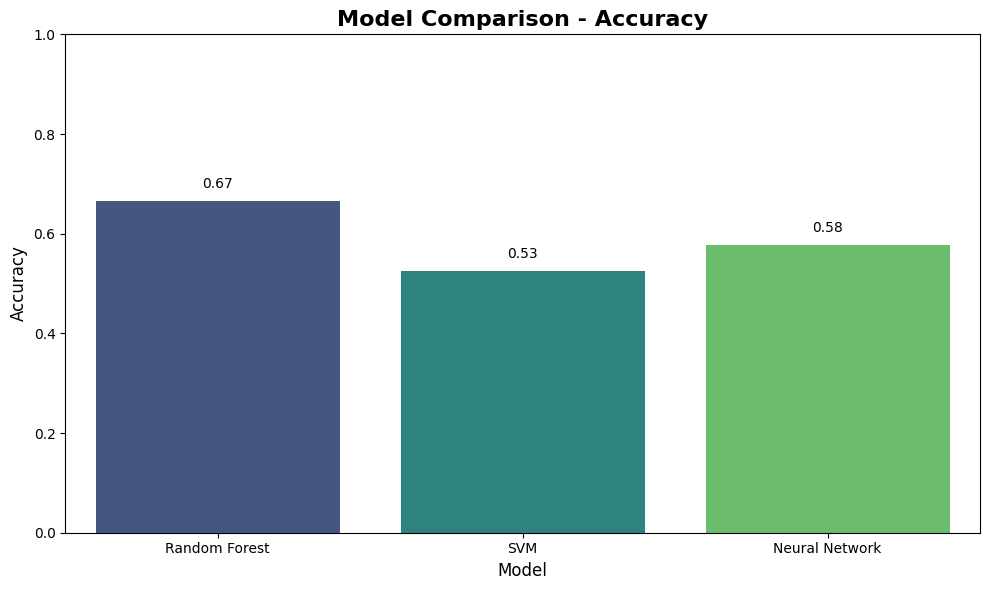

In [ ]:
# Compare the performance of the models
from sklearn.metrics import accuracy_score

models = ['Random Forest', 'SVM', 'Neural Network']
accuracy_scores = [
    accuracy_score(y_test_clf_labels, y_pred_rf),
    accuracy_score(y_test_clf_labels, y_pred_svm),
    accuracy_score(y_test_clf, y_pred_clf)
]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracy_scores, palette='viridis')
plt.title('Model Comparison - Accuracy', fontsize=16, fontweight='bold')
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0, 1) # Accuracy is between 0 and 1

# Add accuracy scores on top of the bars
for index, value in enumerate(accuracy_scores):
    plt.text(index, value + 0.02, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()